# Analysis 4.0

# Plotting and Packages 

In [1]:
#import settings and functions from color coding and plotting notebook 

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/signebendsen/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/signebendsen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



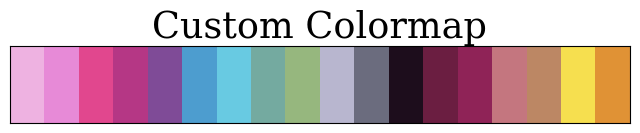

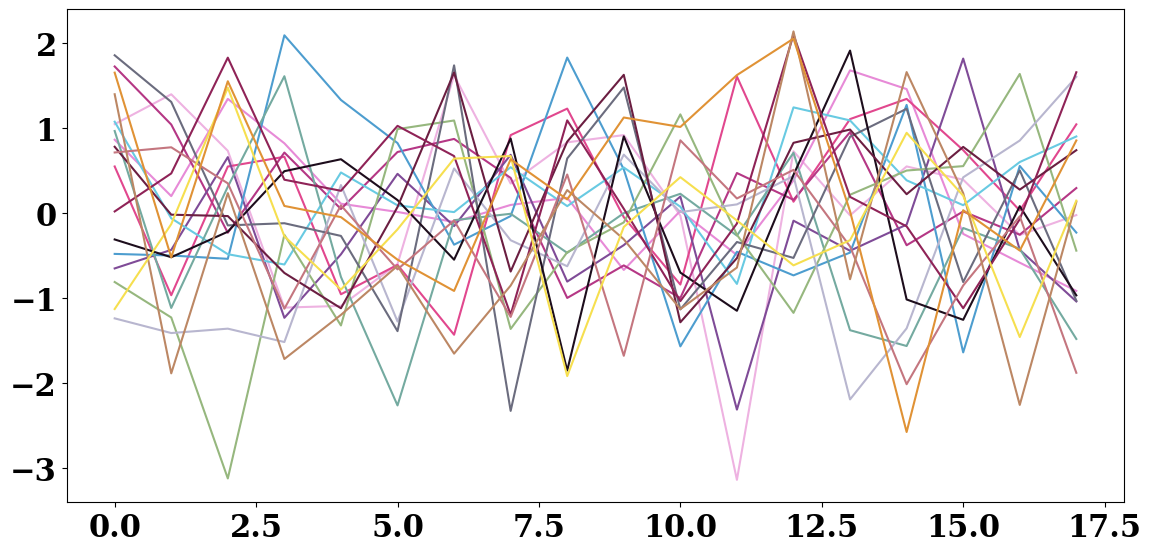

In [1211]:
%run "Color Coding and Plotting.ipynb"

# Import data

In [3]:
%%time
with open('OpenAlex Data/Unify2024/05032024OriginalData.pkl', 'rb') as f:
    article_author_data_original = pickle.load(f)

CPU times: user 2.9 s, sys: 3.71 s, total: 6.61 s
Wall time: 29.1 s


In [13]:
%%time
with open('OpenAlex Data/Unify2024/11042024FinalData.pkl', 'rb') as f:
    article_author_data_final = pickle.load(f)

CPU times: user 2.31 s, sys: 3.12 s, total: 5.43 s
Wall time: 21.7 s


# Analysis

## Description

In [37]:
#total length
print("N original data:", len(article_author_data_original))
print("N clean data:", len(article_author_data_final))


N original data: 2000281
N clean data: 1471903


In [38]:
#distinct articles length
print("N unique articles original data:", len(article_author_data_original.drop_duplicates(subset=['article_id'], keep='first')))
print("N unique articles clean data:", len(article_author_data_final.drop_duplicates(subset=['article_id'], keep='first')))


N unique articles original data: 518351
N unique articles clean data: 470029


In [39]:
#distinct authors length
print("N unique authors original data:", len(article_author_data_original.drop_duplicates(subset=['author_id'], keep='first')))
print("N unique authors clean data:", len(article_author_data_final.drop_duplicates(subset=['author_id'], keep='first')))


N unique authors original data: 810843
N unique authors clean data: 676613


In [ ]:
# Replace empty lists with NaN
article_author_data_final['grants'] = article_author_data_final['grants'].apply(lambda x: np.nan if len(x) == 0 else x)
article_author_data_final['grants'][article_author_data_final['grants'].notna()==True]=1 #1 means they have a grant 
article_author_data_final['grants'] = article_author_data_final['grants'].fillna(0) #zero means they don't have a grant 

In [48]:
article_author_data_final.author_publication_rate.replace(np.inf, 0, inplace=True)


In [49]:
article_author_data_final.author_publication_rate.mean()

0.8427409979895784

In [50]:
article_author_data_final.author_publication_rate.std()

1.3454711952192782

In [32]:
topics_data_final.domain.value_counts(normalize=False)

domain
research     1186707
education     256319
Name: count, dtype: int64

In [33]:
topics_data_final.domain.value_counts(normalize=True)*100

domain
research     82.237396
education    17.762604
Name: proportion, dtype: float64

# Gender Assignment Update 

## Initial

In [41]:
article_author_data_original.predicted_gender.isna().sum()

0

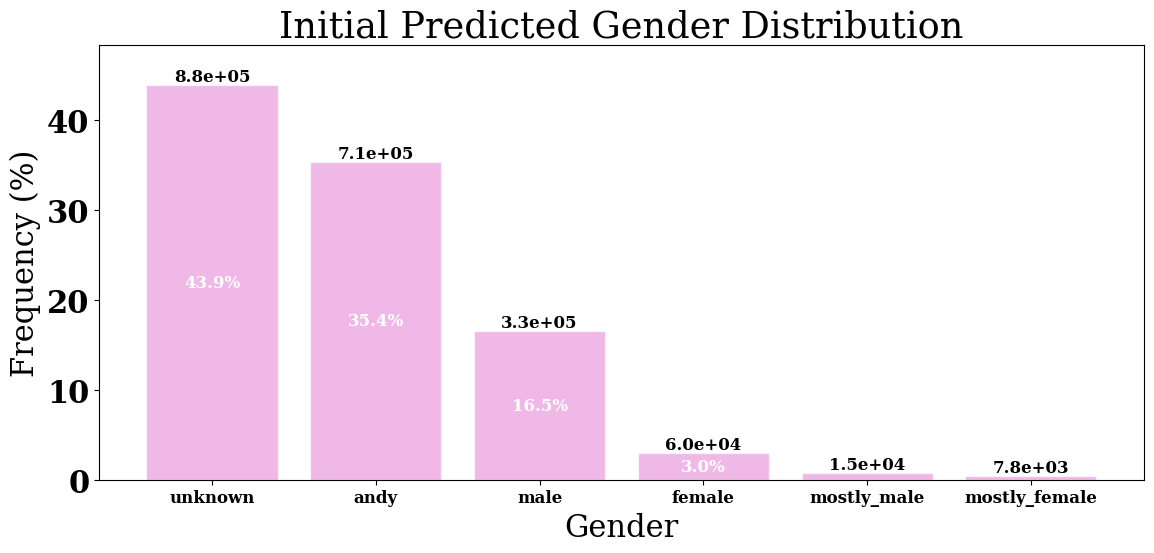

In [42]:
cat_plot(article_author_data_original.predicted_gender, title='Initial Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='originalpredictedgender')


In [43]:
original_data_distinct_author=article_author_data_original.drop_duplicates(subset=['author_id'], keep='first')


In [44]:
andy_country=original_data_distinct_author.author_country_name[original_data_distinct_author.predicted_gender=='andy']
andy_country=andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia'})
andy_name=original_data_distinct_author.extracted_first_name[original_data_distinct_author.predicted_gender=='andy']


In [13]:
unknown_country=original_data_distinct_author.author_country_name[original_data_distinct_author.predicted_gender=='unknown']
unknown_country=unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India'})
unknown_name=original_data_distinct_author.extracted_first_name[original_data_distinct_author.predicted_gender=='unknown']

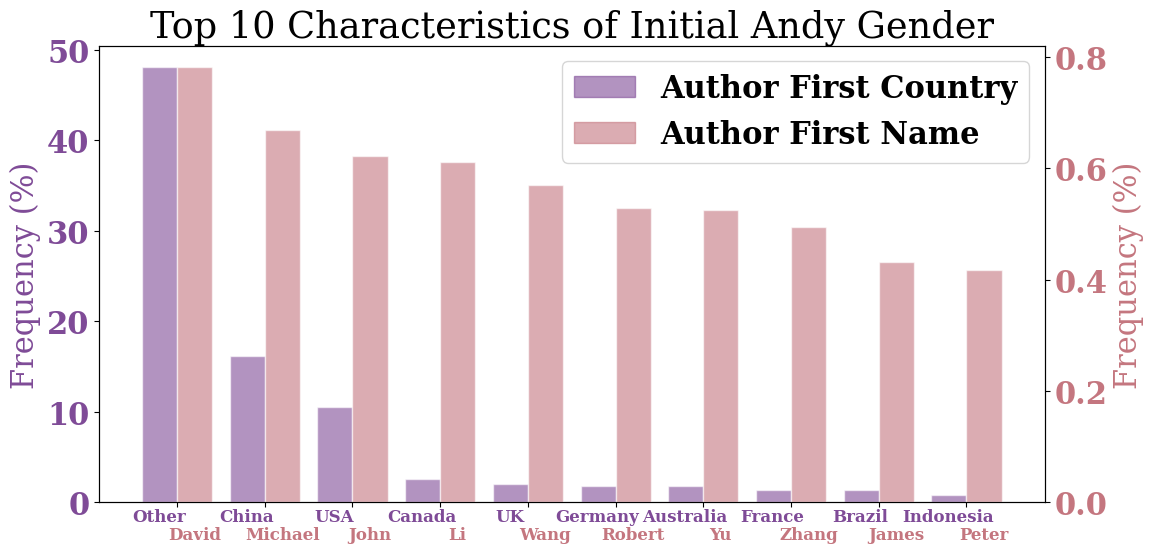

In [57]:
cat_top_plot_dual_axis(andy_country, andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Initial Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_initial')


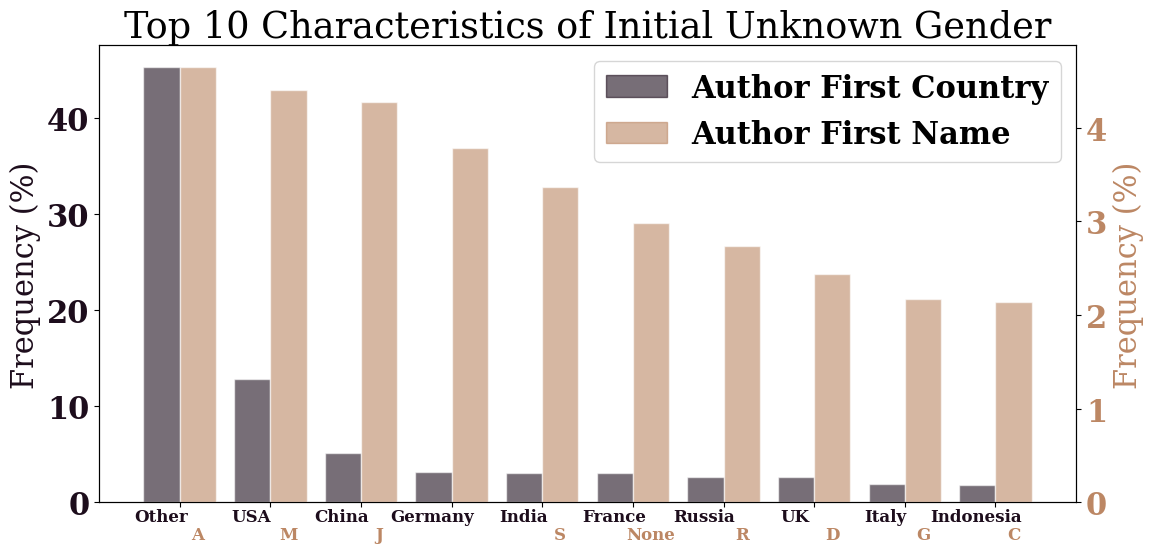

In [56]:
cat_top_plot_dual_axis(unknown_country, unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Initial Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_initial')


## First Update: Look for Duplicates in Author ID with an Assigned Gender

In [32]:
with open('OpenAlex Data/Unify2024/02032024FirstUpdatedArticleAuthorData19702023.pkl', 'rb') as f:
    article_author_data_first_update = pickle.load(f)

In [33]:
article_author_data_first_update.predicted_gender.isna().sum()

0

In [34]:
len(article_author_data_first_update)

2000281

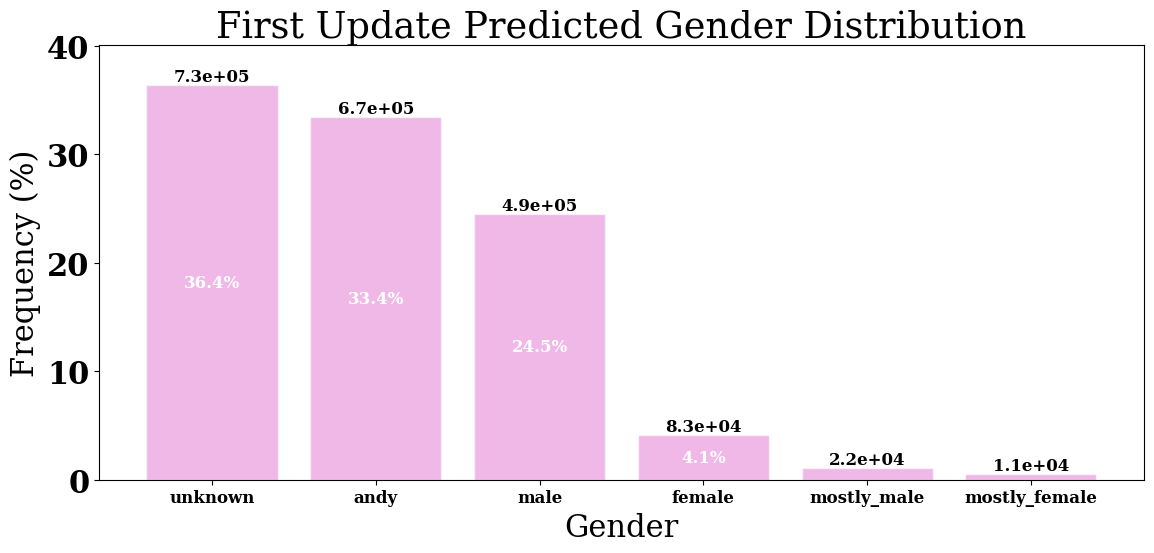

In [58]:
cat_plot(article_author_data_first_update.predicted_gender, title='First Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='firstupdatepredictedgender')


In [37]:
article_author_data_first_update.predicted_gender.value_counts()-article_author_data_original.predicted_gender.value_counts()

predicted_gender
unknown         -151168
andy             -39498
male             158860
female            22270
mostly_male        6480
mostly_female      3056
Name: count, dtype: int64

In [172]:
first_andy_country=article_author_data_first_update.author_country_name[article_author_data_first_update.predicted_gender=='andy']
first_andy_country=first_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia'})
first_andy_name=article_author_data_first_update.extracted_first_name[article_author_data_first_update.predicted_gender=='andy']


In [173]:
first_unknown_country=article_author_data_first_update.author_country_name[article_author_data_first_update.predicted_gender=='unknown']
first_unknown_country=first_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India'})
first_unknown_name=article_author_data_first_update.extracted_first_name[article_author_data_first_update.predicted_gender=='unknown']

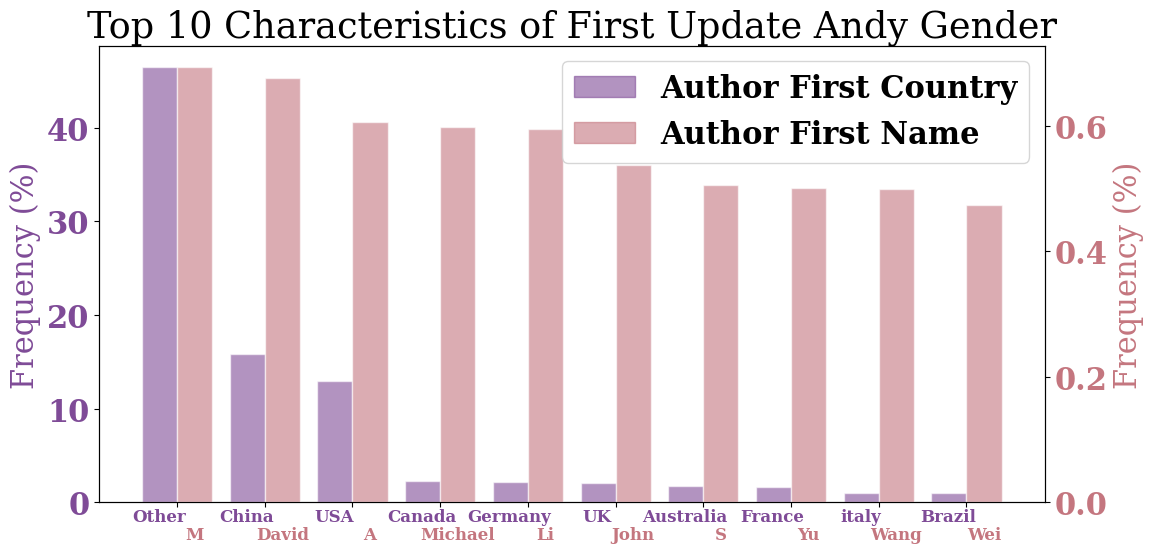

In [174]:
cat_top_plot_dual_axis(first_andy_country, first_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of First Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_first')


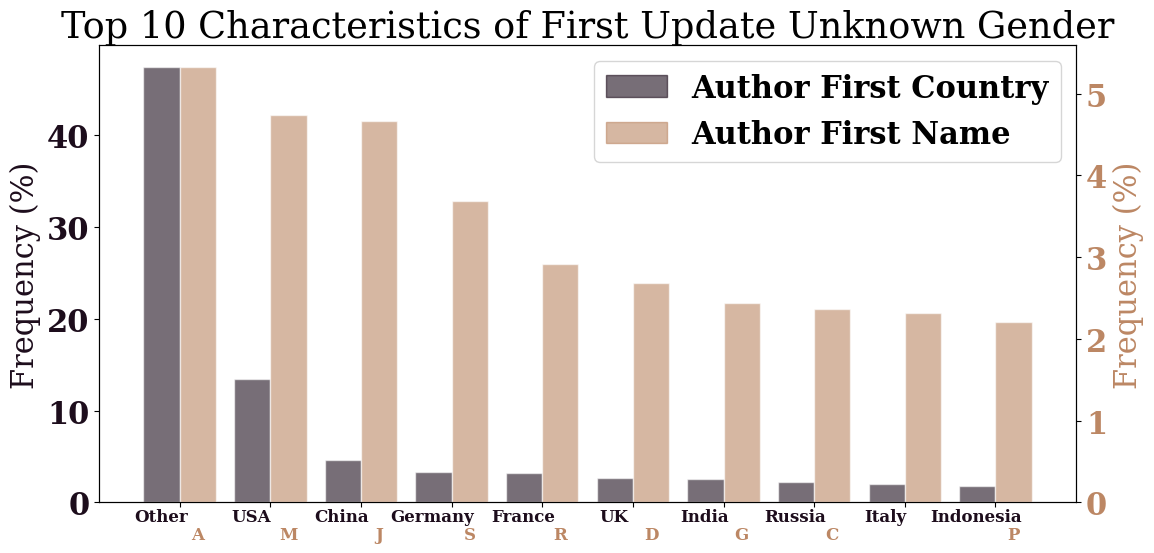

In [175]:
cat_top_plot_dual_axis(first_unknown_country, first_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of First Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_first')


## Second Update: Update Without Country 

In [68]:
#get the version that we already got 
with open('OpenAlex Data/Unify2024/02032024SecondUpdatedArticleAuthorData19702023.pkl', 'rb') as f:
    article_author_data_second_update = pickle.load(f)


In [69]:
article_author_data_second_update.predicted_gender.isna().sum()

0

In [70]:
len(article_author_data_second_update)

2000281

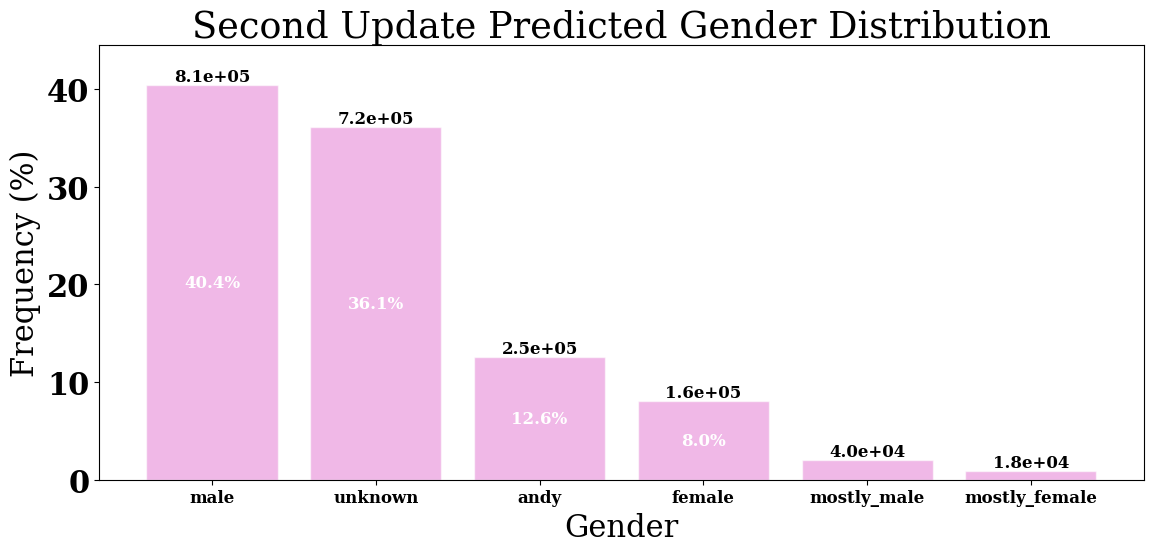

In [71]:
cat_plot(article_author_data_second_update.predicted_gender, title='Second Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='secondupdatepredictedgender')


In [72]:
article_author_data_second_update.predicted_gender.value_counts()-article_author_data_first_update.predicted_gender.value_counts()

predicted_gender
andy            -416085
female            77980
male             318475
mostly_female      7022
mostly_male       18083
unknown           -5475
Name: count, dtype: int64

In [176]:
second_andy_country=article_author_data_second_update.author_country_name[article_author_data_second_update.predicted_gender=='andy']
second_andy_country=second_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
second_andy_name=article_author_data_second_update.extracted_first_name[article_author_data_second_update.predicted_gender=='andy']


In [177]:
second_unknown_country=article_author_data_second_update.author_country_name[article_author_data_second_update.predicted_gender=='unknown']
second_unknown_country=second_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
second_unknown_name=article_author_data_second_update.extracted_first_name[article_author_data_second_update.predicted_gender=='unknown']

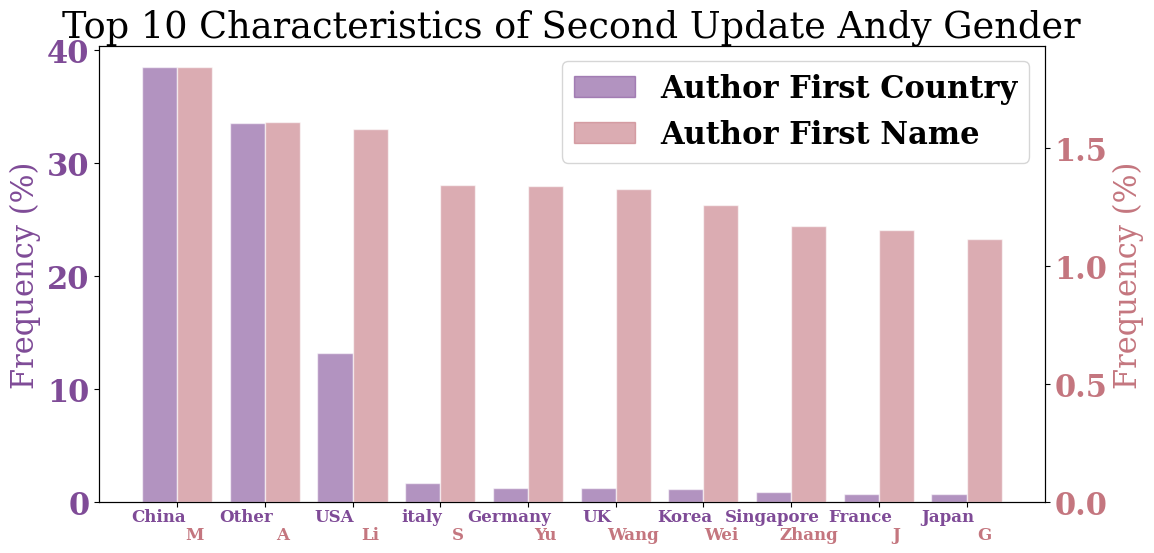

In [178]:
cat_top_plot_dual_axis(second_andy_country, second_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Second Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_second')


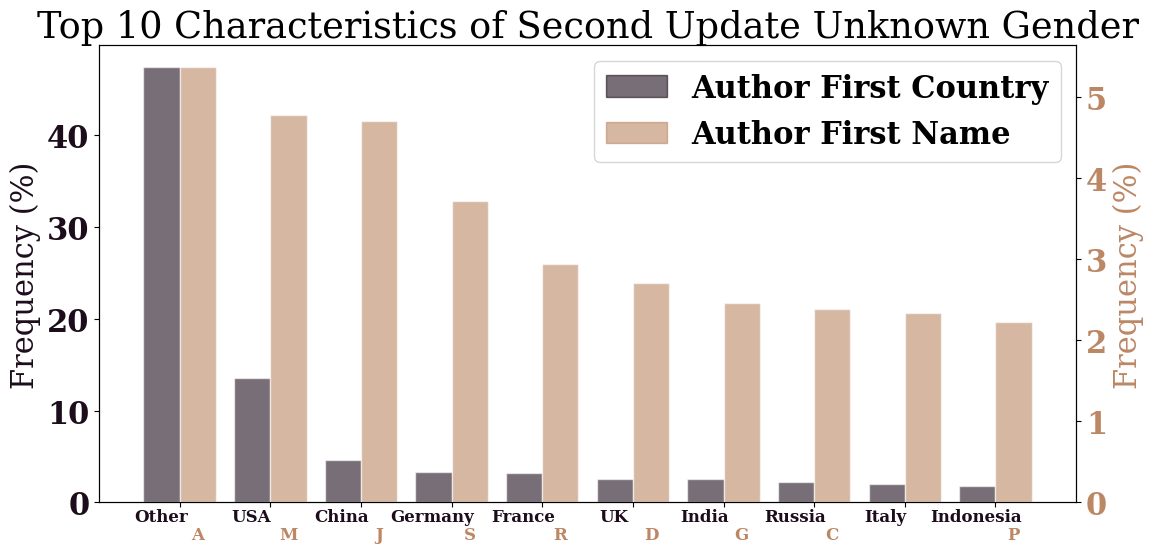

In [179]:
cat_top_plot_dual_axis(second_unknown_country, second_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Second Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_second')


## Third Update: Drop Rows With Invalid Names 

In [157]:
article_author_data_third_update=article_author_data_second_update.copy()

In [166]:
# Apply the condition and create new dataframes without the rows where the name is just one letter
article_author_data_third_update = article_author_data_third_update[article_author_data_third_update['extracted_first_name'].apply(lambda x: len(x) > 1)].copy()

#check that it works 
print("Length of original dataframe:", f'N={len(article_author_data_second_update)}', "Length of clean dataframe:", f'N={len(article_author_data_third_update)}')

Length of original dataframe: N=2000281 Length of clean dataframe: N=1468452


In [171]:
article_author_data_third_update.predicted_gender.isna().sum()

0

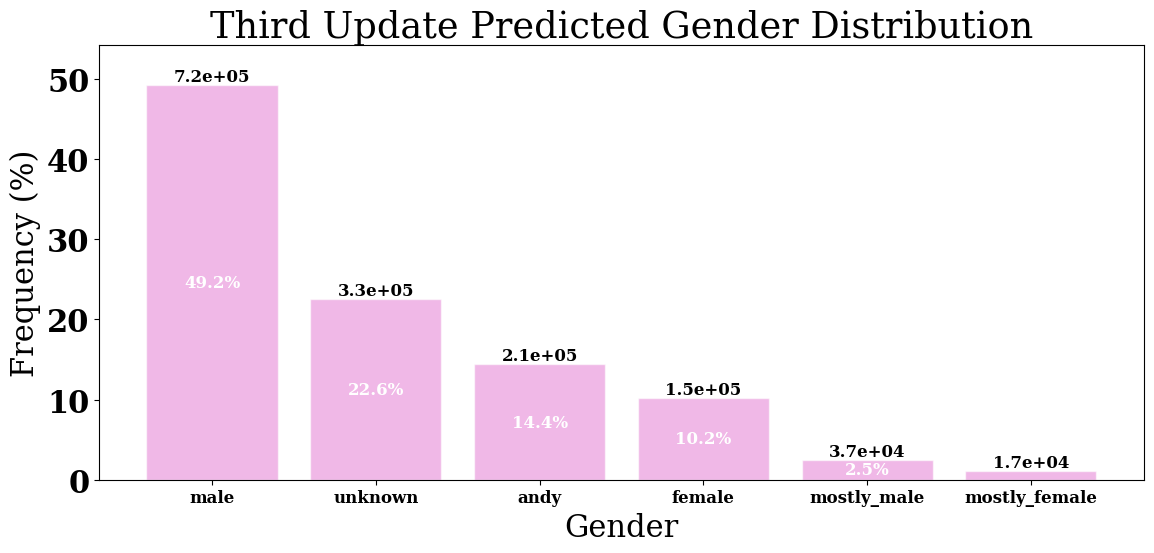

In [191]:
cat_plot(article_author_data_third_update.predicted_gender, title='Third Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='thirdupdatepredictedgender')


In [192]:
article_author_data_third_update.predicted_gender.value_counts()-article_author_data_second_update.predicted_gender.value_counts()

predicted_gender
male             -85228
unknown         -390872
andy             -40720
female           -10983
mostly_male       -2899
mostly_female     -1127
Name: count, dtype: int64

In [167]:
third_andy_country=article_author_data_third_update.author_country_name[article_author_data_third_update.predicted_gender=='andy']
third_andy_country=third_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
third_andy_name=article_author_data_third_update.extracted_first_name[article_author_data_third_update.predicted_gender=='andy']


In [168]:
third_unknown_country=article_author_data_third_update.author_country_name[article_author_data_third_update.predicted_gender=='unknown']
third_unknown_country=third_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
third_unknown_name=article_author_data_third_update.extracted_first_name[article_author_data_third_update.predicted_gender=='unknown']

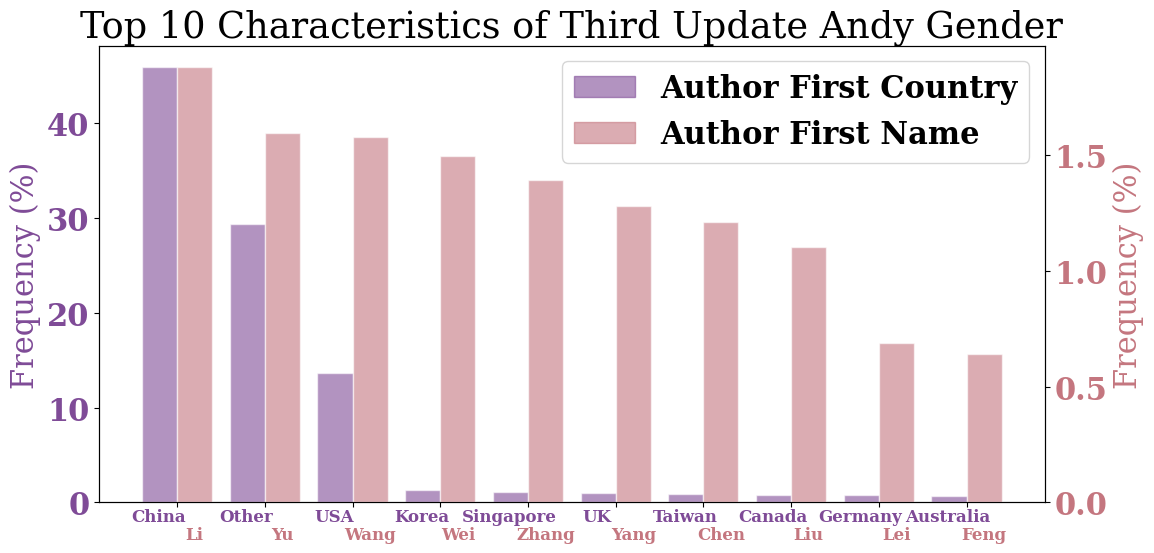

In [169]:
cat_top_plot_dual_axis(third_andy_country, third_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Third Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_third')


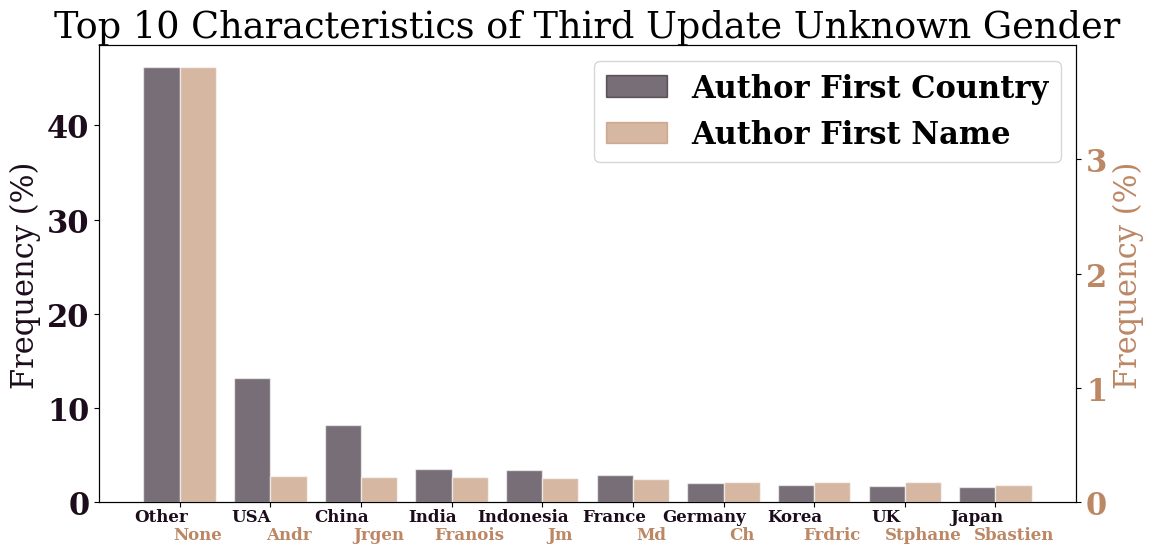

In [170]:
cat_top_plot_dual_axis(third_unknown_country, third_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Third Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_third')


## Fourth Update: Update Names Including Special Characters 

In [182]:
#clearly andy gender are chinese names and unknown gender are "undefined" names with special characters that have not been read right.


In [183]:
def update_wrong_names_gender(df):
    # Create a copy of the original dataframe
    df_updated = df.copy()

    # Initialize gender detector
    detector = gender.Detector(case_sensitive=False)

    # Identify rows where predicted_gender is 'andy' or 'unknown'
    mask_unknown_andy = df_updated['predicted_gender'].isin(['andy', 'unknown'])

    # Group by author_id and find the most common selected_full_name for rows with 'andy' or 'unknown'
    most_common_names = df_updated[mask_unknown_andy].groupby('author_id')['selected_full_name'].apply(
        lambda x: x.mode().iloc[0] if not x.empty else None
    ).reset_index()

    # Merge most_common_names back to the original dataframe to get the corresponding extracted_first_name
    df_updated = pd.merge(df_updated, most_common_names, on='author_id', how='left', suffixes=('', '_most_common'))

    # Update extracted_first_name with the first part of the most common name for rows with 'andy' or 'unknown'
    mask_unknown_andy = df_updated['predicted_gender'].isin(['andy', 'unknown'])
    df_updated.loc[mask_unknown_andy, 'extracted_first_name'] = df_updated.loc[mask_unknown_andy, 'selected_full_name_most_common'].apply(
    lambda x: str(x).split(' ')[0] if isinstance(x, str) else '')



    # Update predicted_gender based on the updated extracted_first_name for rows with 'andy' or 'unknown'
    conditions = (df_updated['author_country_name_api'].isin(['unknown', 'other_countries']))

    # Add tqdm for progress monitoring
    for idx in tqdm(df_updated[mask_unknown_andy].index, desc='Updating gender predictions'):
        row = df_updated.loc[idx]
        if conditions[idx]:
            df_updated.at[idx, 'predicted_gender'] = detector.get_gender(row['extracted_first_name'])
        else:
            df_updated.at[idx, 'predicted_gender'] = detector.get_gender(row['extracted_first_name'], row['author_country_name_api'])

    # Drop unnecessary columns from the intermediate steps
    df_updated = df_updated.drop(['selected_full_name_most_common'], axis=1, errors='ignore')

    return df_updated


In [184]:
%%time
article_author_data_fourth_update = update_wrong_names_gender(article_author_data_third_update)


Updating gender predictions: 100%|███| 542455/542455 [00:23<00:00, 23194.73it/s]


CPU times: user 26.3 s, sys: 10.5 s, total: 36.8 s
Wall time: 1min 33s


In [185]:
len(article_author_data_fourth_update)

1468452

In [186]:
article_author_data_fourth_update.predicted_gender.isna().sum()

0

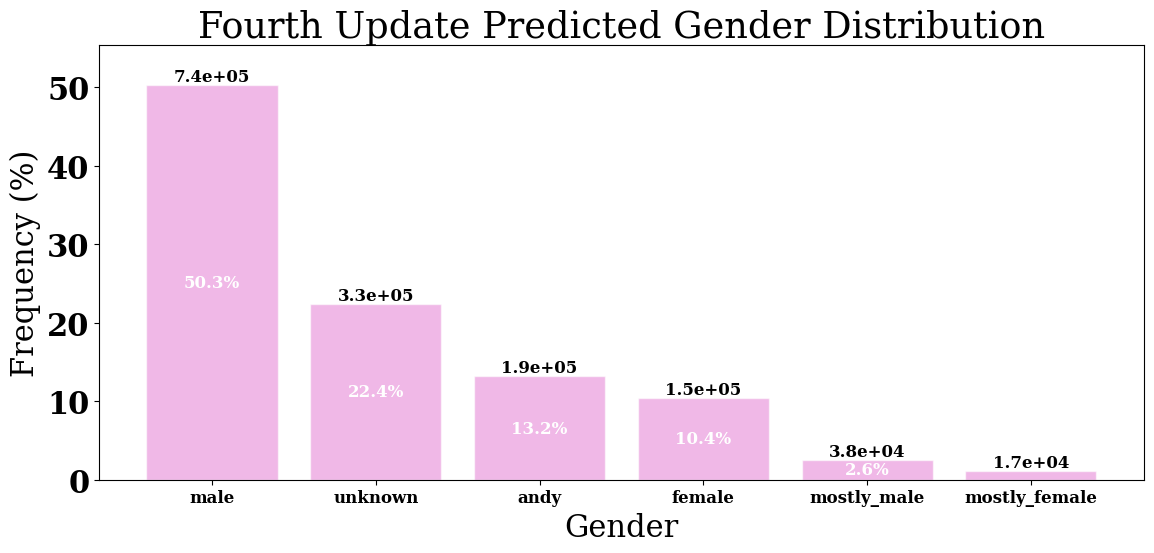

In [193]:
cat_plot(article_author_data_fourth_update.predicted_gender, title='Fourth Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='fourthupdatepredictedgender')


In [194]:
article_author_data_fourth_update.predicted_gender.value_counts()-article_author_data_third_update.predicted_gender.value_counts()

predicted_gender
male             15869
unknown          -2013
andy            -17938
female            2940
mostly_male       1082
mostly_female       60
Name: count, dtype: int64

In [187]:
fourth_andy_country=article_author_data_fourth_update.author_country_name[article_author_data_fourth_update.predicted_gender=='andy']
fourth_andy_country=fourth_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
fourth_andy_name=article_author_data_fourth_update.extracted_first_name[article_author_data_fourth_update.predicted_gender=='andy']


In [188]:
fourth_unknown_country=article_author_data_fourth_update.author_country_name[article_author_data_fourth_update.predicted_gender=='unknown']
fourth_unknown_country=fourth_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
fourth_unknown_name=article_author_data_fourth_update.extracted_first_name[article_author_data_fourth_update.predicted_gender=='unknown']

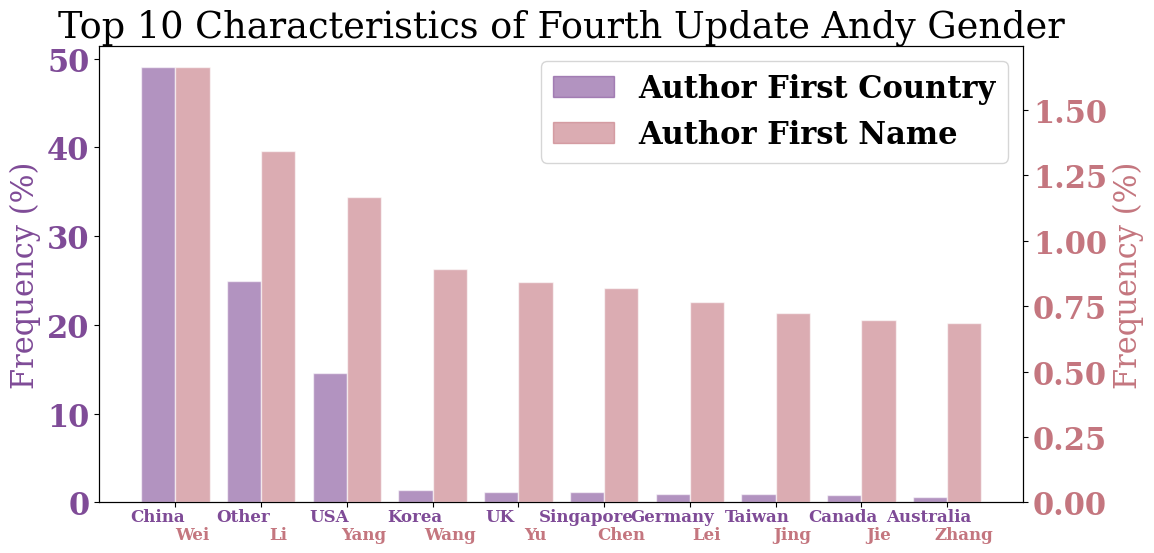

In [189]:
cat_top_plot_dual_axis(fourth_andy_country, fourth_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Fourth Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_fourth')


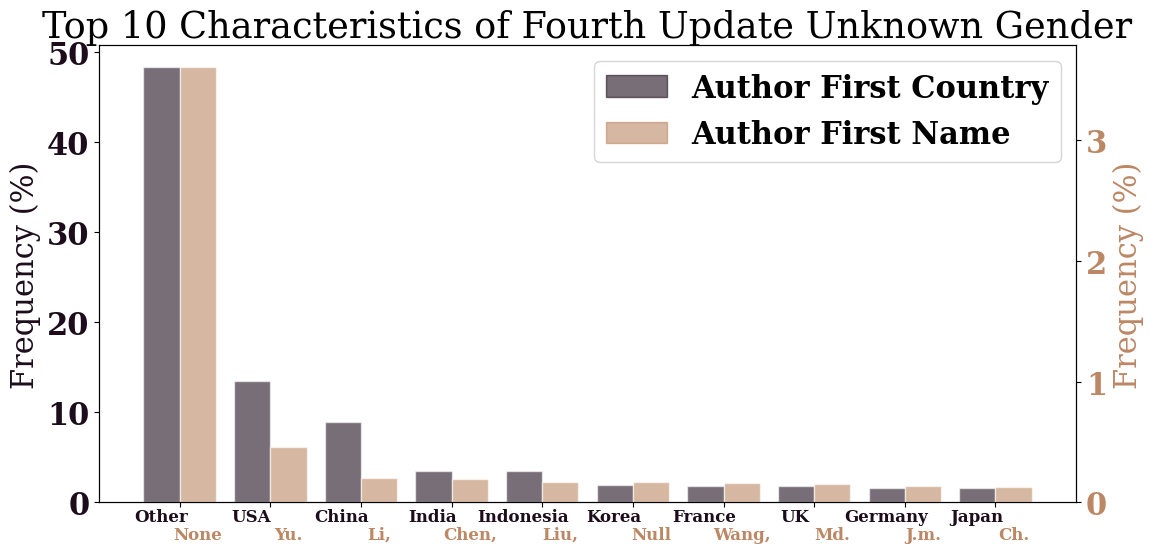

In [190]:
cat_top_plot_dual_axis(fourth_unknown_country, fourth_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Fourth Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_fourth')


## Fifth Update: Update None Names 

In [204]:
#let's check what the "none" names looks like now 
article_author_data_fourth_update[['selected_full_name', 'extracted_first_name', 'predicted_gender']][article_author_data_fourth_update['extracted_first_name']=='none'].value_counts()

#they are all none, unknown so we can discard these from the data

selected_full_name                 extracted_first_name  predicted_gender
none nana                          none                  unknown             18
none 梁潇文                           none                  unknown             13
none 江志晃                           none                  unknown             11
none 张福龙                           none                  unknown             10
none nina notman, special to c&en  none                  unknown             10
                                                                             ..
none 岳龙金                           none                  unknown              1
none 岳甜甜                           none                  unknown              1
none 岳炜坤                           none                  unknown              1
none 岳森                            none                  unknown              1
zhu xing-long                      none                  unknown              1
Name: count, Length: 9386, dtype: int64

In [205]:
#let's create an algorithm that can extract the name in "selected full name" that is not none.
#so if the name is "none subiki" it should select subiki rather than "none" and then replace "extracted first name" with that instead. 
#then it should also update gender if it updates the name - however only if the gender is "unknown" or "andy" 

In [206]:
def update_none_name_and_gender(df):

    # Create a copy of the input DataFrame
    df_copy = df.copy()

    # Create a mask for rows where 'extracted_first_name' is 'none' and 'selected_full_name' is not 'none anonymous'
    mask = (df_copy['extracted_first_name'] == 'none') & (df_copy['selected_full_name'] != 'none anonymous')

    # Update 'extracted_first_name' with the second part of 'selected_full_name' separated by space
    df_copy.loc[mask, 'extracted_first_name'] = df_copy.loc[mask, 'selected_full_name'].apply(lambda x: x.split(' ')[1] if ' ' in x and 'anonymous' not in x else x)

    # Create a mask for rows where 'predicted_gender' is either 'unknown' or 'andy'
    mask_unknown_gender = df_copy['predicted_gender'].isin(['unknown', 'andy'])

    # Create a mask for rows where 'author_country_name_api' is in ["unknown", "other_countries", "none"]
    mask_unknown_country = df_copy['author_country_name_api'].isin(['unknown', 'other_countries', 'none'])

    # Update 'predicted_gender' based on 'extracted_first_name' and 'author_country_name_api'
    detector = gender.Detector(case_sensitive=False)
    df_copy.loc[mask & mask_unknown_gender & ~mask_unknown_country, 'predicted_gender'] = df_copy.loc[mask & mask_unknown_gender & ~mask_unknown_country].apply(lambda row: detector.get_gender(row['extracted_first_name'], row['author_country_name_api']), axis=1)

    # Update 'predicted_gender' based on 'extracted_first_name' only
    df_copy.loc[mask & mask_unknown_gender & mask_unknown_country, 'predicted_gender'] = df_copy.loc[mask & mask_unknown_gender & mask_unknown_country, 'extracted_first_name'].apply(lambda x: detector.get_gender(x))

    return df_copy


In [207]:
#try on the entire clean dataframe 
article_author_data_fifth_update=update_none_name_and_gender(article_author_data_fourth_update)

In [210]:
#let's check what the "none" names looks like now 
article_author_data_fifth_update[['selected_full_name', 'extracted_first_name', 'predicted_gender']][article_author_data_fourth_update['extracted_first_name']=='none'].value_counts()

#they are all none, unknown so we can discard these from the data

selected_full_name  extracted_first_name  predicted_gender
none nana           nana                  female              18
none 梁潇文            梁潇文                   unknown             13
none 江志晃            江志晃                   unknown             11
none 张福龙            张福龙                   unknown             10
none 张云龙            张云龙                   unknown             10
                                                              ..
none 岳森             岳森                    unknown              1
none 岳晓芳            岳晓芳                   unknown              1
none 岳春燕            岳春燕                   unknown              1
none 岳成杰            岳成杰                   unknown              1
zhu xing-long       xing-long             unknown              1
Name: count, Length: 9388, dtype: int64

In [209]:
len(article_author_data_fifth_update)

1468452

In [211]:
article_author_data_fifth_update.predicted_gender.isna().sum()

0

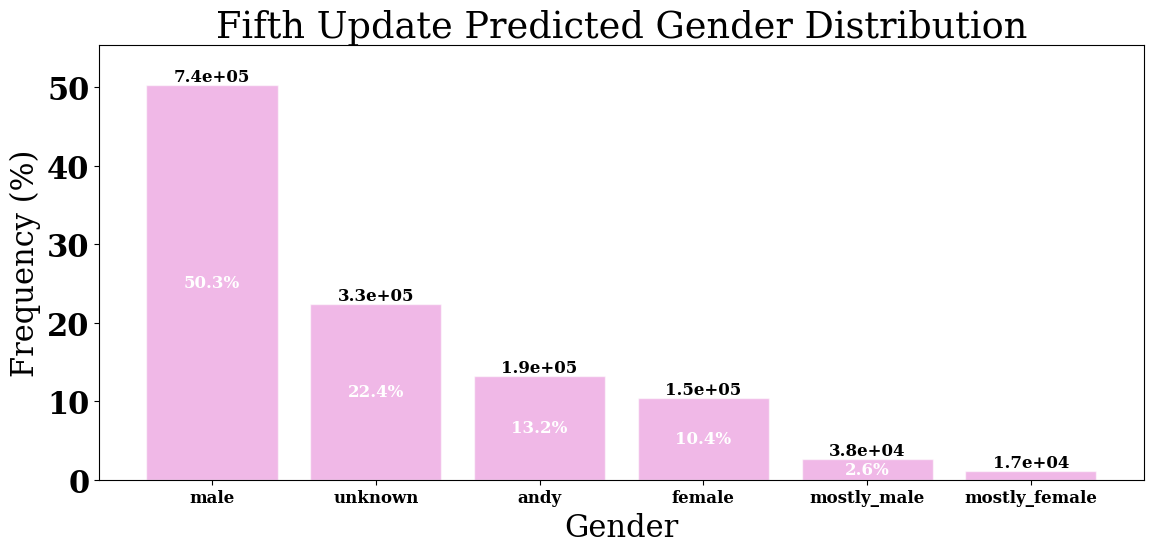

In [212]:
cat_plot(article_author_data_fifth_update.predicted_gender, title='Fifth Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='fifthupdatepredictedgender')


In [213]:
article_author_data_fifth_update.predicted_gender.value_counts()-article_author_data_fourth_update.predicted_gender.value_counts()

predicted_gender
male              165
unknown         -1021
andy              650
female            148
mostly_male        27
mostly_female      31
Name: count, dtype: int64

In [214]:
fifth_andy_country=article_author_data_fifth_update.author_country_name[article_author_data_fifth_update.predicted_gender=='andy']
fifth_andy_country=fifth_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
fifth_andy_name=article_author_data_fifth_update.extracted_first_name[article_author_data_fifth_update.predicted_gender=='andy']


In [215]:
fifth_unknown_country=article_author_data_fifth_update.author_country_name[article_author_data_fifth_update.predicted_gender=='unknown']
fifth_unknown_country=fifth_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
fifth_unknown_name=article_author_data_fifth_update.extracted_first_name[article_author_data_fifth_update.predicted_gender=='unknown']

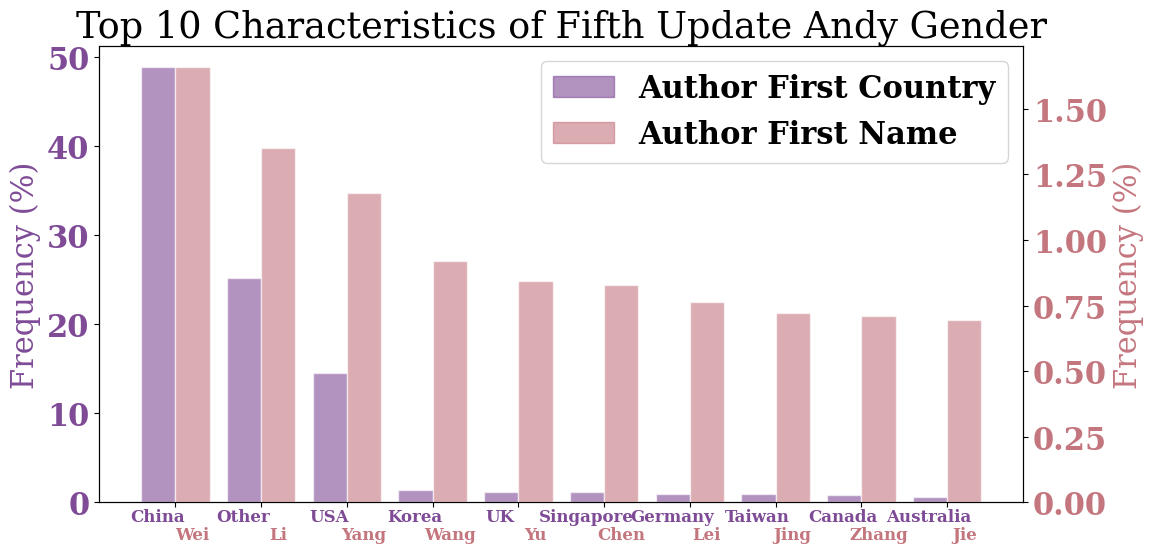

In [216]:
cat_top_plot_dual_axis(fifth_andy_country, fifth_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Fifth Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_fifth')


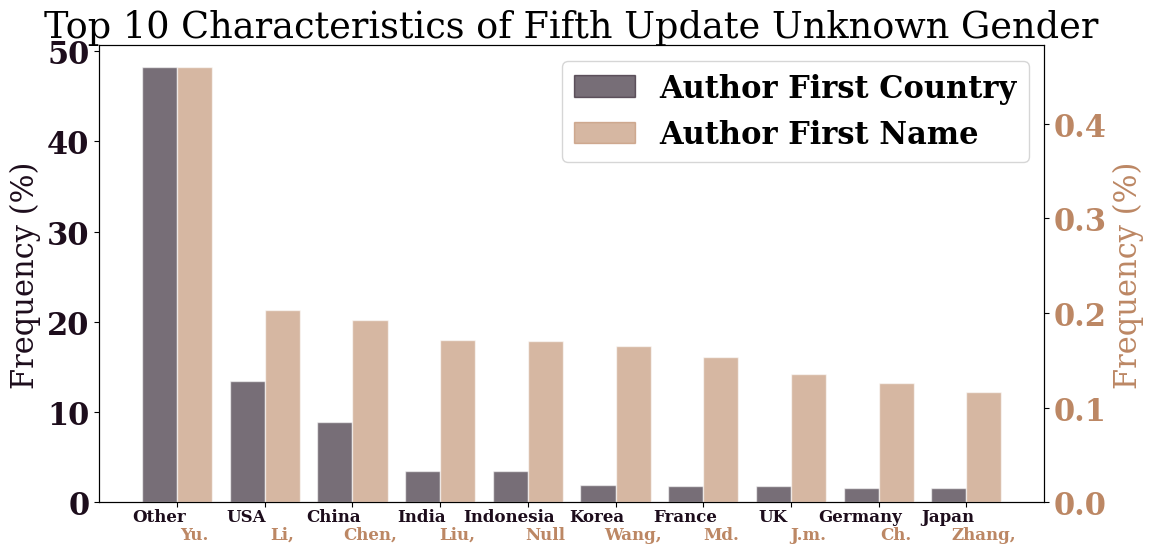

In [217]:
cat_top_plot_dual_axis(fifth_unknown_country, fifth_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Fifth Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_fifth')


In [ ]:
#should we maybe make an update where we make sure to remove those names containing , and . etc 

## Sixth Update: Remove , and . from names and update again 

In [231]:
def strip_name(name):
    if not name:
        return name  # Return empty string if name is empty
    if name[-1] in ('.', ',', '-') and len(name) > 1 and not name[-2].isspace():
        return name[:-1]
    else:
        return name


In [232]:
# Assuming df is your DataFrame containing the "extracted_first_name" column
article_author_data_fifth_update['extracted_first_name'] = article_author_data_fifth_update['extracted_first_name'].apply(strip_name)


In [233]:
article_author_data_fifth_update['extracted_first_name']

0                 rolf
1                  e.m
2               thomas
3                   ya
4                   yu
              ...     
1468447         reyhan
1468448    abdulrahman
1468449         subash
1468450         arshad
1468451         hashim
Name: extracted_first_name, Length: 1468452, dtype: object

In [249]:
from tqdm import tqdm

def update_updated_names_gender(df):
    # Create a copy of the original dataframe
    df_updated = df.copy()

    # Initialize gender detector
    detector = gender.Detector(case_sensitive=False)

    # Identify rows where predicted_gender is 'andy' or 'unknown'
    mask_unknown_andy = df_updated['predicted_gender'].isin(['andy', 'unknown'])

    # Define function to update gender based on first name and country
    def update_gender(row):
        if pd.isna(row['extracted_first_name']):
            return row['predicted_gender']  # Return original gender if first name is missing
        elif row['author_country_name_api'] in ['unknown', 'other_countries']:
            return detector.get_gender(row['extracted_first_name'])
        else:
            return detector.get_gender(row['extracted_first_name'], row['author_country_name_api'])

    # Update predicted_gender based on the updated extracted_first_name and country
    df_updated.loc[mask_unknown_andy, 'predicted_gender'] = df_updated[mask_unknown_andy].apply(update_gender, axis=1)

    return df_updated


In [254]:
article_author_data_sixth_update = update_updated_names_gender(article_author_data_fifth_update)


In [255]:
len(article_author_data_sixth_update)

1468452

In [256]:
article_author_data_sixth_update.predicted_gender.isna().sum()

0

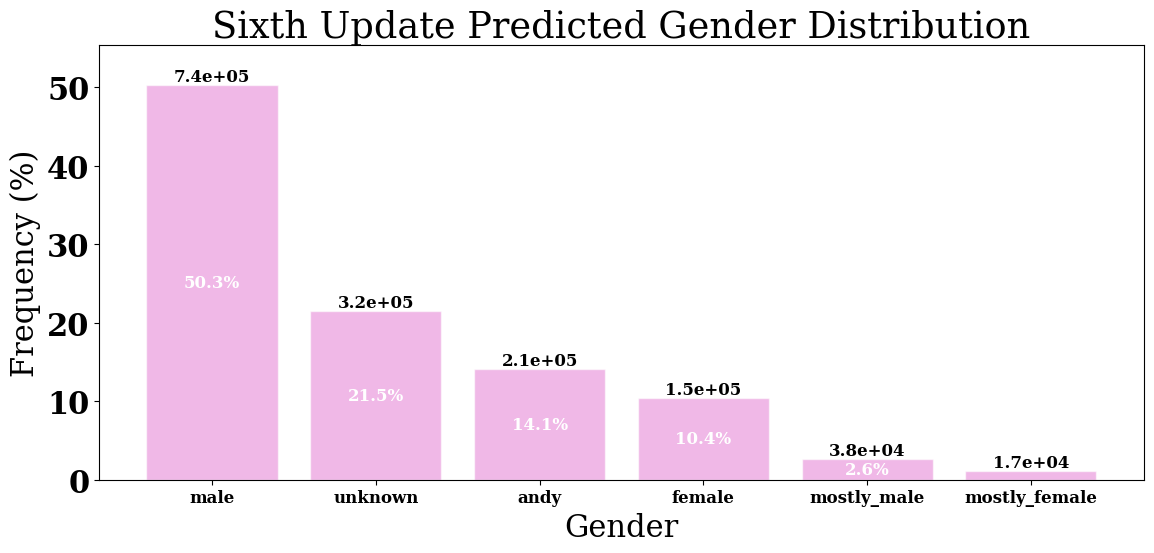

In [259]:
cat_plot(article_author_data_sixth_update.predicted_gender, title='Sixth Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='sixthupdatepredictedgender')


In [260]:
article_author_data_sixth_update.predicted_gender.value_counts()-article_author_data_fifth_update.predicted_gender.value_counts()

predicted_gender
male                84
unknown         -13110
andy             13008
female               7
mostly_male          3
mostly_female        8
Name: count, dtype: int64

In [262]:
sixth_andy_country=article_author_data_sixth_update.author_country_name[article_author_data_sixth_update.predicted_gender=='andy']
sixth_andy_country=sixth_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
sixth_andy_name=article_author_data_sixth_update.extracted_first_name[article_author_data_sixth_update.predicted_gender=='andy']


In [263]:
sixth_unknown_country=article_author_data_sixth_update.author_country_name[article_author_data_sixth_update.predicted_gender=='unknown']
sixth_unknown_country=sixth_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
sixth_unknown_name=article_author_data_sixth_update.extracted_first_name[article_author_data_sixth_update.predicted_gender=='unknown']

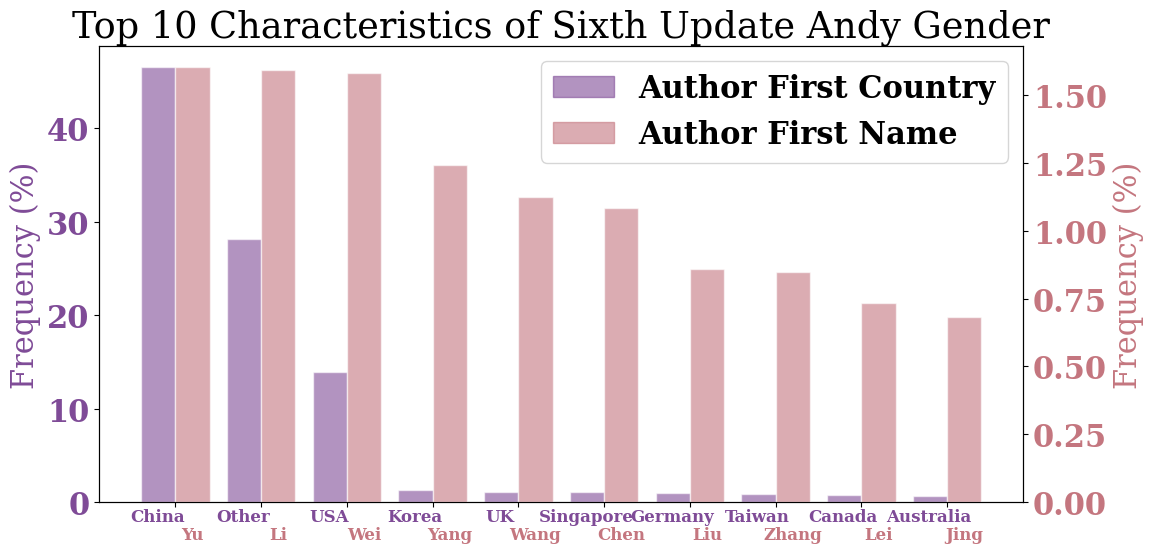

In [264]:
cat_top_plot_dual_axis(sixth_andy_country, sixth_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Sixth Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_sixth')


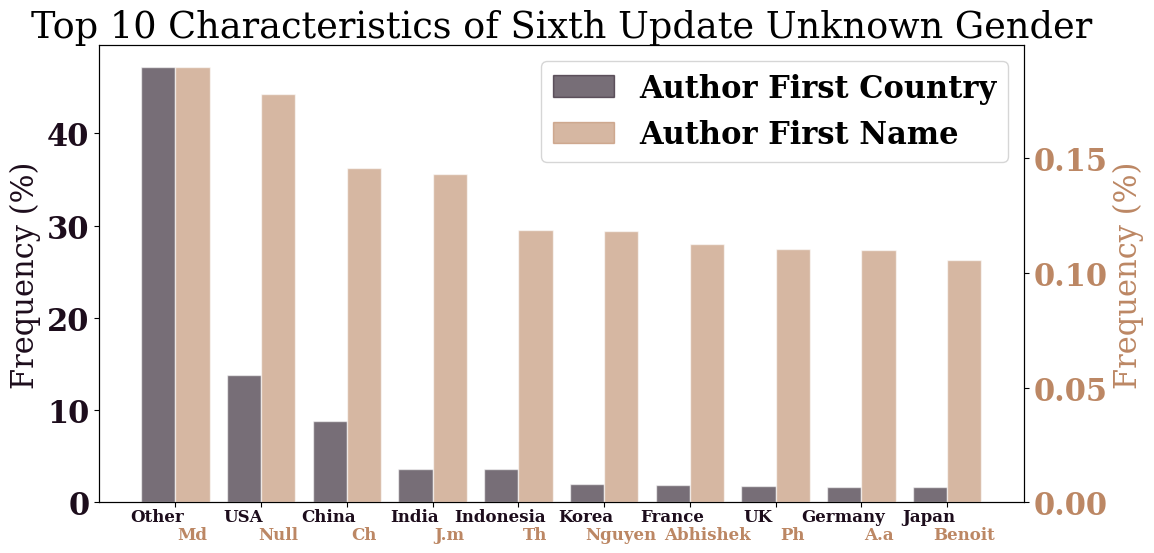

In [265]:
cat_top_plot_dual_axis(sixth_unknown_country, sixth_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Sixth Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_sixth')


## Seventh Update: Update Andy/Unknown Value With Gender of Identical Name

### Load Update 7

In [1283]:
%%time
with open('OpenAlex Data/Unify2024/11042024CleanArticleAuthorDataUpdateSeventh19702023.pkl', 'rb') as f:
    article_author_data_seventh_update = pickle.load(f)

CPU times: user 2.46 s, sys: 9.77 s, total: 12.2 s
Wall time: 2min 3s


In [5]:
len(article_author_data_seventh_update)

1468452

In [6]:
article_author_data_seventh_update.predicted_gender.isna().sum()

0

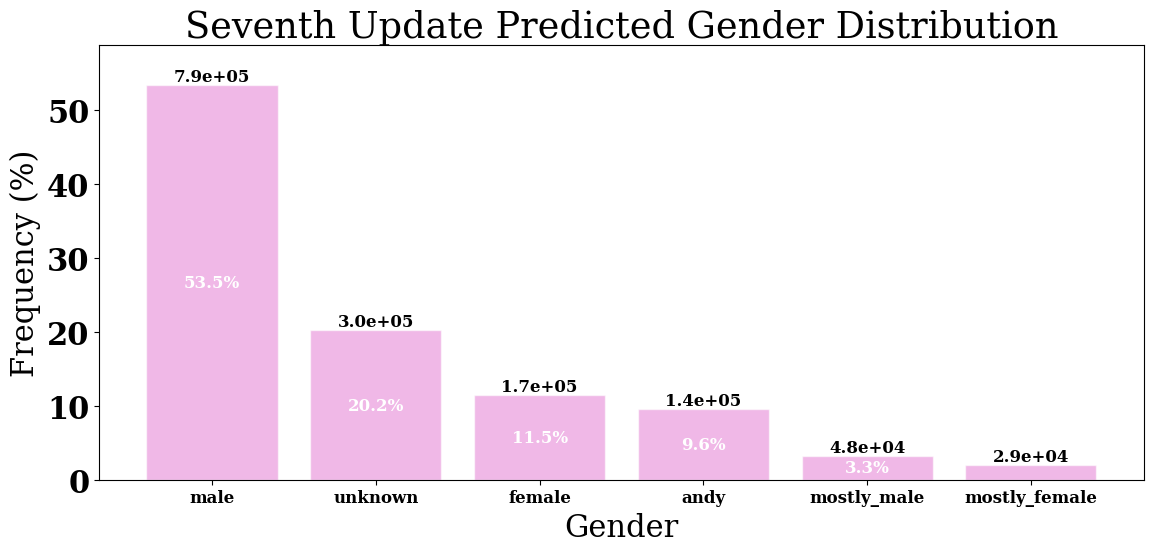

In [278]:
cat_plot(article_author_data_seventh_update.predicted_gender, title='Seventh Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='seventhupdatepredictedgender')


In [279]:
article_author_data_seventh_update.predicted_gender.value_counts()-article_author_data_sixth_update.predicted_gender.value_counts()

predicted_gender
andy            -66166
female           16338
male             45925
mostly_female    12163
mostly_male      10101
unknown         -18361
Name: count, dtype: int64

In [280]:
seventh_andy_country=article_author_data_seventh_update.author_country_name[article_author_data_seventh_update.predicted_gender=='andy']
seventh_andy_country=seventh_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
seventh_andy_name=article_author_data_seventh_update.extracted_first_name[article_author_data_seventh_update.predicted_gender=='andy']


In [281]:
seventh_unknown_country=article_author_data_seventh_update.author_country_name[article_author_data_seventh_update.predicted_gender=='unknown']
seventh_unknown_country=seventh_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
seventh_unknown_name=article_author_data_seventh_update.extracted_first_name[article_author_data_seventh_update.predicted_gender=='unknown']

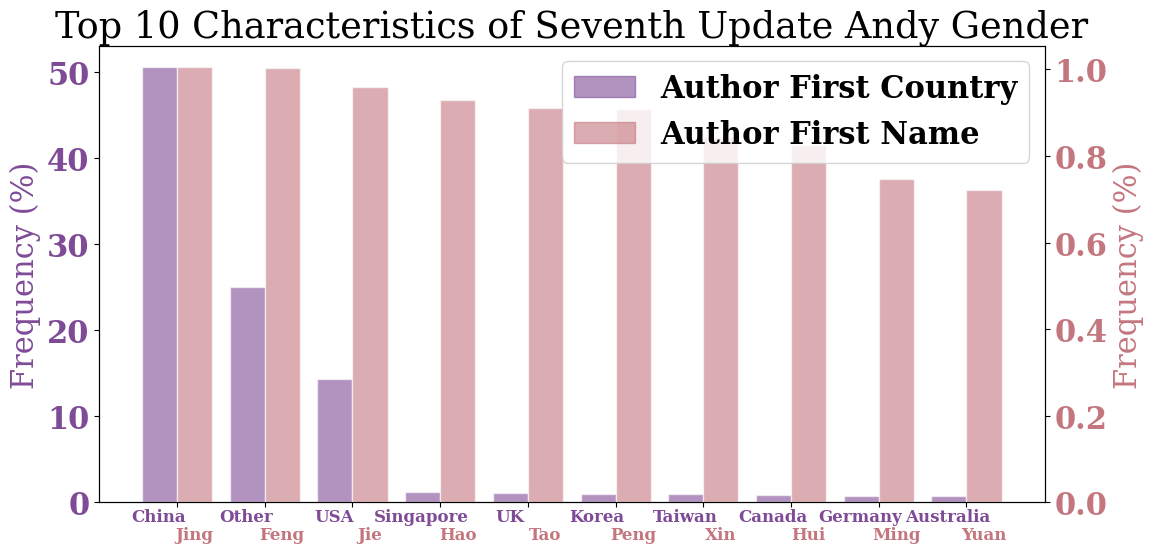

In [282]:
cat_top_plot_dual_axis(seventh_andy_country, seventh_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Seventh Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_seventh')


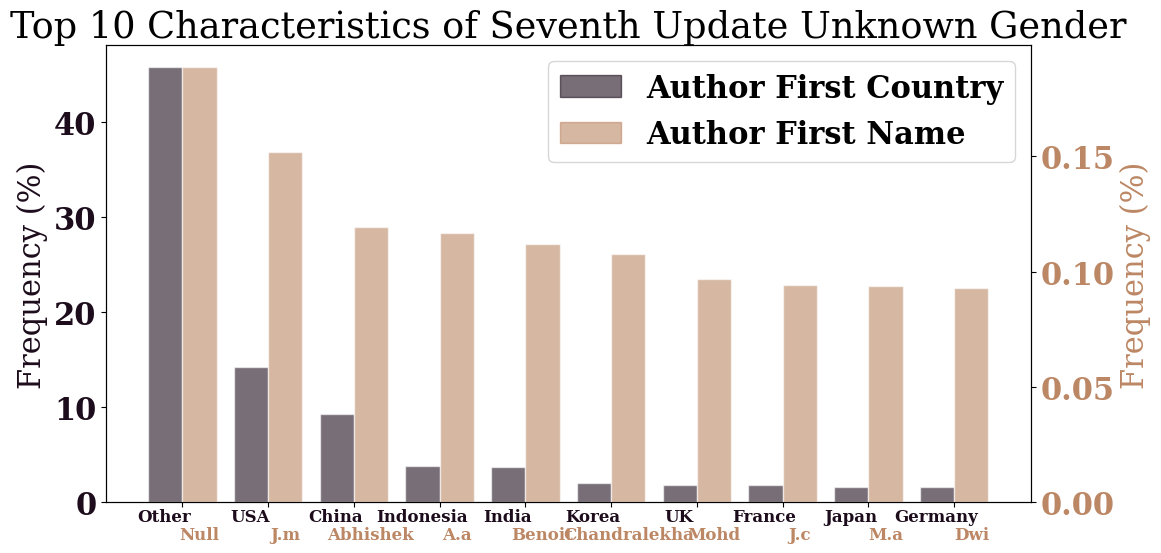

In [283]:
cat_top_plot_dual_axis(seventh_unknown_country, seventh_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Seventh Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_seventh')


## Eight Update: Update Genders of Top Appearing Unkown/Andy Names with Gender API 

In [1284]:
#first find the top names in unknown and andy 
unknown_andy_final=article_author_data_seventh_update[article_author_data_seventh_update['predicted_gender'].isin(['andy', 'unknown'])]



In [1285]:
data_gender_api = {
    "name_gender_api": unknown_andy_final.extracted_first_name.value_counts().reset_index()['extracted_first_name'].to_list()
}


df_gender_api = pd.DataFrame(data_gender_api)
df_gender_api


name_gender_api
0                 jing
1                 feng
2                  jie
3                  hao
4                  tao
...                ...
107436        nouamane
107437        deiphine
107438       bingxiang
107439           yindi
107440        rongdong

[107441 rows x 1 columns]

In [1286]:
df_gender_api_final_saved=pd.read_csv('Data Backup/df_gender_api_final09042024.csv')
df_gender_api_final_saved.drop(columns={'Unnamed: 0'}, inplace=True)

In [1287]:
#merge the new and old 
df_gender_api_final=pd.merge(df_gender_api, df_gender_api_final_saved, on='name_gender_api', how='left')


In [1288]:
df_gender_api_final_notmissing=df_gender_api_final.dropna()

In [1289]:
df_gender_api_missing=df_gender_api_final[df_gender_api_final.gender_gender_api.isna()]

In [1290]:
#let's first filter out meaningless names before using the gender API 
df_gender_api_missing_filtered = df_gender_api_missing[~df_gender_api_missing['name_gender_api'].str.match(r'^[a-zA-Z]\.|^[a-zA-Z]\,$')]
#and filter out the NULL one since that doesn't make sense 
df_gender_api_missing_filtered=df_gender_api_missing_filtered[df_gender_api_missing_filtered['name_gender_api']!='NULL']

### Load Update 8

In [1320]:
gender_gender_api_final=pd.read_csv('Data Backup/gender_gender_api_final.csv')


In [1280]:
%%time
#genders saved in second latest edition of final data 
with open('OpenAlex Data/Unify2024/01042024FinalData.pkl', 'rb') as f:
    second_to_final_data = pickle.load(f)

CPU times: user 3.57 s, sys: 18.5 s, total: 22.1 s
Wall time: 5min 19s


In [1296]:
#use only necessary columns to continue 
second_to_final_data_gender=second_to_final_data[['extracted_first_name', 'predicted_gender']].dropna()

In [1297]:
second_to_final_data_gender

extracted_first_name predicted_gender
0                       rolf             male
2                     thomas             male
5                         yu             male
7                     harvey             male
8                    richard             male
...                      ...              ...
1472222            toshiyuki             male
1472223               reyhan           female
1472224          abdulrahman             male
1472226               arshad             male
1472227               hashim             male

[1054554 rows x 2 columns]

In [1305]:
#find the ones that is still miss gender from this update 
missing_gender=df_gender_api_missing_filtered['name_gender_api'][103::].reset_index()
missing_gender.drop(columns={'index'}, inplace=True)

In [1306]:
missing_gender

name_gender_api
0                 éric
1               wenbin
2             shanshan
3              xuefeng
4            xiao-gang
...                ...
104683        nouamane
104684        deiphine
104685       bingxiang
104686           yindi
104687        rongdong

[104688 rows x 1 columns]

In [1308]:
#merge with genders and names from second to final data 
missing_gender_names=pd.merge(missing_gender, second_to_final_data_gender, left_on="name_gender_api", right_on="extracted_first_name")

In [1309]:
missing_gender_names

name_gender_api extracted_first_name predicted_gender
0                 na                   na    mostly_female
1                 na                   na             male
2                 na                   na             male
3                 na                   na             male
4                 na                   na             male
...              ...                  ...              ...
1694              lh                   lh             male
1695              lh                   lh             male
1696              lh                   lh             male
1697           dotti                dotti             male
1698           dotti                dotti    mostly_female

[1699 rows x 3 columns]

In [1322]:
missing_gender_names_final=missing_gender_names.groupby('name_gender_api').predicted_gender.agg(lambda x : x.mode()[0]).reset_index()

In [ ]:
#concat with gender_gender_api_final

In [1325]:
missing_gender_names_final.rename(columns={'predicted_gender':'gender_gender_api'}, inplace=True)

In [1327]:
gender_gender_api_final.drop(columns={'Unnamed: 0'}, inplace=True)

In [1330]:
len(gender_gender_api_final)+len(missing_gender_names_final)

215

In [1331]:
gender_gender_api_final=pd.concat([gender_gender_api_final, missing_gender_names_final])

In [1332]:
#now we should merge these back to our full data 
article_author_data_eighth_update=article_author_data_seventh_update.copy()

In [1333]:
#if the name in the dataframe is in the df_gender_api and the gender of that name is "unknown" or "andy"
#it should take the gender of that name in df_gender_api and replace it 
article_author_data_eighth_update = pd.merge(article_author_data_eighth_update, gender_gender_api_final, left_on="extracted_first_name", right_on="name_gender_api", how="left")


In [1334]:
#now we need to replace the value in predicted_gender with the value in gender_gender_api IF
#1) the predicted_gender is andy or unknown and 
#2) the gender_gender_api is not NaN


mask = (article_author_data_eighth_update['predicted_gender'].isin(['andy', 'unknown'])) & (~article_author_data_eighth_update['gender_gender_api'].isna())
article_author_data_eighth_update.loc[mask, 'predicted_gender'] = article_author_data_eighth_update.loc[mask, 'gender_gender_api']


In [1335]:
len(article_author_data_eighth_update)

1468452

In [1336]:
article_author_data_eighth_update.predicted_gender.isna().sum()

0

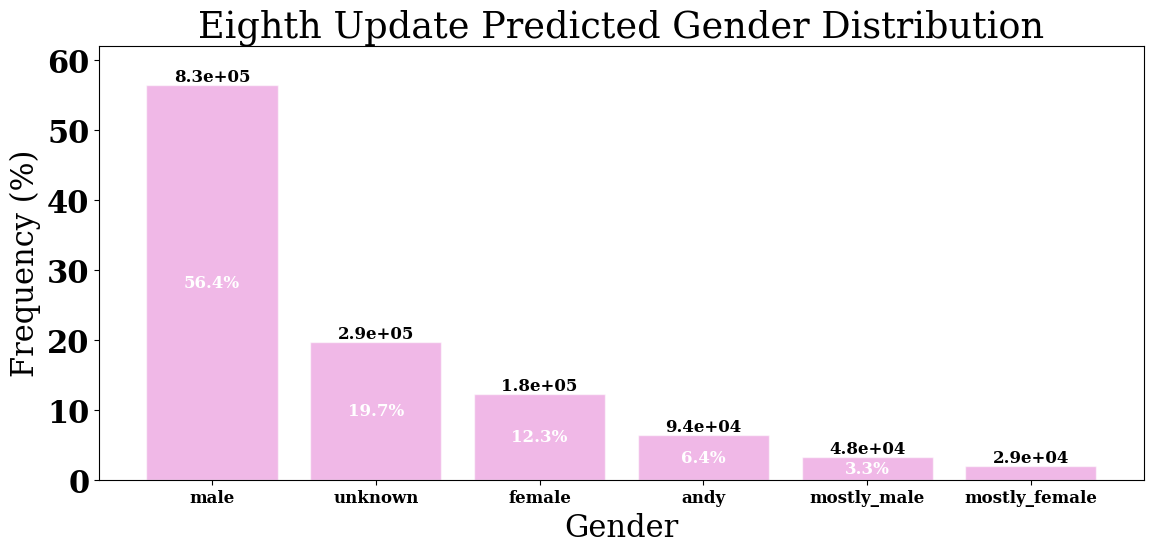

In [1337]:
cat_plot(article_author_data_eighth_update.predicted_gender, title='Eighth Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='eighthupdatepredictedgender')


In [1338]:
article_author_data_eighth_update.predicted_gender.value_counts()-article_author_data_seventh_update.predicted_gender.value_counts()

predicted_gender
male             43486
unknown          -8047
female           11216
andy            -46663
mostly_male          1
mostly_female        7
Name: count, dtype: int64

In [1339]:
eighth_andy_country=article_author_data_eighth_update.author_country_name[article_author_data_eighth_update.predicted_gender=='andy']
eighth_andy_country=eighth_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
eighth_andy_name=article_author_data_eighth_update.extracted_first_name[article_author_data_eighth_update.predicted_gender=='andy']


In [1340]:
eighth_unknown_country=article_author_data_eighth_update.author_country_name[article_author_data_eighth_update.predicted_gender=='unknown']
eighth_unknown_country=eighth_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
eighth_unknown_name=article_author_data_eighth_update.extracted_first_name[article_author_data_eighth_update.predicted_gender=='unknown']

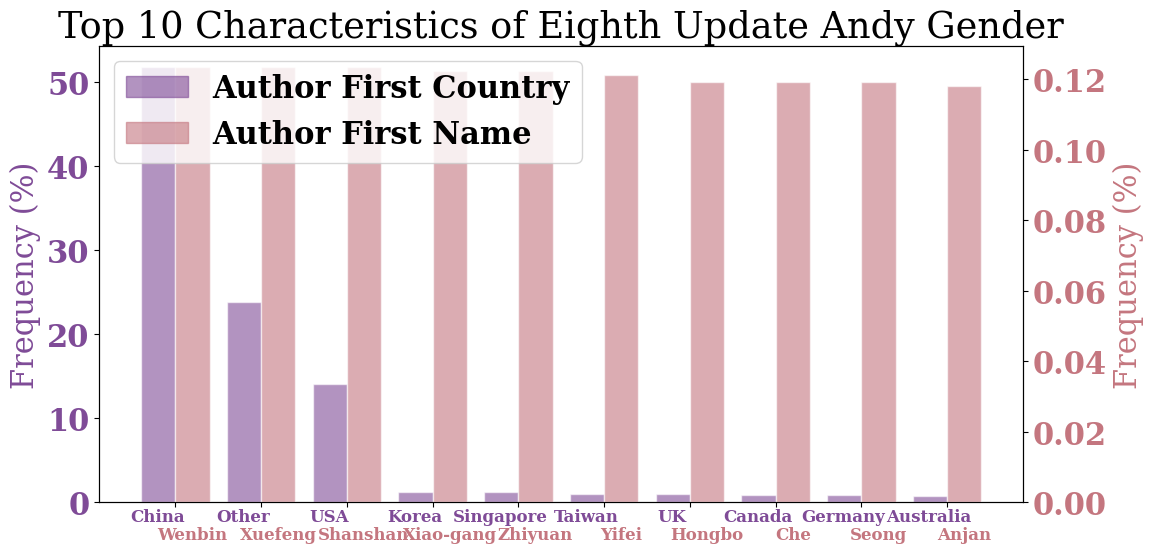

In [1341]:
cat_top_plot_dual_axis(eighth_andy_country, eighth_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Eighth Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_eighth')


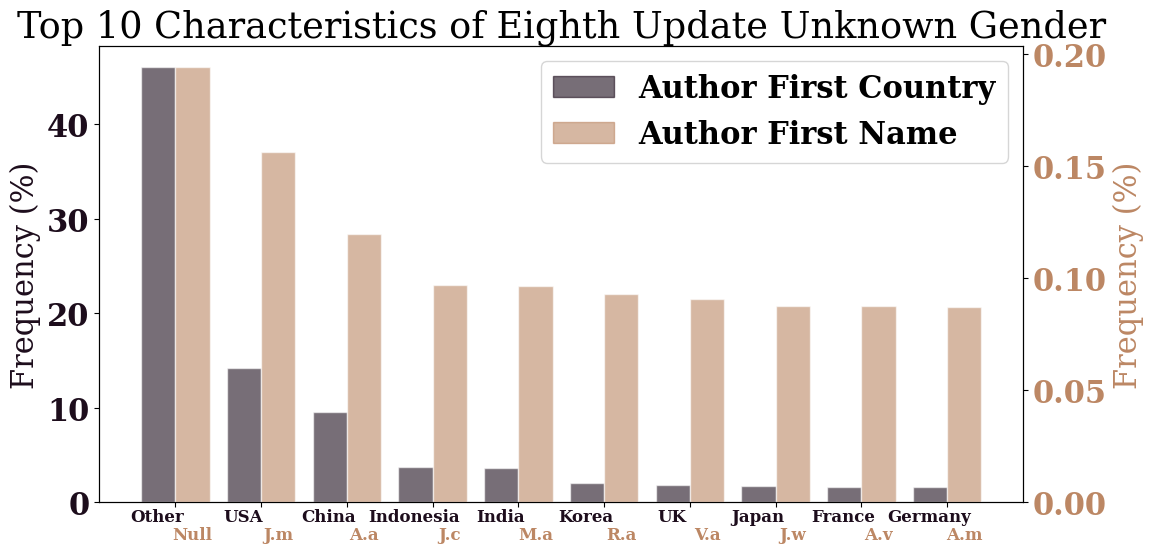

In [1342]:
cat_top_plot_dual_axis(eighth_unknown_country, eighth_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Eighth Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_eighth')


## Ninth Update: Remove non-sense names

In [1343]:
article_author_data_ninth_update=article_author_data_eighth_update.copy()

In [1344]:
#let's first filter out meaningless names before using the gender API 
article_author_data_ninth_update = article_author_data_ninth_update[~article_author_data_ninth_update['extracted_first_name'].str.match(r'^[a-zA-Z]\.|^[a-zA-Z]\,$')]
#and filter out the NULL one since that doesn't make sense 
article_author_data_ninth_update=article_author_data_ninth_update[article_author_data_ninth_update['extracted_first_name']!='NULL']

In [1345]:
len(article_author_data_ninth_update) #1432907

1432907

In [1346]:
article_author_data_ninth_update.predicted_gender.isna().sum()

0

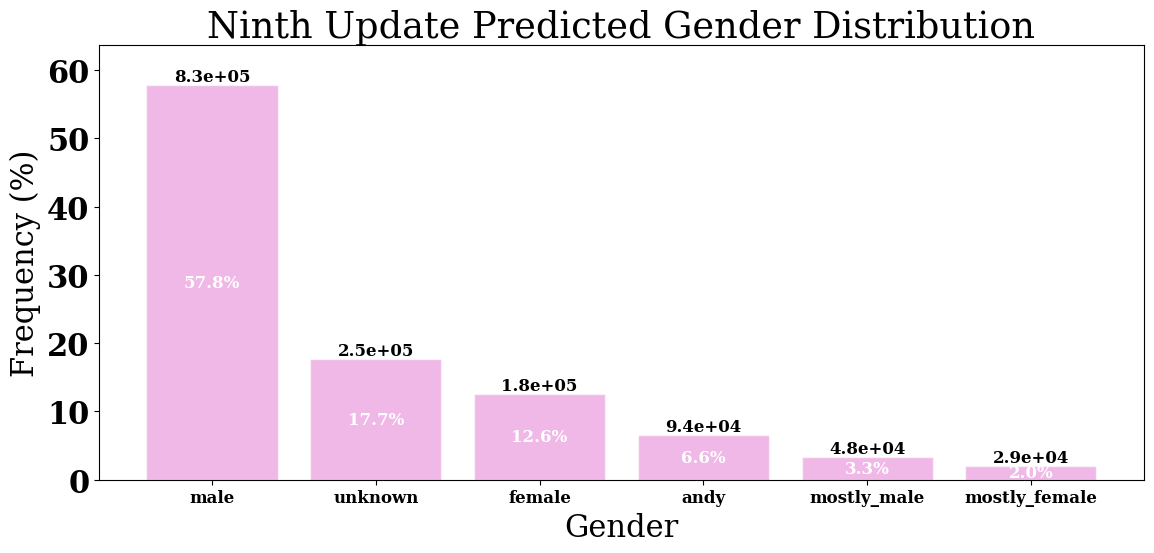

In [1347]:
cat_plot(article_author_data_ninth_update.predicted_gender, title='Ninth Update Predicted Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='ninthupdatepredictedgender')


In [1348]:
article_author_data_ninth_update.predicted_gender.value_counts()-article_author_data_eighth_update.predicted_gender.value_counts()

predicted_gender
male                -1
unknown         -35544
female               0
andy                 0
mostly_male          0
mostly_female        0
Name: count, dtype: int64

In [501]:
ninth_andy_country=article_author_data_ninth_update.author_country_name[article_author_data_ninth_update.predicted_gender=='andy']
ninth_andy_country=ninth_andy_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'korea, republic of': 'Korea', 
                                    'taiwan, province of china': 'Taiwan', 'singapore': 'Singapore', 'japan': 'Japan'})
ninth_andy_name=article_author_data_ninth_update.extracted_first_name[article_author_data_ninth_update.predicted_gender=='andy']


In [502]:
ninth_unknown_country=article_author_data_ninth_update.author_country_name[article_author_data_ninth_update.predicted_gender=='unknown']
ninth_unknown_country=ninth_unknown_country.replace({'other_countries': 'Other', 'united states': 'USA', 'united kingdom': 'UK', 'china': 'China',
                                  'canada': 'Canada', 'germany': 'Germany', 'australia':'Australia', 'france': 'France', 'italy':'Italy',
                                  'brazil':'Brazil', 'indonesia':'Indonesia', 'russian federation': 'Russia', 'india':'India',
                                                      'korea, republic of': 'Korea', 'taiwan, province of china': 'Taiwan', 
                                                       'singapore': 'Singapore', 'japan': 'Japan'})
ninth_unknown_name=article_author_data_ninth_update.extracted_first_name[article_author_data_ninth_update.predicted_gender=='unknown']

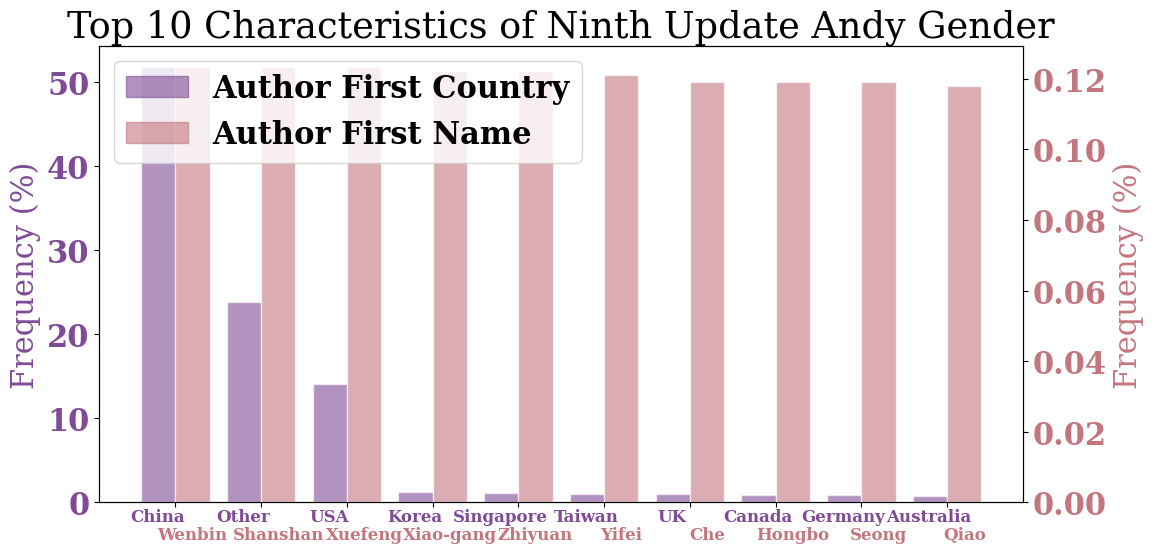

In [503]:
cat_top_plot_dual_axis(ninth_andy_country, ninth_andy_name, top_n=10, color1=color5, color2=color15,
                       title='Top 10 Characteristics of Ninth Update Andy Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_andy_ninth')


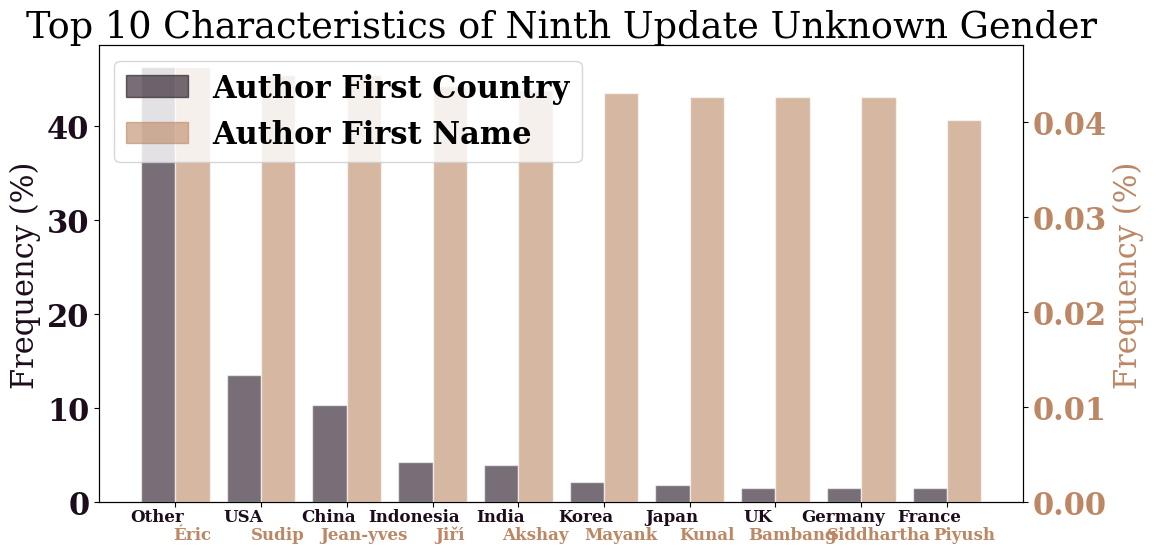

In [504]:
cat_top_plot_dual_axis(ninth_unknown_country, ninth_unknown_name, top_n=10, color1=color12, color2=color16,
                       title='Top 10 Characteristics of Ninth Update Unknown Gender', xlabel=None, norm=True, multiply=100, 
                       ylabel1='Frequency (%)', ylabel2='Frequency (%)', label1='Author First Country', label2='Author First Name', 
                       save_name='top_10_unknown_ninth')


## Final 

In [1349]:
article_author_data_final = article_author_data_ninth_update.copy()

In [1350]:
#create new column with only binary gender so female/male 
article_author_data_final['binary_gender']=article_author_data_final['predicted_gender']
article_author_data_final['binary_gender']=article_author_data_final['binary_gender'].replace({'mostly_male': 'male'})
article_author_data_final['binary_gender']=article_author_data_final['binary_gender'].replace({'mostly_female': 'female'})
# set unknown and andy as nan
article_author_data_final['binary_gender'].replace('unknown', np.nan, inplace=True)
article_author_data_final['binary_gender'].replace('andy', np.nan, inplace=True)



In [1353]:
len(article_author_data_final.binary_gender.dropna()) 

1085657

In [1354]:
#let's save this data version so that we can import it later 
with open('OpenAlex Data/Unify2024/11042024FinalData.pkl', 'wb') as f:
    pickle.dump(article_author_data_final, f)


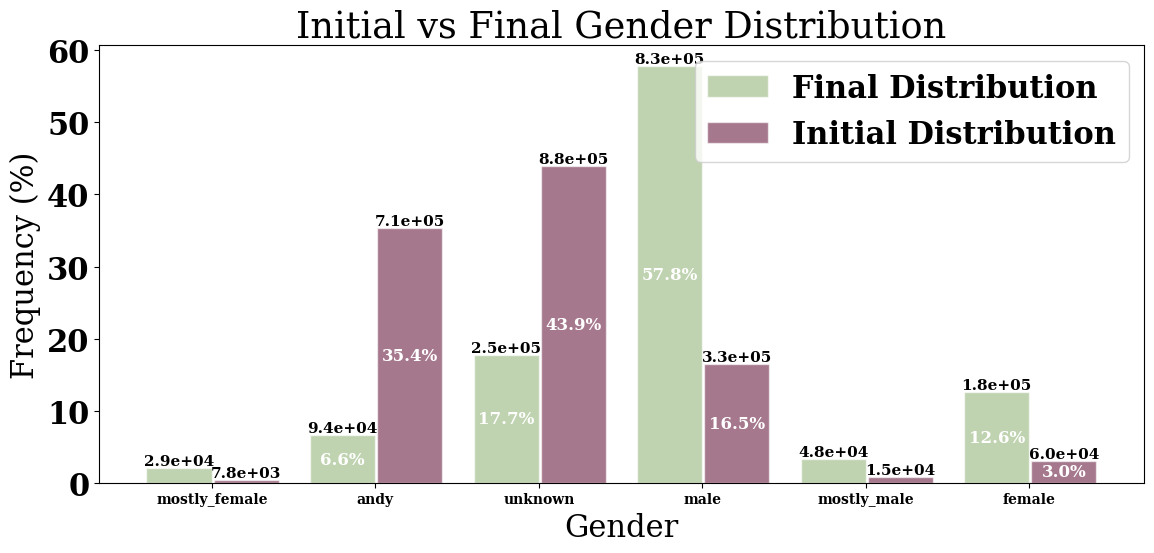

In [572]:
cat_plot_compare(article_author_data_final.predicted_gender, article_author_data_original.predicted_gender, 
                 color1=color9, color2=color13, legend_loc='upper right',
                 title='Initial vs Final Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, font=font, rot=0, xmargins=None, save_name='finalgenderdistcompare', label1='Final Distribution', label2='Initial Distribution')


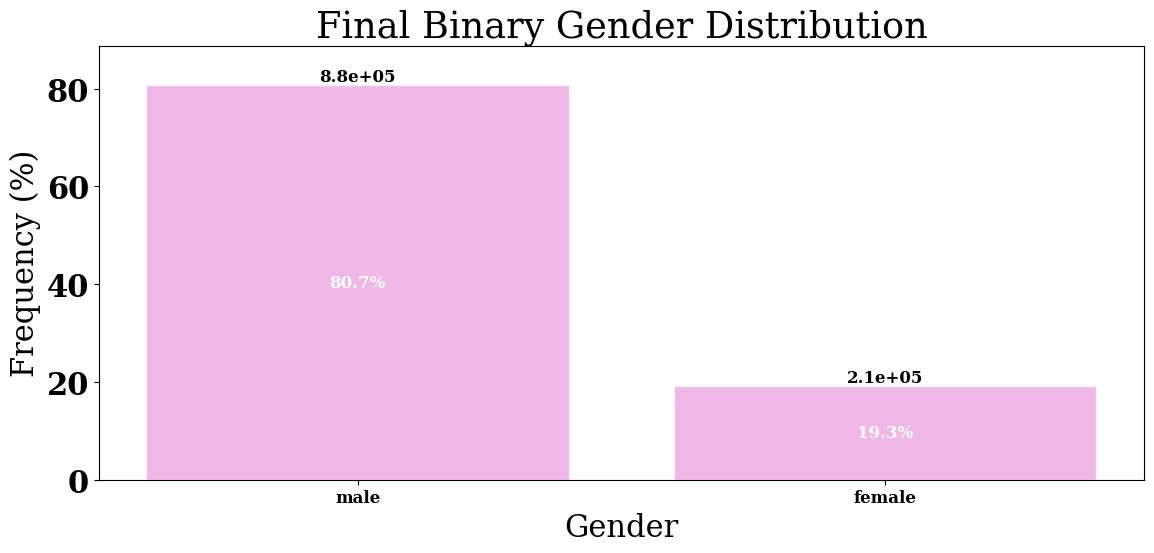

In [19]:
cat_plot(article_author_data_final.binary_gender, title='Final Binary Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, rot=0, ymargins=0.1, save_name='finalbinarygenderdist')


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

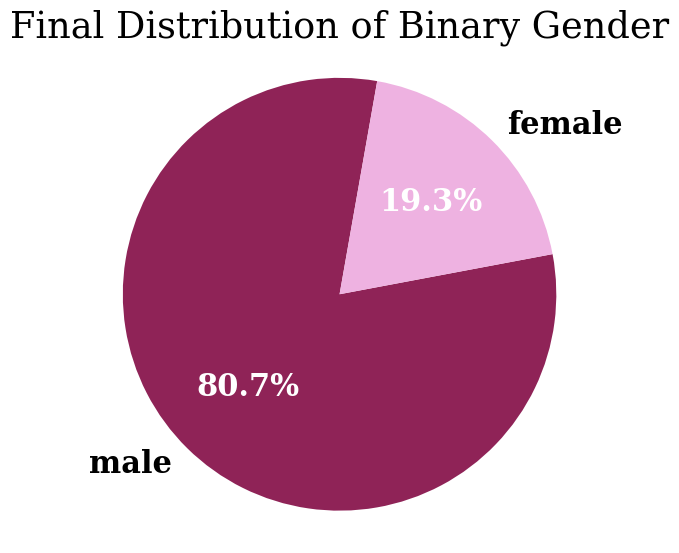

In [69]:
plot_pie_chart(article_author_data_final, 'binary_gender', title='Final Distribution of Binary Gender', color1=color14, color2=color1, save_name='binarygenderpie')


## Sanity Checks 

In [74]:
article_author_data_original.predicted_gender.value_counts(normalize=True)*100

predicted_gender
unknown          43.937577
andy             35.364931
male             16.541176
female            3.014976
mostly_male       0.753794
mostly_female     0.387546
Name: proportion, dtype: float64

In [75]:
article_author_data_final.predicted_gender.value_counts(normalize=True)*100

predicted_gender
male             57.800192
unknown          17.706174
female           12.558805
andy              6.566721
mostly_male       3.346693
mostly_female     2.021415
Name: proportion, dtype: float64

In [ ]:
#Ratio af unknown+andy to gender should be flad ​

In [80]:
non_gender_original=article_author_data_original[article_author_data_original.predicted_gender.isin(['andy', 'unknown'])]
gender_original=article_author_data_original[~article_author_data_original.predicted_gender.isin(['andy', 'unknown'])]

In [93]:
female_original = article_author_data_original[article_author_data_original.predicted_gender.isin(['female', 'mostly_female'])]
male_original = article_author_data_original[article_author_data_original.predicted_gender.isin(['male', 'mostly_male'])]

In [81]:
non_gender_final=article_author_data_final[article_author_data_final.predicted_gender.isin(['andy', 'unknown'])]
gender_final=article_author_data_final[~article_author_data_final.predicted_gender.isin(['andy', 'unknown'])]

In [94]:
female_final = article_author_data_final[article_author_data_final.predicted_gender.isin(['female', 'mostly_female'])]
male_final = article_author_data_final[article_author_data_final.predicted_gender.isin(['male', 'mostly_male'])]

In [95]:
len(non_gender_original)/len(non_gender_final)

4.560772035145828

In [101]:
len(non_gender_original)/len(gender_original)

3.83150325597573

In [96]:
len(gender_original)/len(gender_final)

0.38153938027774426

In [97]:
len(female_original)/len(female_final)

0.32576907060563565

In [98]:
len(male_original)/len(male_final)

0.3948375786655223

In [102]:
len(non_gender_final)/len(gender_final)

0.32053112204508527

In [110]:
#this should be equal to this
#len(male_original)/len(female_original)=len(male_final)/len(female_final)

In [111]:
len(male_original)/len(female_original)

5.082985600940347

In [112]:
len(male_final)/len(female_final)

4.193824459963335

In [104]:
#this should be equal to this 
#len(non_gender_original)/len(gender_original)=len(non_gender_final)/len(gender_final)

4.193824459963335

In [113]:
len(non_gender_original)/len(gender_original)

3.83150325597573

In [114]:
len(non_gender_final)/len(gender_final)

0.32053112204508527

In [115]:
#create new column with only binary gender so female/male 
article_author_data_original['binary_gender']=article_author_data_original['predicted_gender']
article_author_data_original['binary_gender']=article_author_data_original['binary_gender'].replace({'mostly_male': 'male'})
article_author_data_original['binary_gender']=article_author_data_original['binary_gender'].replace({'mostly_female': 'female'})
# set unknown and andy as nan
article_author_data_original['binary_gender'].replace('unknown', np.nan, inplace=True)
article_author_data_original['binary_gender'].replace('andy', np.nan, inplace=True)



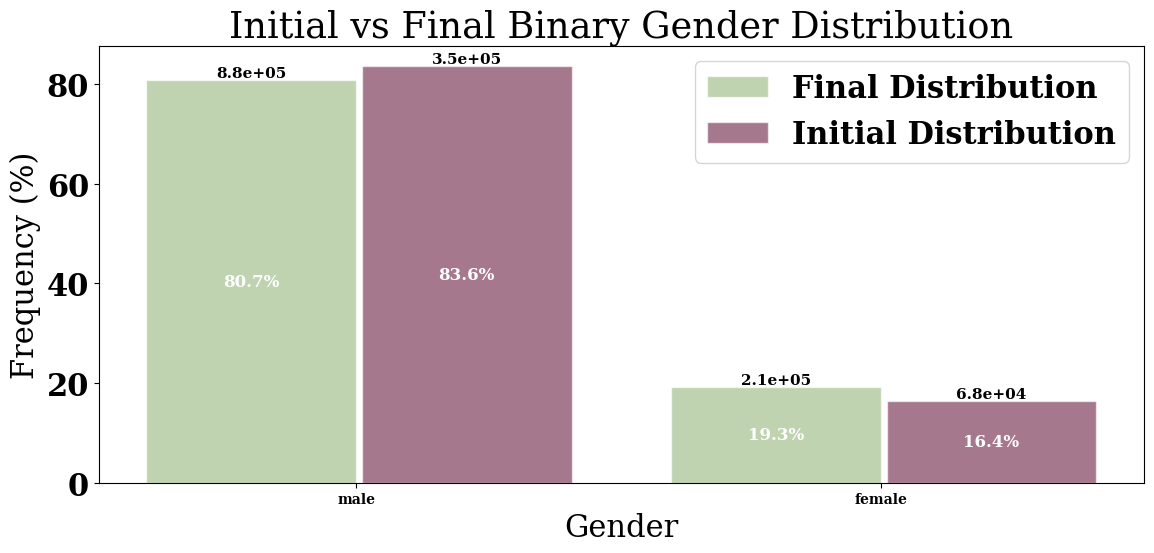

In [126]:
cat_plot_compare(article_author_data_final.binary_gender, article_author_data_original.binary_gender, 
                 color1=color9, color2=color13, legend_loc='upper right',
                 title='Initial vs Final Binary Gender Distribution', xlabel='Gender', ylabel='Frequency (%)', norm=True, multiply=100, font=font, rot=0, xmargins=None, save_name='binarygenderdistcompare', label1='Final Distribution', label2='Initial Distribution')


In [127]:
#hypothesis test: the number of females are the same before and after update 

In [130]:
import pandas as pd
from scipy.stats import chi2_contingency

# Count the number of females and males in each dataframe
count_original = article_author_data_original['binary_gender'].value_counts()
count_final = article_author_data_final['binary_gender'].value_counts()

# Create a contingency table
observed = pd.DataFrame({'original': count_original, 'final': count_final})

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
print("Observed frequencies:\n", observed)


Chi-square statistic: 1575.6004902179639
p-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[337514.22747542 884611.77252458]
 [ 76493.77252458 200487.22747542]]
Observed frequencies:
                original   final
binary_gender                  
male             345948  876178
female            68060  208921


# Distributions

In [3]:
len(article_author_data_final.binary_gender.dropna())

1085099

In [19]:
article_author_data_final=article_author_data_final[~article_author_data_final.binary_gender.isna()]

In [143]:
len(article_author_data_final)

1085099

In [142]:
article_author_data_final.columns

Index(['article_id', 'doi', 'publication_year', 'publication_date', 'title',
       'cited_by_count', 'grants', 'abstract', 'journal_id', 'journal_name',
       'total_author_counts', 'author_position', 'author_countries',
       'is_corresponding', 'raw_affiliation_string', 'raw_author_name',
       'author.display_name', 'author_id', 'institution_country_code',
       'institution_name', 'institution_id', 'institution_type',
       'selected_full_name', 'extracted_first_name', 'country_name',
       'author_country_name', 'author_country_name_api', 'predicted_gender',
       'author_first_country', 'Unnamed: 0', 'name_gender_api',
       'gender_gender_api', 'binary_gender'],
      dtype='object')

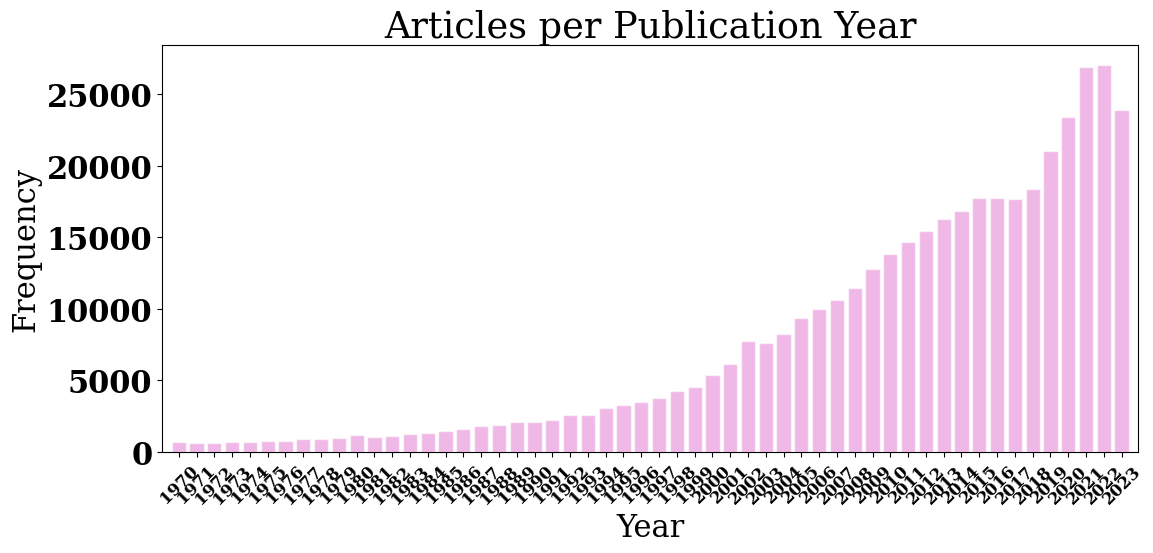

In [163]:
cat_plot(article_author_data_final.drop_duplicates(subset=['article_id'], keep='first').publication_year, title='Articles per Publication Year', xlabel='Year', ylabel='Frequency', xmargins=0.01, norm=False, multiply=1, rot=45, save_name='articlesperyear')


In [145]:
#calculate gender dist per year 
gender_year_counts = article_author_data_final.groupby(['publication_year', 'binary_gender']).size().unstack(fill_value=0).reset_index()


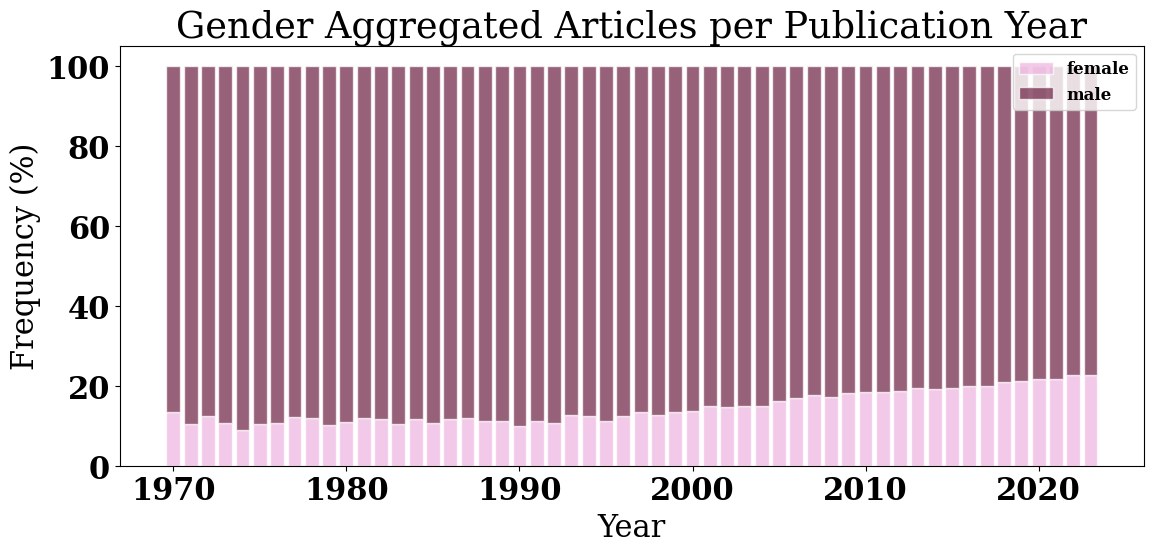

In [164]:
#plot in stacked bar plot
stacked_bar_plot_normalized(gender_year_counts, 'publication_year', gender_year_counts.columns.difference(['publication_year']), 
                            color_list=[color1, color13],
                            title='Gender Aggregated Articles per Publication Year', xlabel='Year', ylabel='Frequency (%)', save_name='genderarticlesperyear')


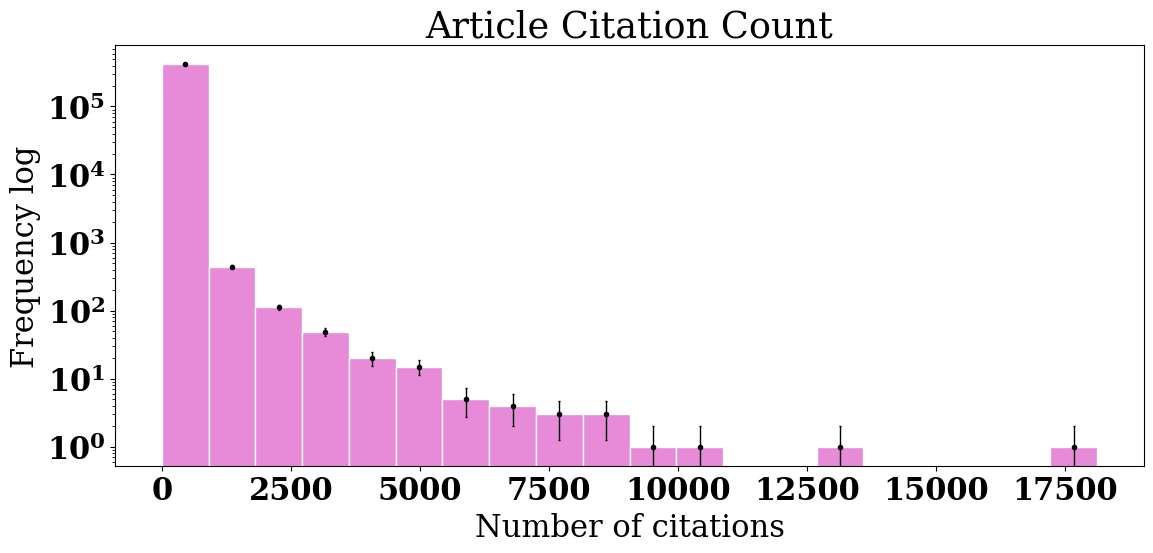

In [188]:
hist_plot([article_author_data_final.drop_duplicates(subset=['article_id'], keep='first').cited_by_count], color_list=[color2], N_bins=None, log=True, title='Article Citation Count', xlabel='Number of citations', ylabel='Frequency log', save_name='citationcount', disp_legend=False)


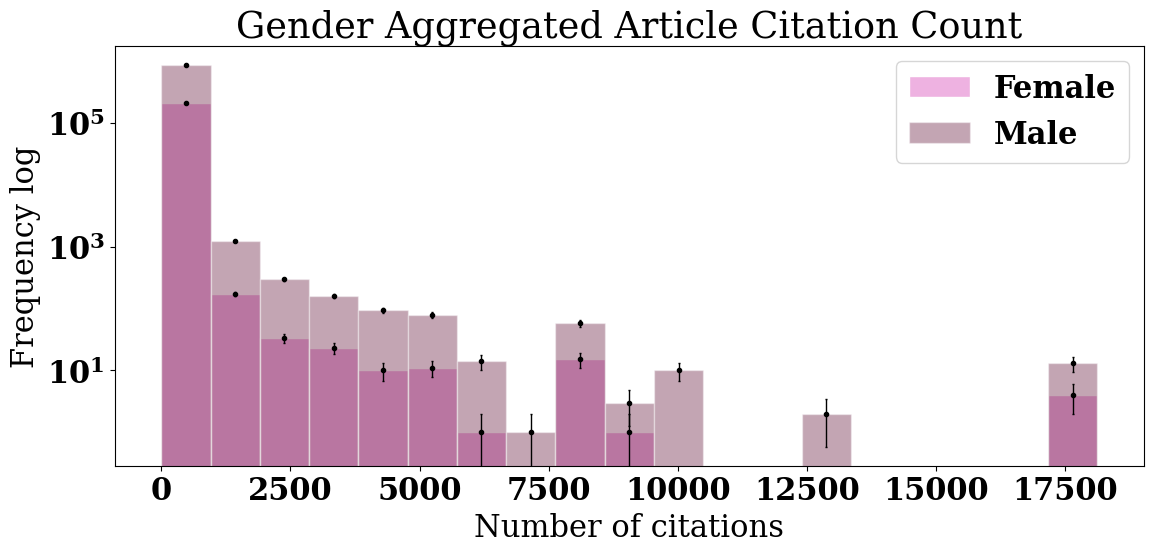

In [189]:
hist_plot([article_author_data_final[article_author_data_final.binary_gender=='female'].cited_by_count, 
           article_author_data_final[article_author_data_final.binary_gender=='male'].cited_by_count], 
          color_list=[color1, color13], alpha_list=[1, 0.4],
          N_bins=None, log=True, title='Gender Aggregated Article Citation Count', xlabel='Number of citations', ylabel='Frequency log', save_name='gendercitationcount', legend_labels=['Female', 'Male'], disp_legend=True)


In [14]:
# Replace empty lists with NaN
article_author_data_final['grants'] = article_author_data_final['grants'].apply(lambda x: np.nan if len(x) == 0 else x)
article_author_data_final['grants'][article_author_data_final['grants'].notna()==True]=1 #1 means they have a grant 
article_author_data_final['grants'] = article_author_data_final['grants'].fillna(0) #zero means they don't have a grant 

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_99728/719967849.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
# Define mapping dictionary
category_mapping = {0: 'No', 1: 'Yes'}

# Map categorical variable to numerical values
article_author_data_final['grants'] = article_author_data_final['grants'].map(category_mapping)


In [261]:
article_author_data_final['grants'].value_counts()

grants
No     905003
Yes    180096
Name: count, dtype: int64

<class 'pandas.core.series.Series'>


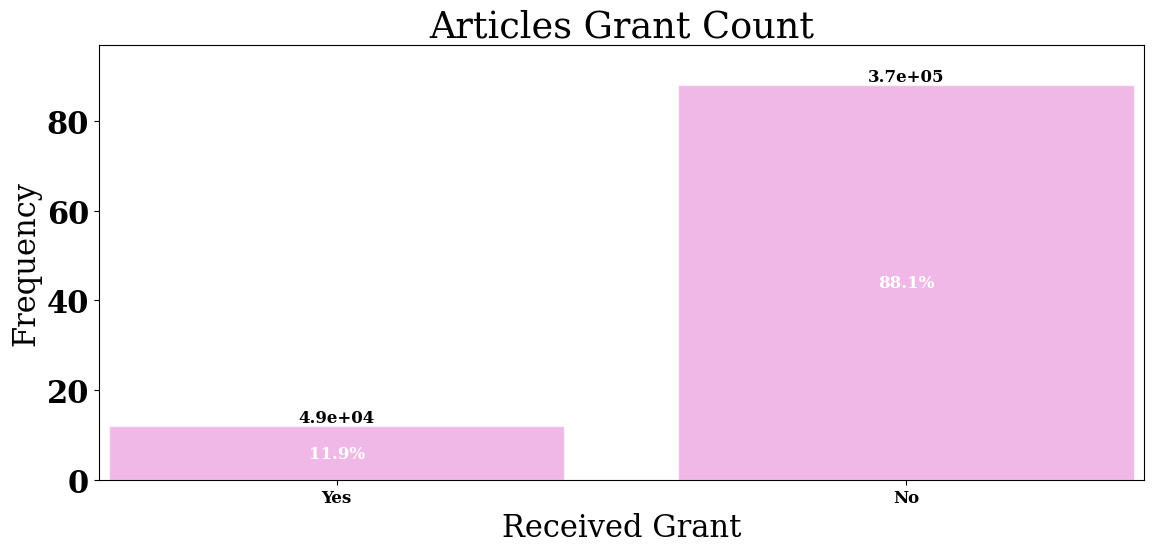

In [284]:
cat_plot_reversed_order(article_author_data_final.drop_duplicates(subset=['article_id'], keep='first').grants, title='Articles Grant Count', xlabel='Received Grant', ylabel='Frequency', xmargins=0.01, ymargins=0.1, norm=True, multiply=100, rot=0, save_name='grant')


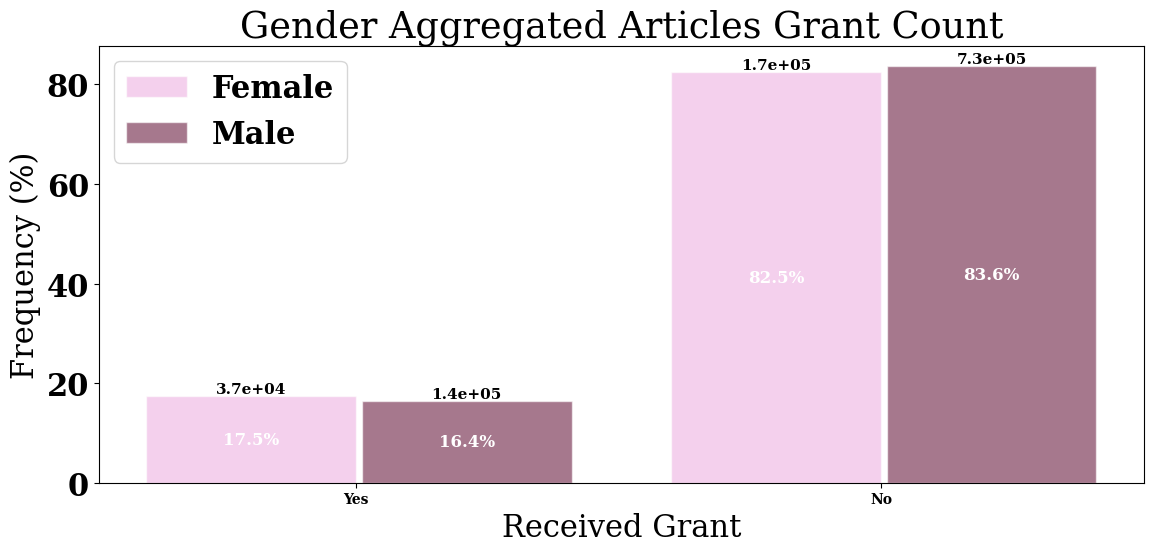

In [265]:
cat_plot_compare(article_author_data_final[article_author_data_final.binary_gender=='female'].grants, 
                 article_author_data_final[article_author_data_final.binary_gender=='male'].grants, 
                 color1=color1, color2=color13, title='Gender Aggregated Articles Grant Count', xlabel='Received Grant', ylabel='Frequency (%)', norm=True, multiply=100, font=None, rot=0, xmargins=None, ymargins=None, save_name='gendergrant', label1='Female', label2='Male', legend_loc='best')


In [294]:
#define short names outside plotting function 
data_cats=article_author_data_final.drop_duplicates(subset=['article_id'], keep='first').journal_name.value_counts().reset_index()[0:20]
data_cats = data_cats.iloc[:, 0]

excluded_words = ['THE', 'AND', 'OF', 'FOR']
#short_names = []

def extract_first_letters(words):
    short_name = ''
    skip_next = False
    
    for word in words:
        if skip_next:
            skip_next = ')' not in word
        elif '(' in word:
            skip_next = ')' not in word
        else:
            short_name += word[0]

    return short_name

for cat in data_cats:
    words = [word.upper() for word in cat.split() if word.upper() not in excluded_words]
    unique_short_name = extract_first_letters(words)
    
    # Check for duplicates and add a unique identifier
    count = short_names.count(unique_short_name)
    if count > 0:
        unique_short_name += str(count + 1)
    
    short_names.append(unique_short_name)

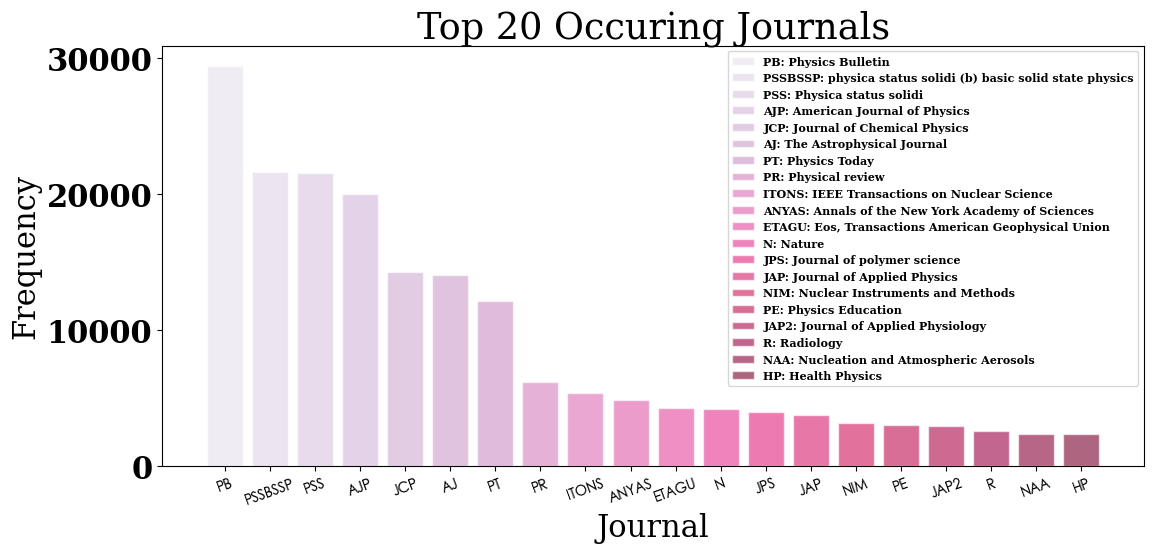

In [295]:
cat_top_plot_short_names(article_author_data_final.drop_duplicates(subset=['article_id'], keep='first').journal_name, top_n=20, title='Top 20 Occuring Journals', xlabel='Journal', ylabel='Frequency', norm=False, multiply=1, font='Heiti TC', rot=20, save_name='journals')


In [304]:
short_names = []

In [316]:
#define short names outside plotting function 
data_cats=article_author_data_final[article_author_data_final.binary_gender=='female'].journal_name.value_counts().reset_index()[0:20]
data_cats = data_cats.iloc[:, 0]

excluded_words = ['THE', 'AND', 'OF', 'FOR']
#short_names = []

def extract_first_letters(words):
    short_name = ''
    skip_next = False
    
    for word in words:
        if skip_next:
            skip_next = ')' not in word
        elif '(' in word:
            skip_next = ')' not in word
        else:
            short_name += word[0]

    return short_name

for cat in data_cats:
    words = [word.upper() for word in cat.split() if word.upper() not in excluded_words]
    unique_short_name = extract_first_letters(words)
    
    # Check for duplicates and add a unique identifier
    count = short_names.count(unique_short_name)
    if count > 0:
        unique_short_name += str(count + 1)
    
    short_names.append(unique_short_name)

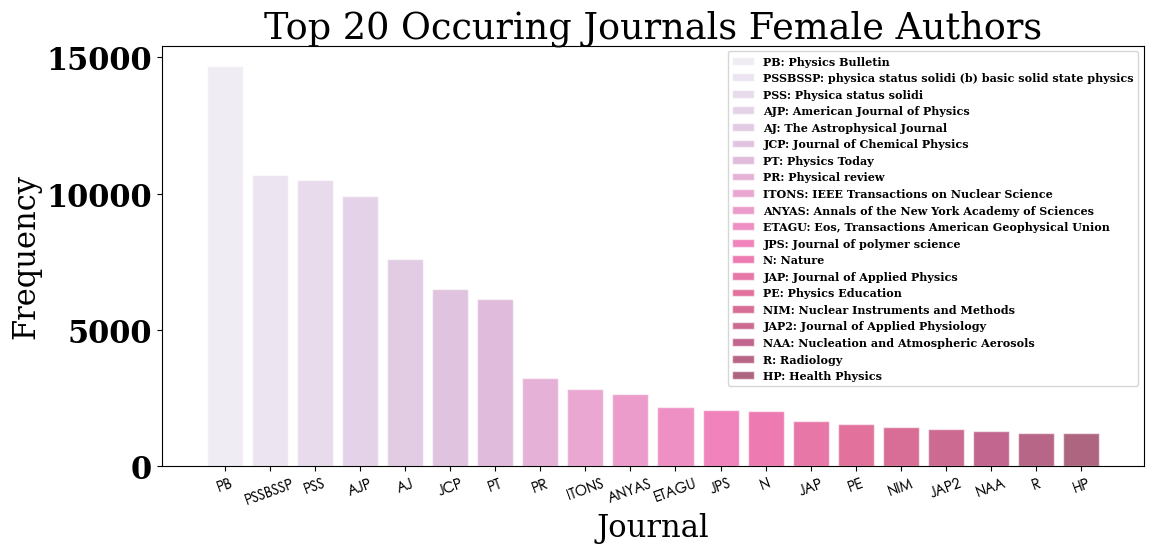

In [320]:
cat_top_plot_short_names(article_author_data_final[article_author_data_final.binary_gender=='female'].journal_name, top_n=20, title='Top 20 Occuring Journals Female Authors', xlabel='Journal', ylabel='Frequency', norm=False, multiply=1, font='Heiti TC', rot=20, save_name='journalsfemale')


In [321]:
short_names = []
#define short names outside plotting function 
data_cats=article_author_data_final[article_author_data_final.binary_gender=='male'].journal_name.value_counts().reset_index()[0:20]
data_cats = data_cats.iloc[:, 0]

excluded_words = ['THE', 'AND', 'OF', 'FOR']


def extract_first_letters(words):
    short_name = ''
    skip_next = False
    
    for word in words:
        if skip_next:
            skip_next = ')' not in word
        elif '(' in word:
            skip_next = ')' not in word
        else:
            short_name += word[0]

    return short_name

for cat in data_cats:
    words = [word.upper() for word in cat.split() if word.upper() not in excluded_words]
    unique_short_name = extract_first_letters(words)
    
    # Check for duplicates and add a unique identifier
    count = short_names.count(unique_short_name)
    if count > 0:
        unique_short_name += str(count + 1)
    
    short_names.append(unique_short_name)

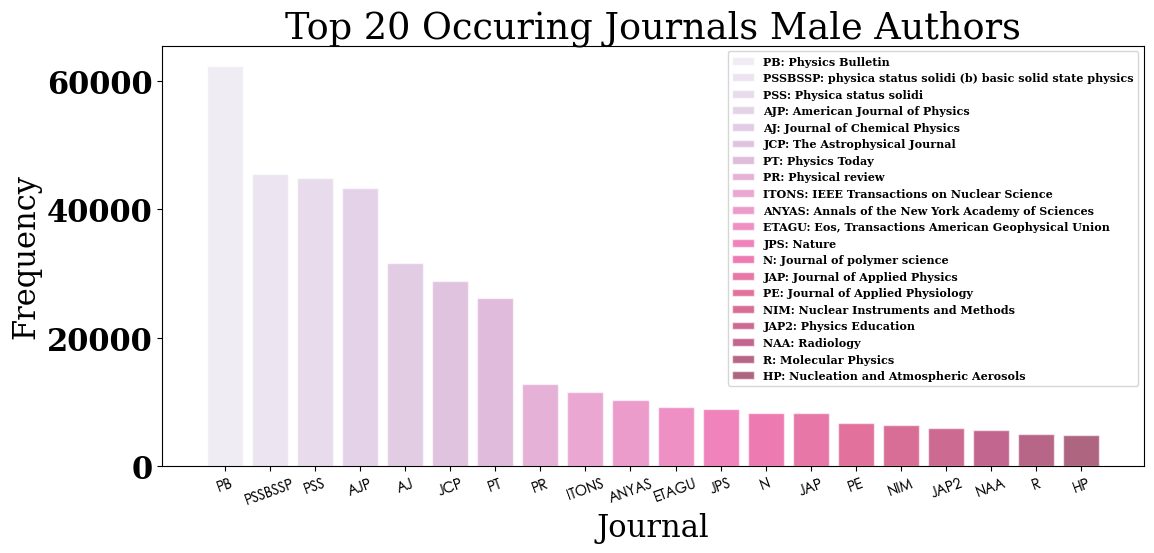

In [322]:
cat_top_plot_short_names(article_author_data_final[article_author_data_final.binary_gender=='male'].journal_name, top_n=20, title='Top 20 Occuring Journals Male Authors', xlabel='Journal', ylabel='Frequency', norm=False, multiply=1, font='Heiti TC', rot=20, save_name='journalsmale')


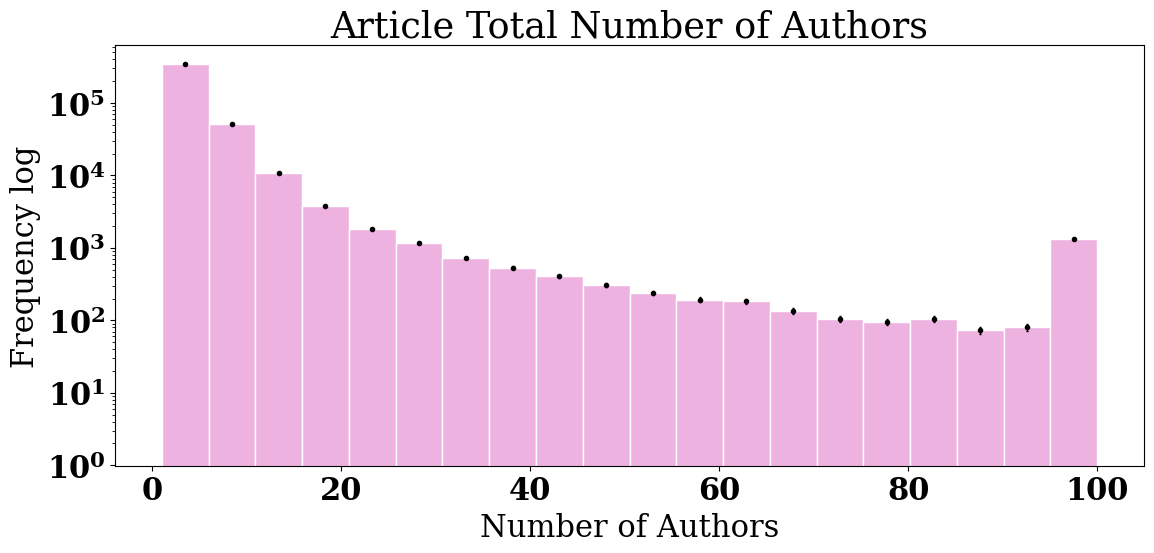

In [324]:
hist_plot([article_author_data_final.drop_duplicates(subset=['article_id'], keep='first').total_author_counts], log=True, title='Article Total Number of Authors', xlabel='Number of Authors', ylabel='Frequency log', save_name='totalauthorcount', disp_legend=False)


In [325]:
binary_gender_article_counts = article_author_data_final.groupby(['article_id', 'binary_gender']).size().unstack(fill_value=0).reset_index()


In [326]:
binary_gender_article_counts['total']=binary_gender_article_counts['female']+binary_gender_article_counts['male']

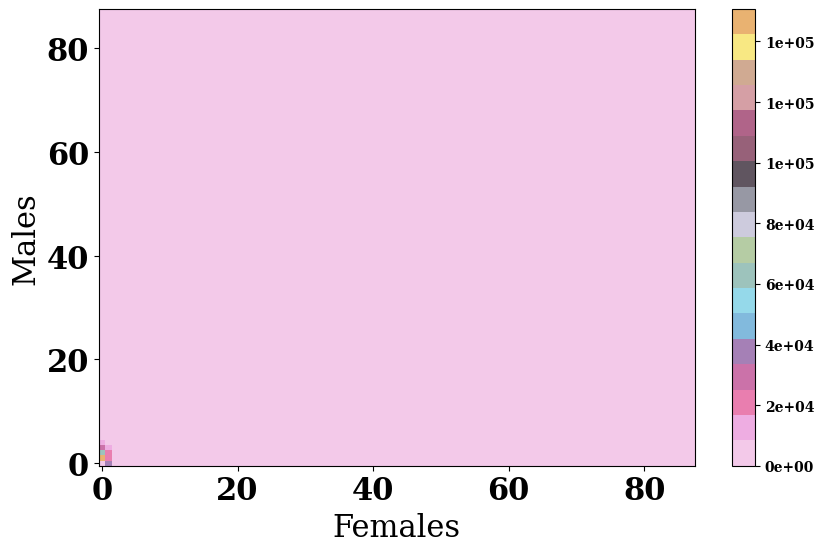

In [329]:
hist2D(binary_gender_article_counts['female'], binary_gender_article_counts['male'], xlabel='Females', ylabel='Males', title=None, save_name='2dhistbasic')


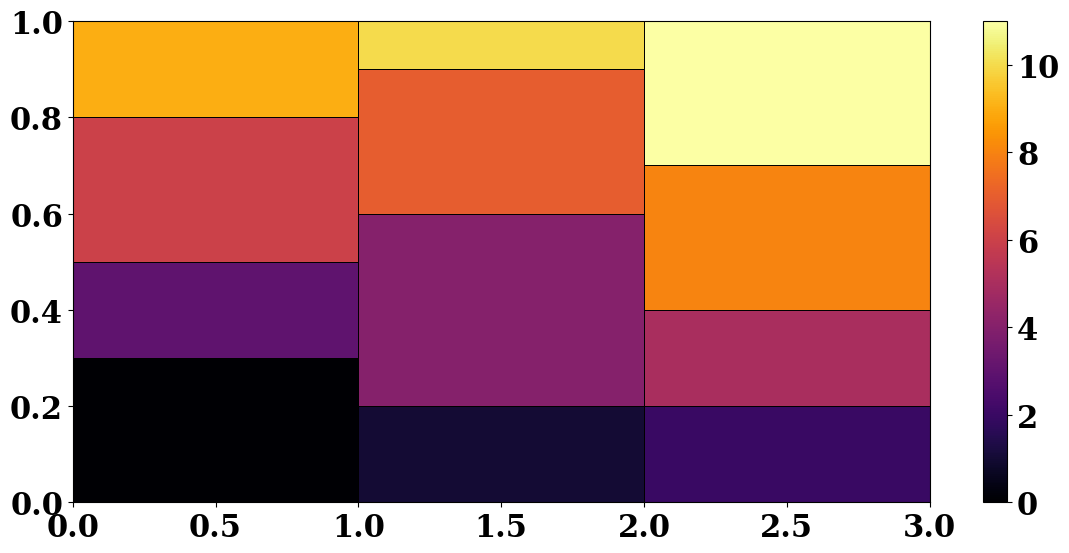

In [407]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

# Starting data: A grid, regular in x-direction and irregular in y direction.
x_edges = np.array([0,1,2,3])
y_edges = np.array([[0.,0.,0.],
                    [.3,.2,.2],
                    [.5,.6,.4],
                    [.8,.9,.7],
                    [1.,1.,1.]])

######## Grid creation ################
#y_edges = np.concatenate((y_edges, np.zeros(len(y_edges))))
s = np.array(y_edges.shape)
# make x_edges 2D as well.
x_edges = np.tile(x_edges, s[0]-1).reshape((s[0]-1, s[1]+1))

# you may also have an array of values. 
# This should be of shape one less than the edges and flattened.
values = np.arange(np.prod(s+np.array((-1,0))))

# Produce a vertices array of the edges of rectangles that form each pixel.
x = np.c_[x_edges[:,:-1].flatten(), x_edges[:,:-1].flatten(),
          x_edges[:,1: ].flatten(), x_edges[:,1: ].flatten()]
y = np.c_[y_edges[:-1,:].flatten(), y_edges[1: ,:].flatten(),
          y_edges[1: ,:].flatten(), y_edges[:-1,:].flatten()]
xy = np.stack((x,y), axis=2)

# Create collection of rectangles.
pc = PolyCollection(xy, closed=True, edgecolors="k", linewidth=0.72, cmap="inferno")
pc.set_array(values)

######## Plotting ################
fig, ax = plt.subplots()
ax.add_collection(pc)
fig.colorbar(pc, ax=ax)

ax.margins(0)
ax.autoscale()
plt.show()

In [409]:
binary_gender_article_counts

binary_gender                        article_id  female  male  total
0              https://openalex.org/W1000115190       1     0      1
1               https://openalex.org/W100020456       0     1      1
2              https://openalex.org/W1000284014       2     1      3
3               https://openalex.org/W100029601       0     1      1
4              https://openalex.org/W1000374241       1     3      4
...                                         ...     ...   ...    ...
414719          https://openalex.org/W999310457       0     1      1
414720          https://openalex.org/W999325625       0     1      1
414721           https://openalex.org/W99934133       0     2      2
414722           https://openalex.org/W99938356       1     2      3
414723           https://openalex.org/W99967155       0     1      1

[414724 rows x 4 columns]

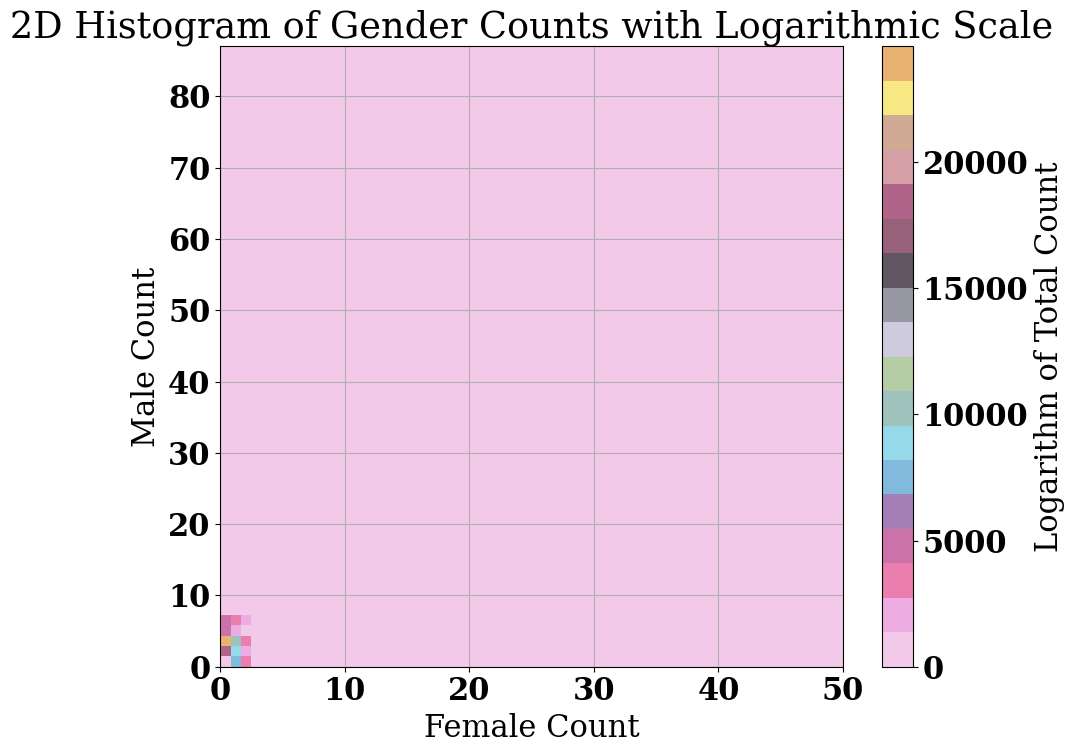

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Logarithmically transform the total count
binary_gender_article_counts['log_total'] = np.log10(binary_gender_article_counts['total'])

# Plot the 2D histogram with logarithmically transformed z-axis
plt.figure(figsize=(10, 8))
plt.hist2d(binary_gender_article_counts['female'], binary_gender_article_counts['male'], bins=60, cmap=custom_cmap, alpha=0.7, weights=binary_gender_article_counts['log_total'])
plt.colorbar(label='Logarithm of Total Count')
plt.xlabel('Female Count')
plt.ylabel('Male Count')
plt.title('2D Histogram of Gender Counts with Logarithmic Scale')
plt.grid(True)
plt.show()


In [410]:
import plotly.express as px

fig = px.density_heatmap(binary_gender_article_counts, x="female", y="male", z="total", text_auto=True, marginal_x="histogram", marginal_y="histogram")
fig.show()

In [330]:
binary_gender_article_counts_window=binary_gender_article_counts.copy()

In [331]:
binary_gender_article_counts_window['total'][binary_gender_article_counts_window['total']>=6]=6

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_99728/1954384514.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [332]:
#we also need to set the max authors to be 7+ 
binary_gender_article_counts_window['male'][binary_gender_article_counts_window['male']>=6]=6
binary_gender_article_counts_window['female'][binary_gender_article_counts_window['female']>=6]=6

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_99728/1249579007.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_99728/1249579007.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [398]:


def hist2D(x_data, y_data, bins=None, xlabel=None, ylabel=None, title=None, xlim_low=None, xlim_up=None, ylim_low=None, ylim_up=None, hide_ticks=False, save_name=None):
    # Calculate max count
    max_count = max(x_data.max(), y_data.max())
        
    # Plot 2D histogram
    fig, ax = plt.subplots(figsize=(9,6))
    if bins:
        plt.hist2d(x_data, y_data, cmap=custom_cmap, alpha=0.7, bins=bins, density=True)
    else: 
        plt.hist2d(x_data, y_data, cmap=custom_cmap, alpha=0.7, bins=[np.arange(-0.5, max_count + 1.5, 1), np.arange(-0.5, max_count + 1.5, 1)], density=True)
    
    cbar = plt.colorbar()
    #cbar.formatter.set_powerlimits((0, 0))
    # Set tick labels on colorbar using scientific notation
    cbar.ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(format_tick))
    cbar.ax.tick_params(labelsize=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.xlim(xlim_low, xlim_up)
    plt.ylim(ylim_low, ylim_up)


    if hide_ticks:
        plt.setp(ax, xticks=[], yticks=[])

    save_name = save_name
    save_path = f'Plots/{date.today()}/{save_name}'
    plt.savefig(save_path)
    
    plt.show()


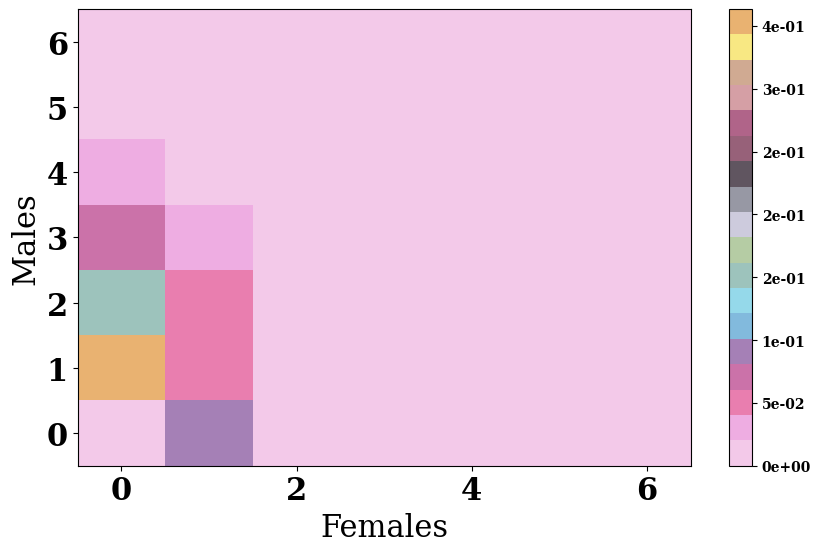

In [399]:
hist2D(binary_gender_article_counts_window['female'], binary_gender_article_counts_window['male'], xlabel='Females', ylabel='Males', title=None, save_name='2dhistbasicwindow6+')


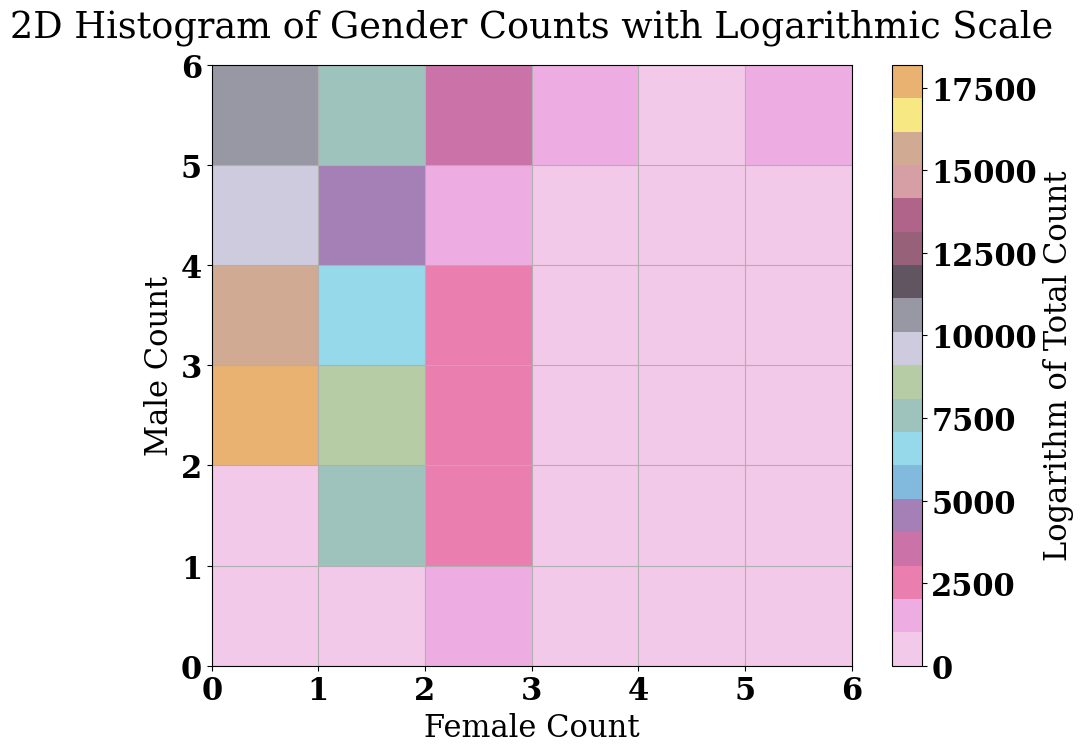

In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Logarithmically transform the total count
binary_gender_article_counts_window['log_total'] = np.log10(binary_gender_article_counts_window['total'])

# Plot the 2D histogram with logarithmically transformed z-axis
plt.figure(figsize=(10, 8))
plt.hist2d(binary_gender_article_counts_window['female'], binary_gender_article_counts_window['male'], bins=6, cmap=custom_cmap, alpha=0.7, weights=binary_gender_article_counts_window['log_total'])
plt.colorbar(label='Logarithm of Total Count')
plt.xlabel('Female Count')
plt.ylabel('Male Count')
plt.title('2D Histogram of Gender Counts with Logarithmic Scale', pad=20)
plt.grid(True)
plt.show()


In [485]:
max(binary_gender_article_counts_window['female'].value_counts())

273544

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_99728/3459843006.py:8: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_99728/3459843006.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_99728/3459843006.py:53: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



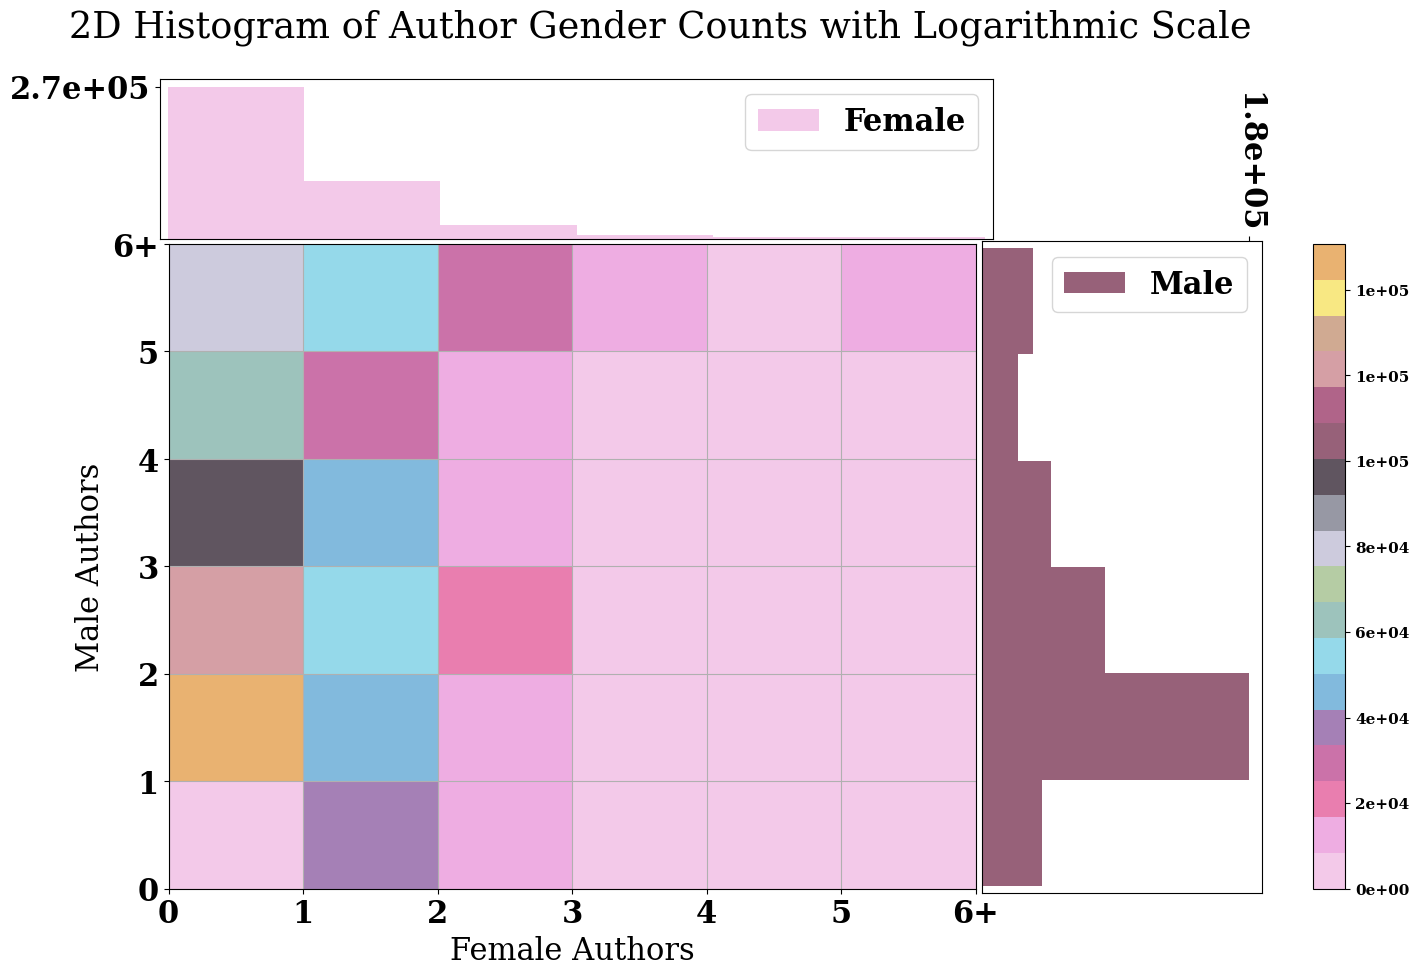

In [745]:

# Assuming df is your DataFrame
# Logarithmically transform the total count
binary_gender_article_counts_window['log_total'] = np.log10(binary_gender_article_counts_window['total'])

# Plot the 2D histogram with histograms on the margins
fig, ax = plt.subplots(figsize=(14, 8))
hist = ax.hist2d(binary_gender_article_counts_window['female'], binary_gender_article_counts_window['male'], bins=6, cmap=custom_cmap, alpha=0.7, weights=binary_gender_article_counts_window['total'])
ax.set_yticklabels(['0', '1', '2', '3', '4', '5', '6+'])
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6+'])


plt.grid(True)

# Add histograms on the margins
ax_histx = plt.axes([0.084, 0.95, 0.595, 0.2]) #female
ax_histy = plt.axes([0.671, 0.133, 0.2, 0.814]) #male

ax_histx.hist(binary_gender_article_counts_window['female'], bins=6, color=color1, alpha=0.7, label='Female')
ax_histx.margins(x=0.01)
ax_histy.hist(binary_gender_article_counts_window['male'], bins=6, orientation='horizontal', color=color13, alpha=0.7, label='Male')
ax_histy.margins(y=0.01)
ax_histx.legend()
ax_histy.legend()


#set labels
#female
ax_histx.tick_params(axis="x", labelbottom=False)
plt.setp(ax_histx, xticks=[])
max_value_female = max(binary_gender_article_counts_window['female'].value_counts())
ax_histx.set_yticks([max_value_female])
ax_histx.set_yticklabels([f'{max_value_female:.1e}'])

#male
ax_histy.tick_params(axis="x", which="both", bottom=False, top=True, direction="out", labelbottom=False, labeltop=True, rotation=270)
plt.setp(ax_histy, yticks=[])
max_value_male = max(binary_gender_article_counts_window['male'].value_counts())
ax_histy.set_xticks([max_value_male])
ax_histy.set_xticklabels([f'{max_value_male:.1e}'])


cbar = plt.colorbar(hist[3], ax=ax, pad=0.28, fraction=0.05, aspect=20)
cbar.ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(format_tick))
cbar.ax.tick_params(labelsize=11)

ax.set_xlabel('Female Authors')
ax.set_ylabel('Male Authors')
ax_histx.set_title('2D Histogram of Author Gender Counts with Logarithmic Scale', x=0.6, pad=30)

save_name = 'gendercollaborations6+'
save_path = f'Plots/{date.today()}/{save_name}'
plt.savefig(save_path)

plt.show()


In [636]:
import plotly.express as px

# Assuming df is your DataFrame
# Logarithmically transform the total count


fig = px.density_heatmap(binary_gender_article_counts_window, x="female", y="male", z="log_total", marginal_x="histogram", marginal_y="histogram", nbinsx=8, nbinsy=8, color_continuous_scale=custom_colors)
fig.update_layout(coloraxis_colorbar=dict(title='Logarithm of Total Count'))
fig.update_traces(opacity=0.7)


fig.show()


In [ ]:

def hist2D_author_gender_counts(article_author_data_final, total_authors_range, save_name=None):
    for total_authors in range(2, total_authors_range + 1):
        # Filter data for the specified total number of authors
        article_author_data_filtered = article_author_data_final[article_author_data_final['total_author_counts'] == total_authors].copy()
        
        # Remove author duplicates
        article_author_data_filtered.drop_duplicates(subset='author_id', keep='first', inplace=True)
        
        # Count the number of male/female authors per article
        binary_gender_article_counts = article_author_data_filtered.groupby(['article_id', 'binary_gender']).size().unstack(fill_value=0).reset_index()
        
        # Calculate max count
        max_count = max(binary_gender_article_counts['female'].max(), binary_gender_article_counts['male'].max())
        
        # Plot 2D histogram
        plt.figure(figsize=(9, 6))
        plt.hist2d(binary_gender_article_counts['female'], binary_gender_article_counts['male'], cmap=custom_cmap, alpha=0.7, bins=[np.arange(-0.5, max_count + 1.5, 1), np.arange(-0.5, max_count + 1.5, 1)])
        plt.xticks(np.arange(0, max_count + 1, 1))
        plt.yticks(np.arange(0, max_count + 1, 1))
        plt.title(f'Collaborations Between Male/Female Authors for {total_authors} Total Authors', pad=20)
        plt.xlabel('Female Authors')
        plt.ylabel('Male Authors')
        plt.colorbar(label='Frequency')

        save_name = save_name
        save_path = f'Plots/{date.today()}/{save_name}{total_authors}'
        plt.savefig(save_path)
        
        plt.show()



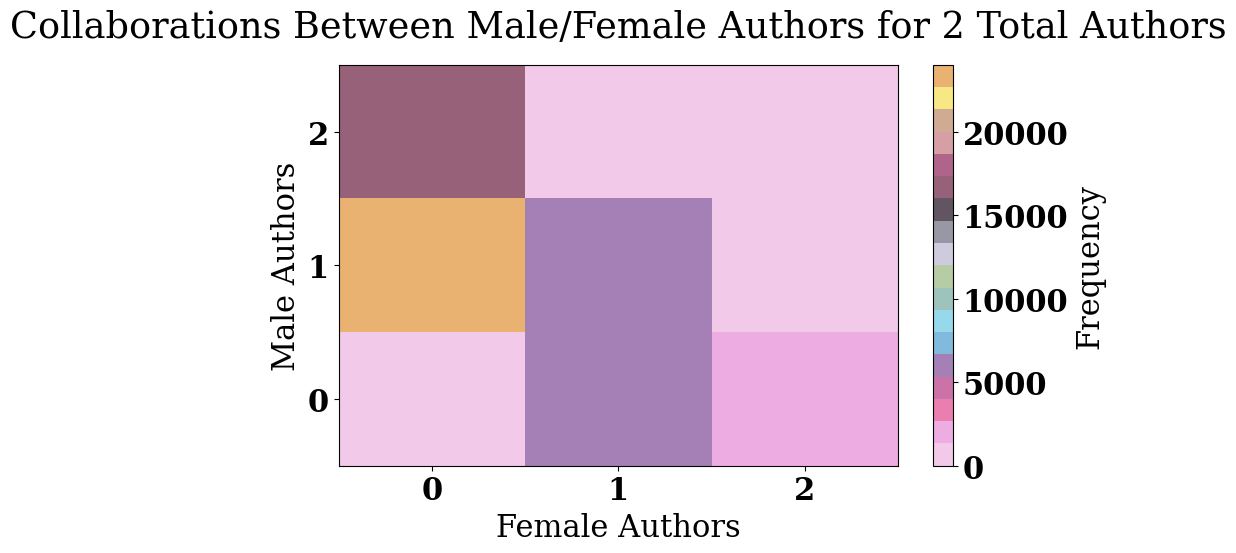

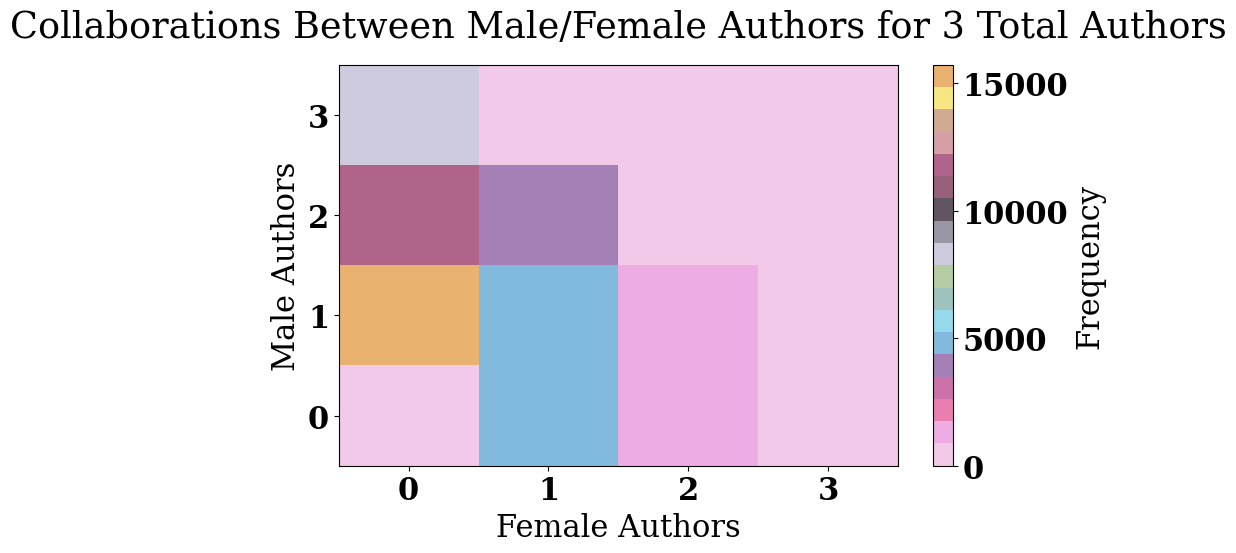

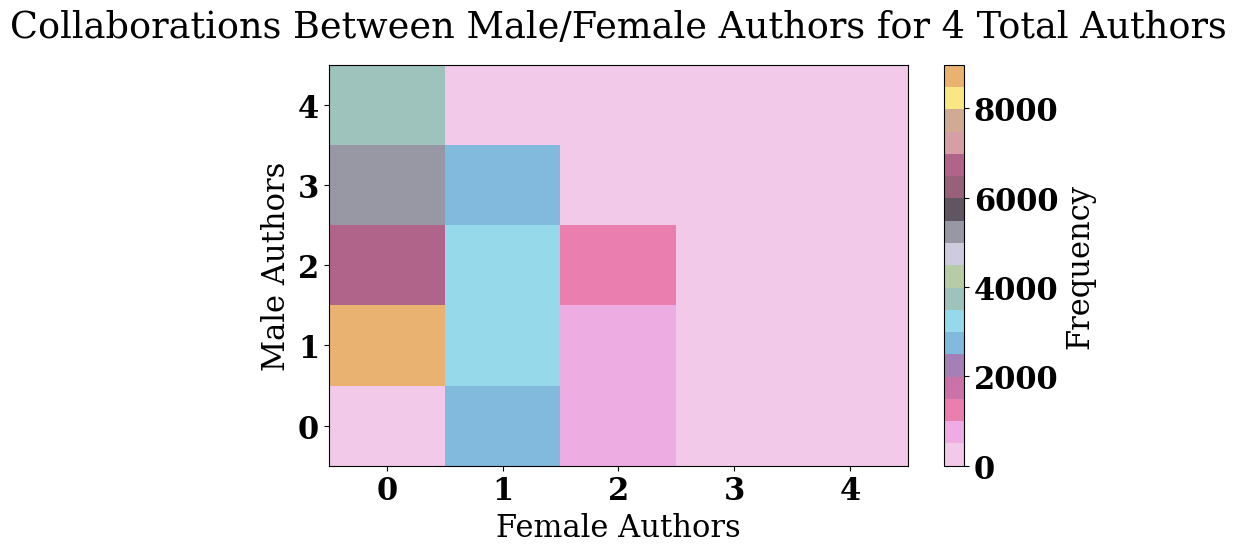

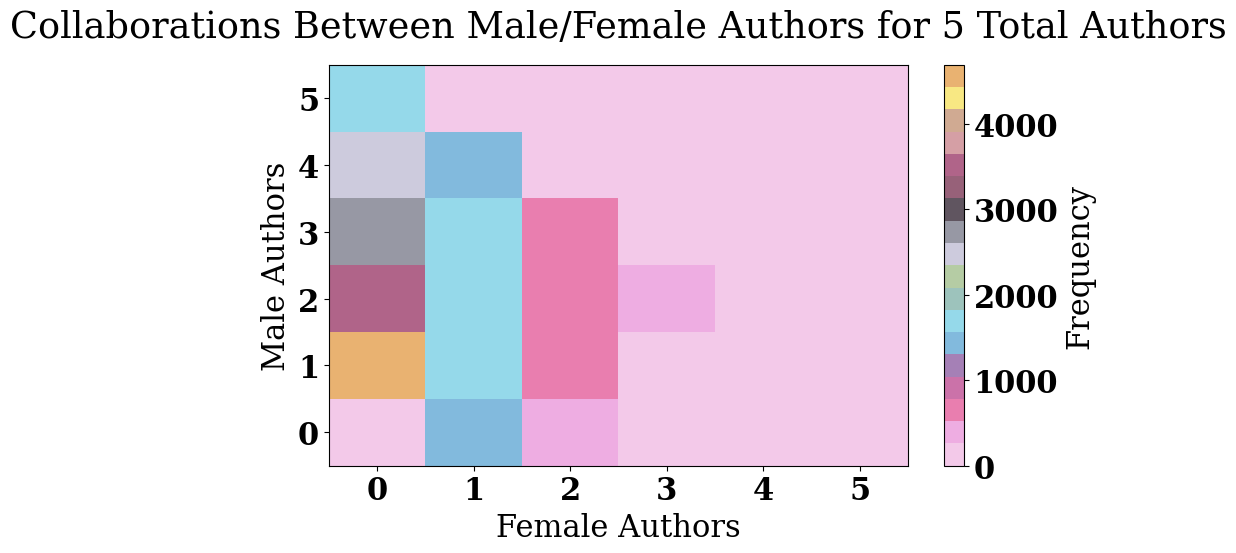

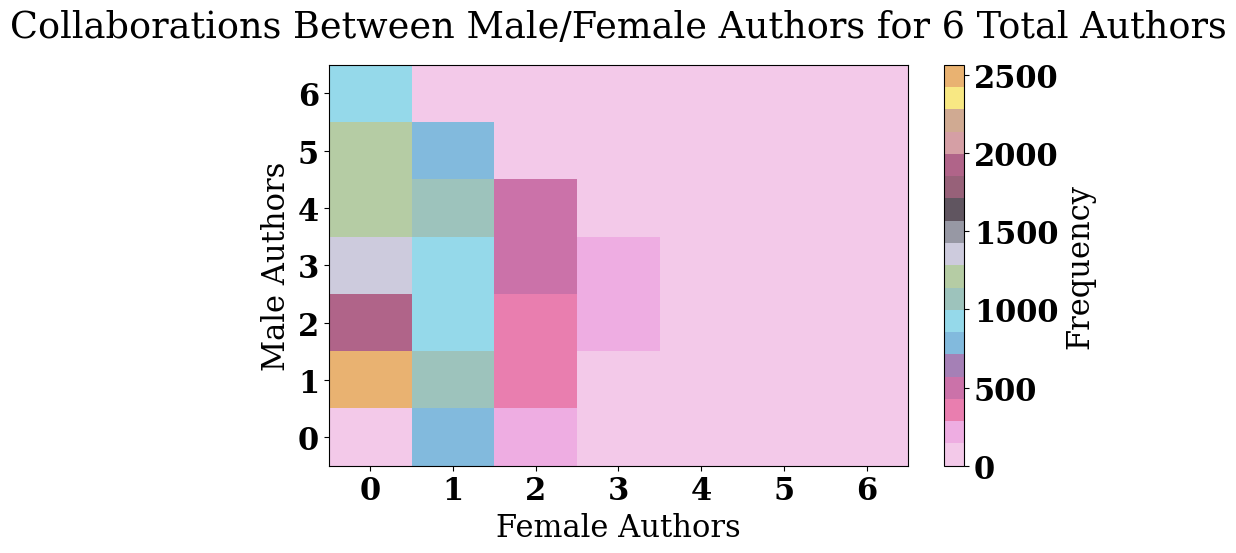

In [334]:
hist2D_author_gender_counts(article_author_data_final, total_authors_range=6)

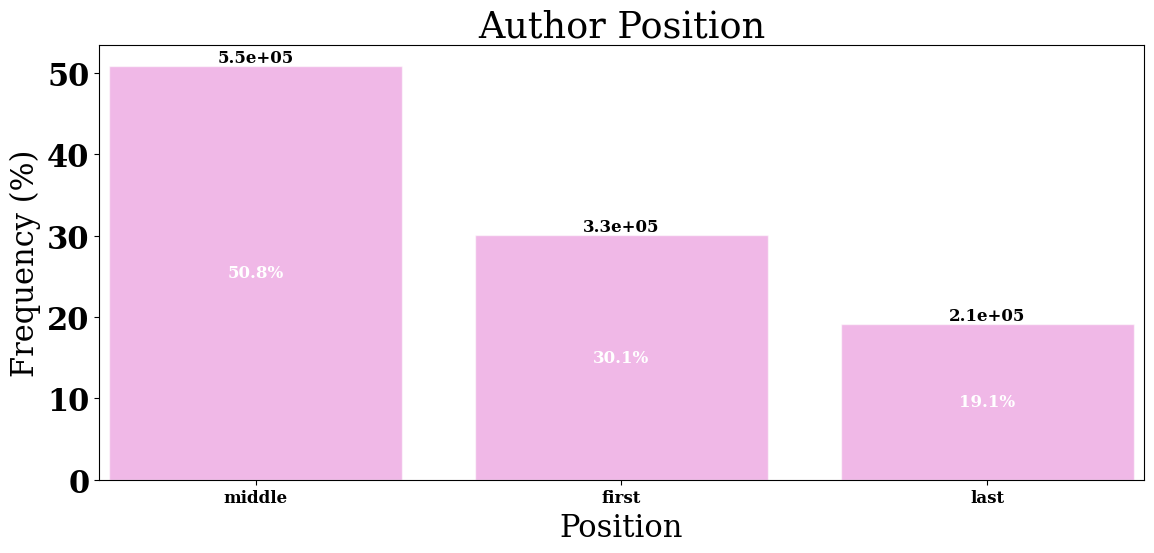

In [749]:
cat_plot(article_author_data_final.author_position, title='Author Position', xlabel='Position', ylabel='Frequency (%)', xmargins=0.01, norm=True, multiply=100, rot=0, save_name='authorposition')

#figure out how to set the order for these

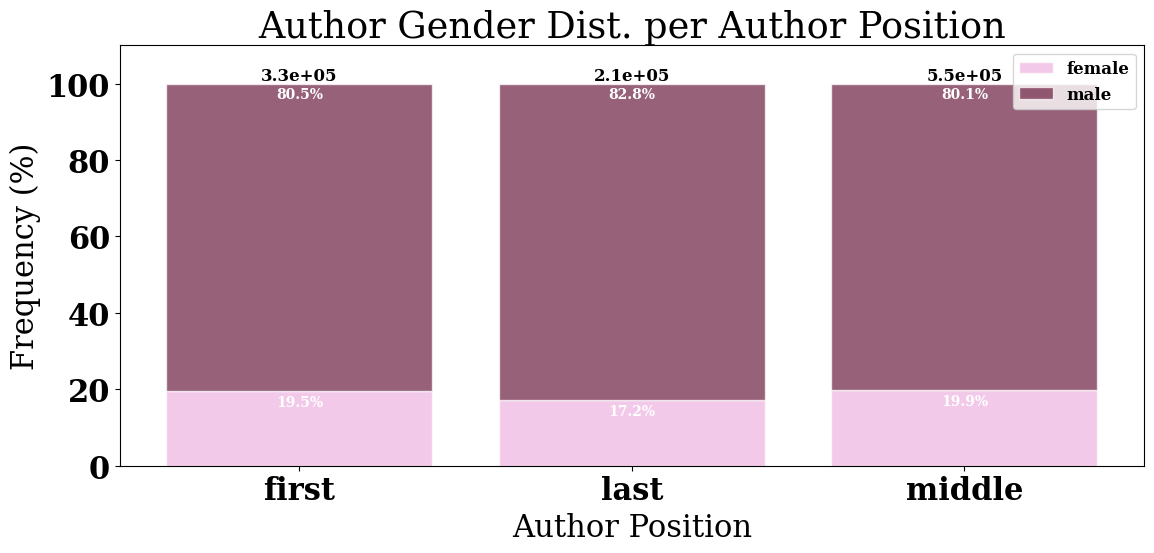

In [758]:
gender_position_counts=article_author_data_final.groupby(['author_position', 'binary_gender']).size().unstack(fill_value=0).reset_index()

stacked_bar_plot_normalized(gender_position_counts, 'author_position', gender_position_counts.columns.difference(['author_position']), 
                            color_list=[color1, color13],
                            title='Author Gender Dist. per Author Position', xlabel='Author Position', ylabel='Frequency (%)', ymargins=0.1, save_name='genderauthorposition')

#figure out how to set the order for these

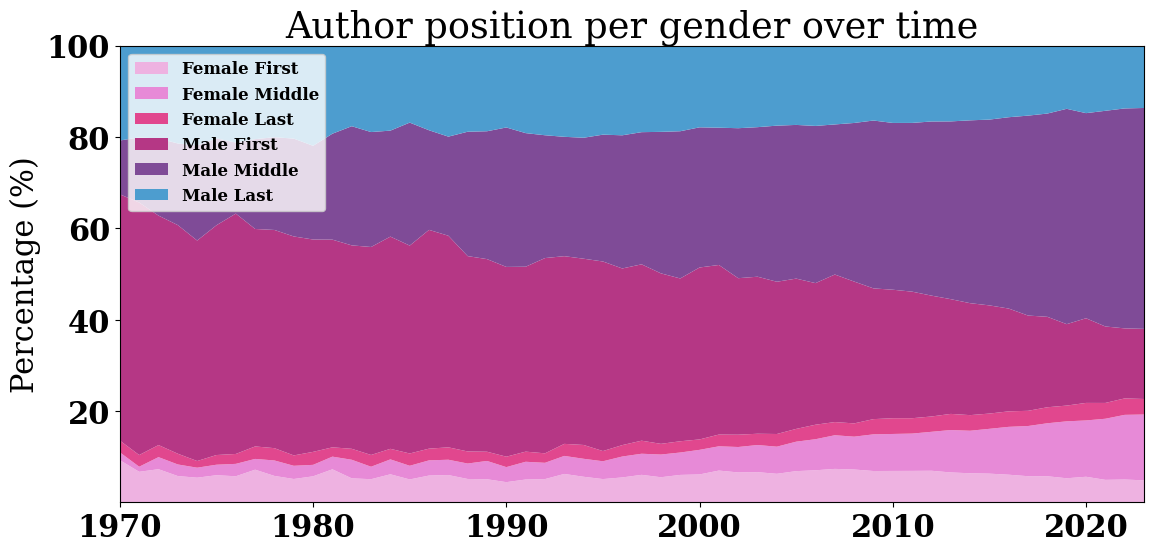

In [959]:
author_position_year_binary=article_author_data_final.groupby(['author_position', 'publication_year', 'binary_gender']).size().unstack(fill_value=0).reset_index()


data = pd.DataFrame({'female_first':author_position_year_binary[author_position_year_binary['author_position'] == 'first'].female.squeeze().values, 
                     'female_middle':author_position_year_binary[author_position_year_binary['author_position'] == 'middle'].female.squeeze().values, 
                     'female_last':author_position_year_binary[author_position_year_binary['author_position'] == 'last'].female.squeeze().values,
                    'male_first':author_position_year_binary[author_position_year_binary['author_position'] == 'first'].male.squeeze().values,
                    'male_middle': author_position_year_binary[author_position_year_binary['author_position'] == 'middle'].male.squeeze().values,
                    'male_last': author_position_year_binary[author_position_year_binary['author_position'] == 'last'].male.squeeze().values
                    })
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0) *100
 
# Make the plot
plt.stackplot(range(0,54),  data_perc["female_first"],  data_perc["female_middle"],  data_perc["female_last"], data_perc["male_first"], data_perc["male_middle"], data_perc["male_last"], labels=['Female First','Female Middle','Female Last', 'Male First', 'Male Middle', 'Male Last'])
plt.legend(loc='upper left', fontsize=12)
plt.margins(0,0)
plt.title('Author position per gender over time')
plt.ylabel('Percentage (%)')
plt.xticks(np.arange(0,60,10), np.arange(1970,2030,10).astype(str))
loc, label = plt.yticks()
plt.yticks(loc[1::], label[1::])

#save_name = 'author_position_over_time'
#save_path = f'Plots/{date.today()}/{save_name}'
#plt.savefig(save_path)

plt.show()



In [960]:
#we need to normalise this according to the total authors/publications per year 
#author_position_year_binary=article_author_data_final.groupby(['author_position', 'publication_year', 'binary_gender']).size().unstack(fill_value=0).reset_index()
#find total nummer artikler per år 
article_count_year = article_author_data_final.drop_duplicates(subset=['article_id'], keep='first').publication_year.value_counts().reset_index()
article_count_year.rename(columns={'count':'article_count'}, inplace=True)

In [961]:
article_count_year_gender=pd.merge(author_position_year_binary, article_count_year, on='publication_year')

In [962]:
article_count_year_gender['female_pr_article']=article_count_year_gender['female']/article_count_year_gender['article_count']
article_count_year_gender['male_pr_article']=article_count_year_gender['male']/article_count_year_gender['article_count']

In [963]:
article_count_year_gender

author_position  publication_year  female   male  article_count  \
0             first              1970      86    503            690   
1              last              1970      24    194            690   
2            middle              1970      16    110            690   
3             first              1971      60    497            646   
4              last              1971      23    181            646   
..              ...               ...     ...    ...            ...   
157            last              2022    3316  12686          27072   
158          middle              2022   13037  44339          27072   
159           first              2023    3927  12551          23937   
160            last              2023    2781  11185          23937   
161          middle              2023   11785  39545          23937   

     female_pr_article  male_pr_article  
0             0.124638         0.728986  
1             0.034783         0.281159  
2             0.023188         0.159420  
3             0.092879         0.769350  
4             0.035604         0.280186  
..                 ...              ...  
157           0.122488         0.468602  
158           0.481568         1.637818  
159           0.164056         0.524335  
160           0.116180         0.467268  
161           0.492334         1.652045  

[162 rows x 7 columns]

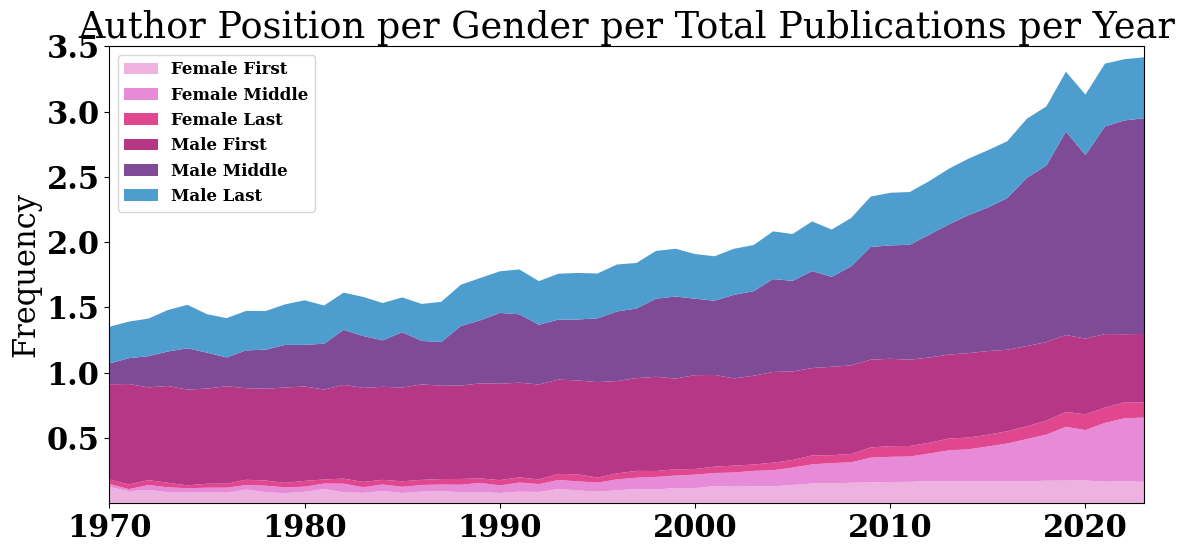

In [964]:


data = pd.DataFrame({'female_first':article_count_year_gender[article_count_year_gender['author_position'] == 'first'].female_pr_article.squeeze().values, 
                     'female_middle':article_count_year_gender[article_count_year_gender['author_position'] == 'middle'].female_pr_article.squeeze().values, 
                     'female_last':article_count_year_gender[article_count_year_gender['author_position'] == 'last'].female_pr_article.squeeze().values,
                    'male_first':article_count_year_gender[article_count_year_gender['author_position'] == 'first'].male_pr_article.squeeze().values,
                    'male_middle': article_count_year_gender[article_count_year_gender['author_position'] == 'middle'].male_pr_article.squeeze().values,
                    'male_last': article_count_year_gender[article_count_year_gender['author_position'] == 'last'].male_pr_article.squeeze().values
                    })
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data
#data.divide(data.sum(axis=1), axis=0) *100
 
# Make the plot
plt.stackplot(range(0,54),  data_perc["female_first"],  data_perc["female_middle"],  data_perc["female_last"], data_perc["male_first"], data_perc["male_middle"], data_perc["male_last"], labels=['Female First','Female Middle','Female Last', 'Male First', 'Male Middle', 'Male Last'])
plt.legend(loc='upper left', fontsize=12)
plt.margins(0,0)
plt.title('Author Position per Gender per Total Publications per Year')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,60,10), np.arange(1970,2030,10).astype(str))
loc, label = plt.yticks()
plt.yticks(loc[1::], label[1::])

#save_name = 'author_position_over_time'
#save_path = f'Plots/{date.today()}/{save_name}'
#plt.savefig(save_path)

plt.show()



In [965]:
#this just show us that there are more total authors per paper per year so naturally the middle group expands
#we need to normalise according to the count within each group each year 
author_position_year=article_author_data_final.groupby(['author_position', 'publication_year']).size().unstack(fill_value=0).reset_index()


In [966]:
data = pd.DataFrame({'female_first':author_position_year_binary[author_position_year_binary['author_position'] == 'first'].female.squeeze().values, 
                     'female_middle':author_position_year_binary[author_position_year_binary['author_position'] == 'middle'].female.squeeze().values, 
                     'female_last':author_position_year_binary[author_position_year_binary['author_position'] == 'last'].female.squeeze().values,
                    'male_first':author_position_year_binary[author_position_year_binary['author_position'] == 'first'].male.squeeze().values,
                    'male_middle': author_position_year_binary[author_position_year_binary['author_position'] == 'middle'].male.squeeze().values,
                    'male_last': author_position_year_binary[author_position_year_binary['author_position'] == 'last'].male.squeeze().values
                    })

In [967]:
author_position_year=author_position_year.T.reset_index()
author_position_year=author_position_year[1::]
author_position_year.rename(columns={0:'total_first', 1:'total_last', 2:'total_middle'}, inplace=True)
author_position_year=author_position_year.reset_index().drop(columns={'index'})
author_position_year['total_total']=author_position_year.total_first+author_position_year.total_last+author_position_year.total_middle

In [968]:
author_position_year_gender=pd.merge(data, author_position_year, left_index=True, right_index=True)

In [969]:
#female
author_position_year_gender['female_first_pr_total_first']=author_position_year_gender['female_first']/author_position_year_gender['total_first']
author_position_year_gender['female_middle_pr_total_middle']=author_position_year_gender['female_middle']/author_position_year_gender['total_middle']
author_position_year_gender['female_last_pr_total_last']=author_position_year_gender['female_last']/author_position_year_gender['total_last']
#male
author_position_year_gender['male_first_pr_total_first']=author_position_year_gender['male_first']/author_position_year_gender['total_first']
author_position_year_gender['male_middle_pr_total_middle']=author_position_year_gender['male_middle']/author_position_year_gender['total_middle']
author_position_year_gender['male_last_pr_total_last']=author_position_year_gender['male_last']/author_position_year_gender['total_last']


In [1008]:
data_norm=author_position_year_gender[["female_first_pr_total_first", "female_middle_pr_total_middle", "female_last_pr_total_last", 
                                       "male_first_pr_total_first", "male_middle_pr_total_middle", "male_last_pr_total_last"]]

#convert object columns to float64
data_norm = data_norm.apply(pd.to_numeric, errors='coerce')
#save in percent as well 
data_norm_perc=data_norm*100

In [1023]:
data_norm_perc_year1970=data_norm_perc.iloc[0,:]
data_norm_perc_year2023=data_norm_perc.iloc[53,:]

In [1027]:
text_1970=[data_norm_perc_year1970[i] for i in range(len(data_norm_perc_year1970))]
text_2023=[data_norm_perc_year2023[i] for i in range(len(data_norm_perc_year2023))]

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_99728/2255815831.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_99728/2255815831.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



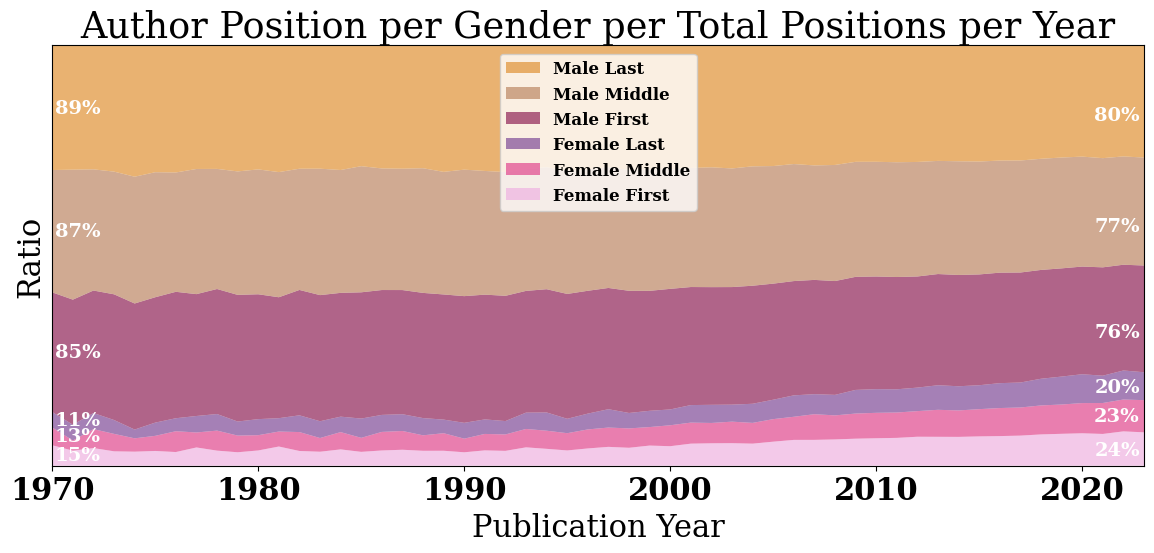

In [1090]:

# Make the plot
plt.stackplot(range(0,54),  data_norm["female_first_pr_total_first"],  data_norm["female_middle_pr_total_middle"],  data_norm["female_last_pr_total_last"], data_norm["male_first_pr_total_first"], data_norm["male_middle_pr_total_middle"], data_norm["male_last_pr_total_last"], 
              labels=['Female First','Female Middle','Female Last', 'Male First', 'Male Middle', 'Male Last'],
             colors=[color1, color3, color5, color14, color16, color18], alpha=0.7)

def add_text_annotations_first(text_list, data_frame):
    # Calculate cumulative sum of values in the first row of data_norm
    cumsum_values = data_frame.iloc[0].cumsum().values
    # Add text annotations at x=0 with adjusted y-positions
    for text, cumsum_value, value in zip(text_list, cumsum_values, data_frame.iloc[0].values):
        y_position = cumsum_value - 0.5 * value
        plt.text(2.35, y_position, f'{text:.0f}%', ha="right", va="center", color='white', fontsize=14)


def add_text_annotations_last(text_list, data_frame):
    # Calculate cumulative sum of values in the first row of data_norm
    cumsum_values = data_frame.iloc[53].cumsum().values
    # Add text annotations at x=0 with cumulative sum of values as y-positions
    for text, cumsum_value, value in zip(text_list, cumsum_values, data_frame.iloc[0].values):
        y_position = cumsum_value - 0.5 * value
        plt.text(52.8, y_position-0.05, f'{text:.0f}%', ha="right", va="center", color='white', fontsize=14)

add_text_annotations_first(text_1970, data_norm)
add_text_annotations_last(text_2023, data_norm)




handles, labels = plt.gca().get_legend_handles_labels()
# Reverse the order of handles and labels
handles = handles[::-1]
labels = labels[::-1]
# Create a new legend with the reversed order
plt.legend(handles, labels, loc='upper center', fontsize=12)
plt.margins(0,0)
plt.title('Author Position per Gender per Total Positions per Year')
plt.ylabel('Ratio')
plt.xlabel('Publication Year')
plt.xticks(np.arange(0,60,10), np.arange(1970,2030,10).astype(str))
loc, label = plt.yticks()
plt.yticks([]) #loc[1::], label[1::]

save_name = 'gender_author_position_over_time_normalised'
save_path = f'Plots/{date.today()}/{save_name}'
plt.savefig(save_path)

plt.show()



In [1092]:
# Define mapping dictionary
category_mapping = {False: 'No', True: 'Yes'}

# Map categorical variable to numerical values
article_author_data_final['is_corresponding'] = article_author_data_final['is_corresponding'].map(category_mapping)


In [1094]:
article_author_data_final['is_corresponding'].value_counts()

is_corresponding
No     895469
Yes    189630
Name: count, dtype: int64

<class 'pandas.core.series.Series'>


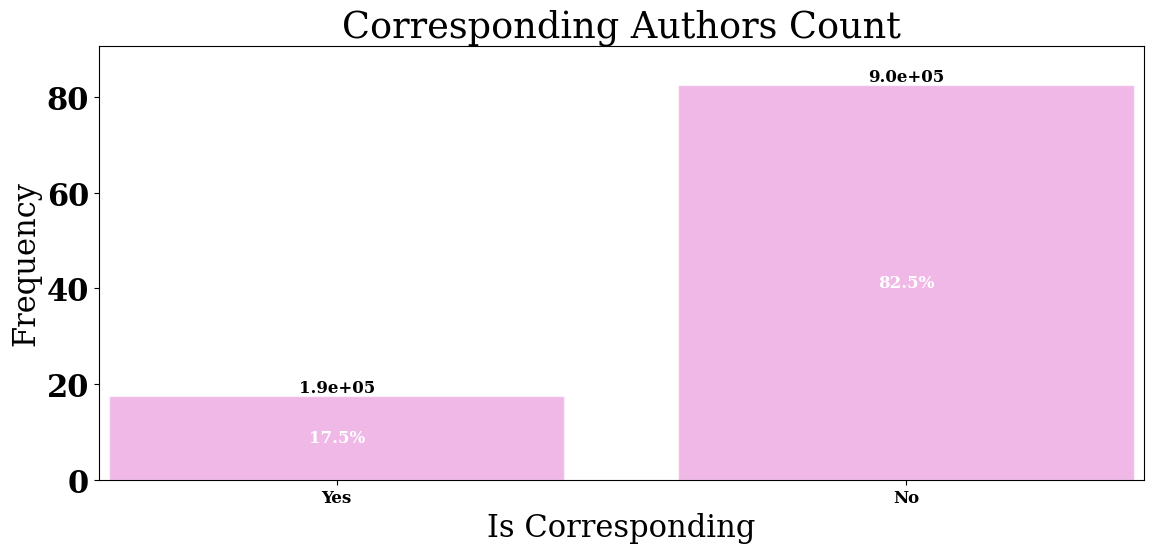

In [1095]:
cat_plot_reversed_order(article_author_data_final.is_corresponding, title='Corresponding Authors Count', xlabel='Is Corresponding', ylabel='Frequency', xmargins=0.01, ymargins=0.1, norm=True, multiply=100, rot=0, save_name='iscorresponding')


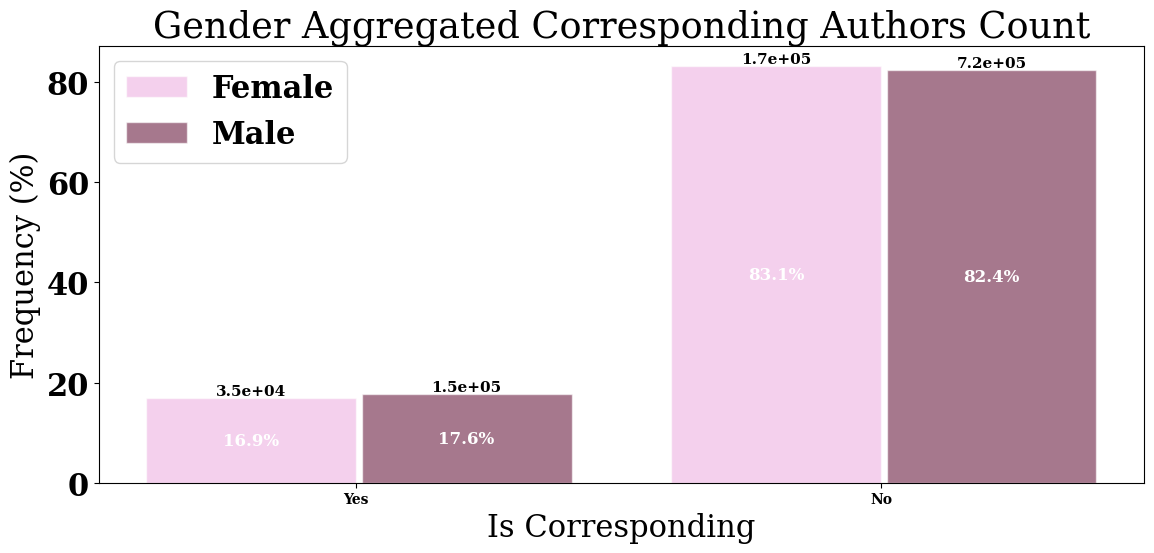

In [1096]:
cat_plot_compare(article_author_data_final[article_author_data_final.binary_gender=='female'].is_corresponding, 
                 article_author_data_final[article_author_data_final.binary_gender=='male'].is_corresponding, 
                 color1=color1, color2=color13, title='Gender Aggregated Corresponding Authors Count', xlabel='Is Corresponding', ylabel='Frequency (%)', norm=True, multiply=100, font=None, rot=0, xmargins=None, ymargins=None, save_name='genderiscorresponding', label1='Female', label2='Male', legend_loc='best')


In [1106]:
short_names = []

#define short names outside plotting function 
data_cats=article_author_data_final.drop_duplicates(subset=['article_id'], keep='first').institution_name.value_counts().reset_index()[0:20]
data_cats = data_cats.iloc[:, 0]

excluded_words = ['THE', 'AND', 'OF', 'FOR']


def extract_first_letters(words):
    short_name = ''
    skip_next = False
    
    for word in words:
        if skip_next:
            skip_next = ')' not in word
        elif '(' in word:
            skip_next = ')' not in word
        else:
            short_name += word[0]

    return short_name

for cat in data_cats:
    words = [word.upper() for word in cat.split() if word.upper() not in excluded_words]
    unique_short_name = extract_first_letters(words)
    
    # Check for duplicates and add a unique identifier
    count = short_names.count(unique_short_name)
    if count > 0:
        unique_short_name += str(count + 1)
    
    short_names.append(unique_short_name)

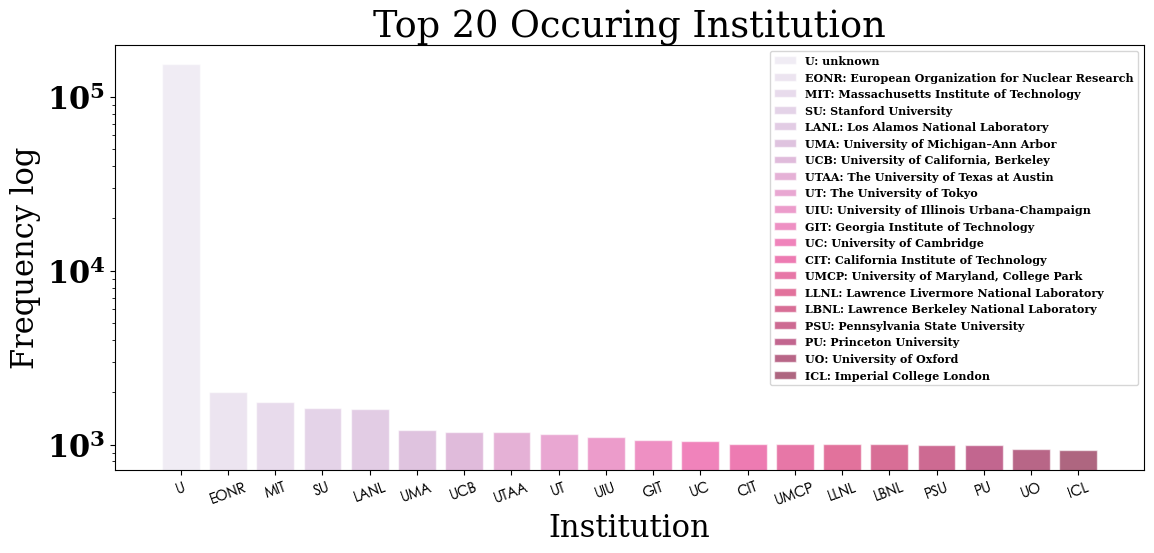

In [1116]:
cat_top_plot_short_names(article_author_data_final.drop_duplicates(subset=['article_id'], keep='first').institution_name, top_n=20, title='Top 20 Occuring Institutions', xlabel='Institution', ylabel='Frequency log', log=True, norm=False, multiply=1, font='Heiti TC', rot=20, save_name='institutions')


In [1119]:
short_names = []

#define short names outside plotting function 
data_cats=article_author_data_final[article_author_data_final.binary_gender=='female'].institution_name.value_counts().reset_index()[0:20]
data_cats = data_cats.iloc[:, 0]

excluded_words = ['THE', 'AND', 'OF', 'FOR']


def extract_first_letters(words):
    short_name = ''
    skip_next = False
    
    for word in words:
        if skip_next:
            skip_next = ')' not in word
        elif '(' in word:
            skip_next = ')' not in word
        else:
            short_name += word[0]

    return short_name

for cat in data_cats:
    words = [word.upper() for word in cat.split() if word.upper() not in excluded_words]
    unique_short_name = extract_first_letters(words)
    
    # Check for duplicates and add a unique identifier
    count = short_names.count(unique_short_name)
    if count > 0:
        unique_short_name += str(count + 1)
    
    short_names.append(unique_short_name)

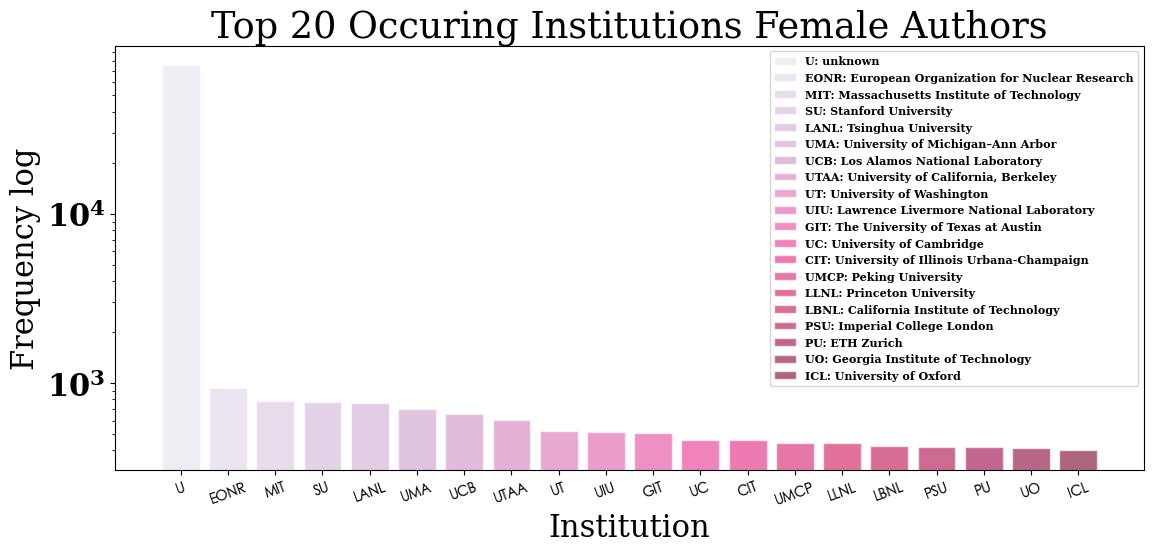

In [1120]:
cat_top_plot_short_names(article_author_data_final[article_author_data_final.binary_gender=='female'].institution_name, top_n=20, title='Top 20 Occuring Institutions Female Authors', xlabel='Institution', ylabel='Frequency log', log=True, norm=False, multiply=1, font='Heiti TC', rot=20, save_name='institutionsfemale')


In [1117]:
short_names = []

#define short names outside plotting function 
data_cats=article_author_data_final[article_author_data_final.binary_gender=='male'].institution_name.value_counts().reset_index()[0:20]
data_cats = data_cats.iloc[:, 0]

excluded_words = ['THE', 'AND', 'OF', 'FOR']


def extract_first_letters(words):
    short_name = ''
    skip_next = False
    
    for word in words:
        if skip_next:
            skip_next = ')' not in word
        elif '(' in word:
            skip_next = ')' not in word
        else:
            short_name += word[0]

    return short_name

for cat in data_cats:
    words = [word.upper() for word in cat.split() if word.upper() not in excluded_words]
    unique_short_name = extract_first_letters(words)
    
    # Check for duplicates and add a unique identifier
    count = short_names.count(unique_short_name)
    if count > 0:
        unique_short_name += str(count + 1)
    
    short_names.append(unique_short_name)

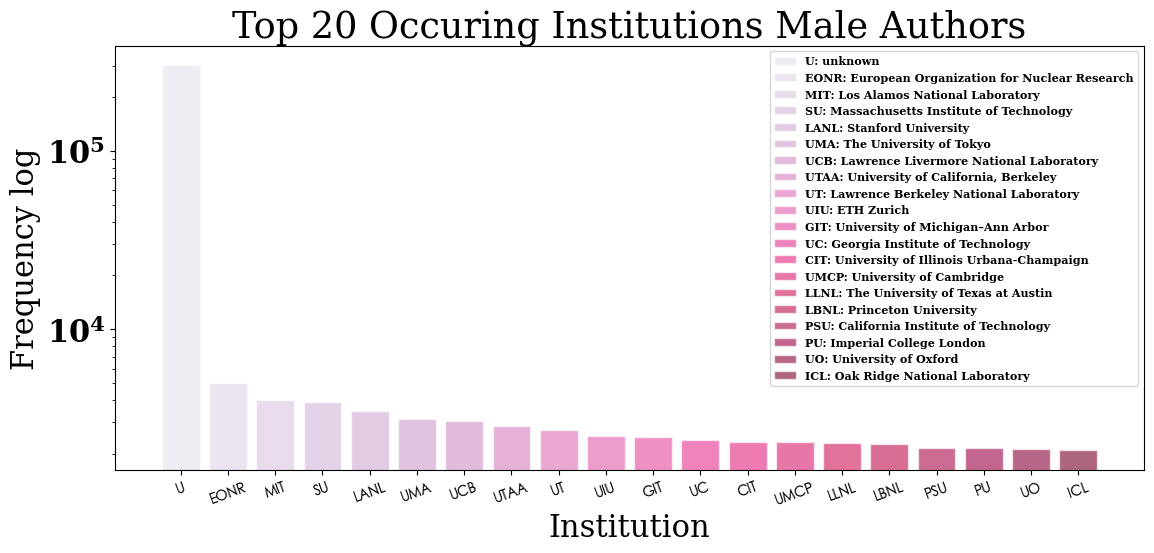

In [1118]:
cat_top_plot_short_names(article_author_data_final[article_author_data_final.binary_gender=='male'].institution_name, top_n=20, title='Top 20 Occuring Institutions Male Authors', xlabel='Institution', ylabel='Frequency log', log=True, norm=False, multiply=1, font='Heiti TC', rot=20, save_name='institutionsmale')


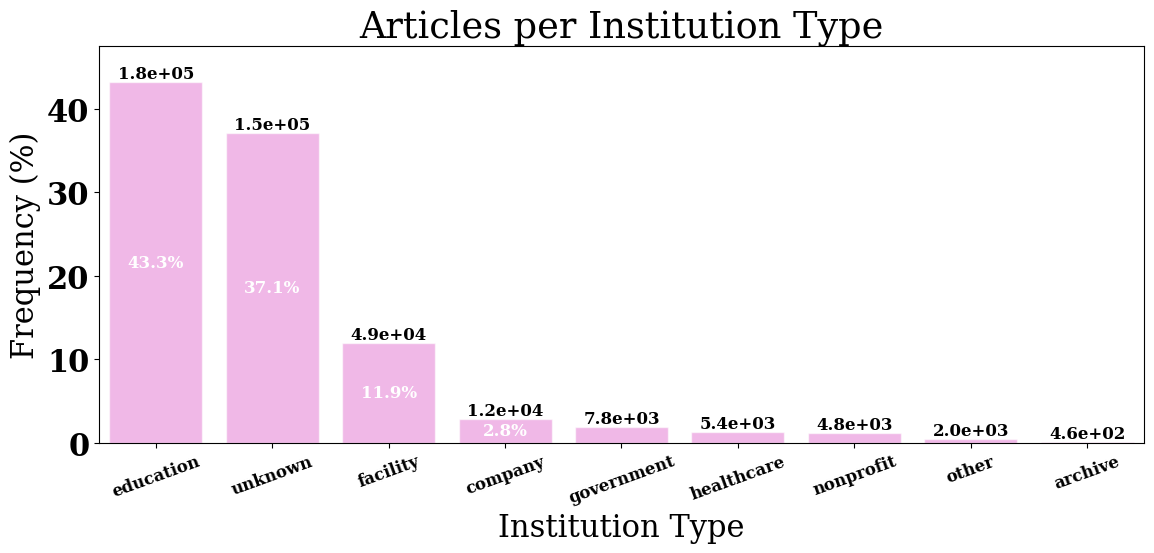

In [1123]:
cat_plot(article_author_data_final.drop_duplicates(subset=['article_id'], keep='first').institution_type, title='Articles per Institution Type', xlabel='Institution Type', ylabel='Frequency (%)', xmargins=0.01, ymargins=0.1, norm=True, multiply=100, rot=20, save_name='institutiontype')


In [1130]:

def cat_plot_compare(data1, data2, color1=None, color2=None, title=None, xlabel=None, ylabel='Frequency', norm=False, multiply=1, font=None, rot=0, xmargins=None, ymargins=None, save_name=None, label1='Dataset 1', label2='Dataset 2', legend_loc='best'):
    """
    Create a categorical plot for given DataFrame columns for comparison.

    Parameters:
    - data1 (pd.Series): The first input DataFrame column.
    - data2 (pd.Series): The second input DataFrame column.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequency.
    - norm (bool): Whether to normalize data or not. Default is False.
    - multiply (int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - rot (int): Rotation scale of x-tick-labels. Default is 0.
    - font (str): Font type. If Chinese letters then use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.
    - save_name (str): The name to use when saving the plot.
    - label1 (str): Label for Dataset 1. Default is 'Dataset 1'.
    - label2 (str): Label for Dataset 2. Default is 'Dataset 2'.

    Returns:
    - None
    """
    # Merge data1 and data2 to ensure all categories are represented
    merged_data = pd.merge(data1, data2, how='outer', left_index=True, right_index=True, suffixes=('_df1', '_df2'))

    #count N without turning into percentage in both dataframes 
    count_n1 = merged_data[data1.name + '_df1'].value_counts().reset_index()
    count_n2 = merged_data[data2.name + '_df2'].value_counts().reset_index()

    # get value counts with the parameter normalize in order to be able to get percentage of both dataframes
    value_counts1 = merged_data[data1.name + '_df1'].value_counts(normalize=norm).mul(multiply).reset_index()
    value_counts2 = merged_data[data2.name + '_df2'].value_counts(normalize=norm).mul(multiply).reset_index()

    # Sort the value counts by category
    all_categories = set(value_counts1[data1.name + '_df1']).union(set(value_counts2[data2.name + '_df2']))
    value_counts1 = value_counts1.set_index(data1.name + '_df1').reindex(all_categories, fill_value=0).reset_index()
    count_n1 = count_n1.set_index(data1.name + '_df1').reindex(all_categories, fill_value=0).reset_index()
    value_counts2 = value_counts2.set_index(data2.name + '_df2').reindex(all_categories, fill_value=0).reset_index()
    count_n2 = count_n2.set_index(data2.name + '_df2').reindex(all_categories, fill_value=0).reset_index()

    #select either count or category column 
    count_n1 = count_n1.iloc[:, 1]
    count1 = value_counts1.iloc[:, 1]
    cats1 = value_counts1.iloc[:, 0]

    count2 = value_counts2.iloc[:, 1]
    count_n2 = count_n2.iloc[:, 1]
    cats2 = value_counts2.iloc[:, 0]

    width = 0.4  # width of the bars

    # Get integer positions for each category
    cat_positions1 = range(len(cats1))
    cat_positions2 = [pos + width + 0.01 for pos in cat_positions1]

    fig, ax = plt.subplots()
    bars1=ax.bar(cat_positions1, count1, width, alpha=0.6, color=color1, edgecolor='white', label=label1)
    bars2=ax.bar(cat_positions2, count2, width, alpha=0.6, color=color2, edgecolor='white', label=label2)

    # Add text on top of each bar if the number of bars is 10 or less for both datasets and count is more than zero 
    if len(bars1) <= 10:
        for i, bar in enumerate(bars1):
            height = bar.get_height()
            if count_n1.iloc[i] > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count_n1.iloc[i]:.1e}', ha='center', va='bottom', color='black', fontsize=11)

    if len(bars2) <= 10:
        for i, bar in enumerate(bars2):
            height = bar.get_height()
            if count_n2.iloc[i] > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count_n2.iloc[i]:.1e}', ha='center', va='bottom', color='black', fontsize=11)


    # Add text in the center of each bar if the bar percentage count is 2 percent or more and we have less than 10 categories for both datasets
    for cat, c1, c2, bar1, bar2 in zip(all_categories, count1, count2, bars1, bars2):
        if len(cat) <= 10 and c1 >= 2:
            percentbar1 = c1
            ax.text(bar1.get_x() + bar1.get_width() / 2, c1 / 2, f'{percentbar1:.1f}%', ha='center', va='center', color='white', fontsize=12)
        if len(cat) <= 10 and c2 >= 2:
            percentbar2 = c2
            ax.text(bar2.get_x() + bar2.get_width() / 2, c2 / 2, f'{percentbar2:.1f}%', ha='center', va='center', color='white', fontsize=12)

    plt.xticks([pos + width / 2 for pos in cat_positions1], cats1, font=font, size=10, rotation=rot)
    plt.margins(x=xmargins, y=ymargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=legend_loc)

    if save_name:
        save_path = f'Plots/{date.today()}/{str(save_name)}'
        plt.savefig(save_path)


    plt.show()

In [1151]:
def cat_plot_compare(data1, data2, color1=None, color2=None, title=None, xlabel=None, ylabel='Frequency', norm=False, multiply=1, font=None, rot=0, xmargins=None, ymargins=None, save_name=None, label1='Dataset 1', label2='Dataset 2', legend_loc='best', category_order=None):
    """
    Create a categorical plot for given DataFrame columns for comparison.

    Parameters:
    - data1 (pd.Series): The first input DataFrame column.
    - data2 (pd.Series): The second input DataFrame column.
    - title (str): The title of the plot. Default is None.
    - xlabel (str): The label for the x-axis. Default is None.
    - ylabel(str): The label for the y-axis. Default is Frequency.
    - norm (bool): Whether to normalize data or not. Default is False.
    - multiply (int): Multiply data to achieve percentage. This should be 100 if norm=True. Default is 1.
    - rot (int): Rotation scale of x-tick-labels. Default is 0.
    - font (str): Font type. If Chinese letters then use: 'Heiti TC'. Default is None.
    - xmargins (int): The size of the x-margins. Default is None.
    - save_name (str): The name to use when saving the plot.
    - label1 (str): Label for Dataset 1. Default is 'Dataset 1'.
    - label2 (str): Label for Dataset 2. Default is 'Dataset 2'.
    - legend_loc (str): Location of the legend. Default is 'best'.
    - category_order (list or None): Order of categories. Default is None.

    Returns:
    - None
    """
    # Merge data1 and data2 to ensure all categories are represented
    merged_data = pd.merge(data1, data2, how='outer', left_index=True, right_index=True, suffixes=('_df1', '_df2'))

    #count N without turning into percentage in both dataframes 
    count_n1 = merged_data[data1.name + '_df1'].value_counts().reset_index()
    count_n2 = merged_data[data2.name + '_df2'].value_counts().reset_index()

    # get value counts with the parameter normalize in order to be able to get percentage of both dataframes
    value_counts1 = merged_data[data1.name + '_df1'].value_counts(normalize=norm).mul(multiply).reset_index()
    value_counts2 = merged_data[data2.name + '_df2'].value_counts(normalize=norm).mul(multiply).reset_index()

    # Sort the value counts by category
    all_categories = set(value_counts1[data1.name + '_df1']).union(set(value_counts2[data2.name + '_df2']))

    # Reorder the categories based on the desired order
    if category_order:
        all_categories = sorted(all_categories, key=lambda x: category_order.index(x) if x in category_order else float('inf'))

    value_counts1 = value_counts1.set_index(data1.name + '_df1').reindex(all_categories, fill_value=0).reset_index()
    count_n1 = count_n1.set_index(data1.name + '_df1').reindex(all_categories, fill_value=0).reset_index()
    value_counts2 = value_counts2.set_index(data2.name + '_df2').reindex(all_categories, fill_value=0).reset_index()
    count_n2 = count_n2.set_index(data2.name + '_df2').reindex(all_categories, fill_value=0).reset_index()

    #select either count or category column 
    count_n1 = count_n1.iloc[:, 1]
    count1 = value_counts1.iloc[:, 1]
    cats1 = value_counts1.iloc[:, 0]

    count2 = value_counts2.iloc[:, 1]
    count_n2 = count_n2.iloc[:, 1]
    cats2 = value_counts2.iloc[:, 0]

    width = 0.4  # width of the bars

    # Get integer positions for each category
    cat_positions1 = range(len(cats1))
    cat_positions2 = [pos + width + 0.01 for pos in cat_positions1]

    fig, ax = plt.subplots()
    bars1=ax.bar(cat_positions1, count1, width, alpha=0.6, color=color1, edgecolor='white', label=label1)
    bars2=ax.bar(cat_positions2, count2, width, alpha=0.6, color=color2, edgecolor='white', label=label2)

    # Add text on top of each bar if the number of bars is 10 or less for both datasets and count is more than zero 
    if len(bars1) <= 10 and len(cats1) <=8 :
        for i, bar in enumerate(bars1):
            height = bar.get_height()
            if count_n1.iloc[i] > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count_n1.iloc[i]:.1e}', ha='center', va='bottom', color='black', fontsize=11)

    if len(bars2) <= 10 and len(cats2) <=8:
        for i, bar in enumerate(bars2):
            height = bar.get_height()
            if count_n2.iloc[i] > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count_n2.iloc[i]:.1e}', ha='center', va='bottom', color='black', fontsize=11)


    # Add text in the center of each bar if the bar percentage count is 2 percent or more and we have less than 10 categories for both datasets
    for cat, c1, c2, bar1, bar2 in zip(all_categories, count1, count2, bars1, bars2):
        if len(cat) <= 3:
            if c1 >= 2:
                percentbar1 = c1
                ax.text(bar1.get_x() + bar1.get_width() / 2, c1 / 2, f'{percentbar1:.1f}%', ha='center', va='center', color='white', fontsize=12)
        if len(cat) <= 3:
            if c2 >= 2:
                percentbar2 = c2
                ax.text(bar2.get_x() + bar2.get_width() / 2, c2 / 2, f'{percentbar2:.1f}%', ha='center', va='center', color='white', fontsize=12)

    plt.xticks([pos + width / 2 for pos in cat_positions1], cats1, font=font, size=10, rotation=rot)
    plt.margins(x=xmargins, y=ymargins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=legend_loc)

    if save_name:
        save_path = f'Plots/{date.today()}/{str(save_name)}'
        plt.savefig(save_path)


    plt.show()


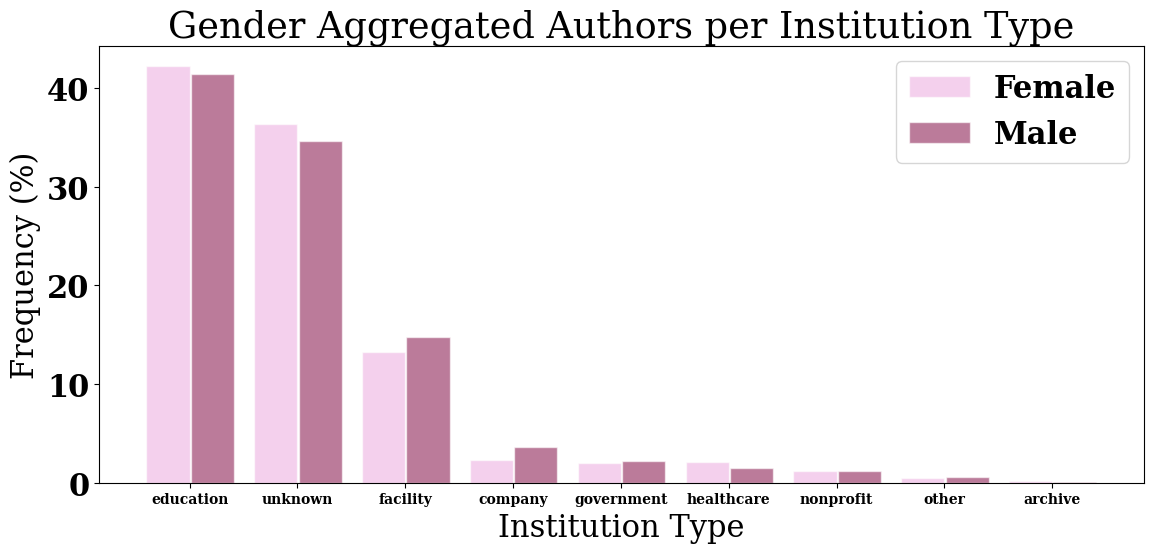

In [1152]:
cat_plot_compare(article_author_data_final[article_author_data_final.binary_gender=='female'].institution_type, 
                 article_author_data_final[article_author_data_final.binary_gender=='male'].institution_type, 
                 color1=color1, color2=color14, 
                 title='Gender Aggregated Authors per Institution Type', xlabel='Institution Type', ylabel='Frequency (%)', 
                 norm=True, multiply=100, font=None, rot=0, xmargins=None, ymargins=None, save_name='genderinstitutiontype', 
                 label1='Female', label2='Male', legend_loc='best', 
                 category_order = ["education", "unknown", "facility", "company", "government", "healthcare", "nonprofit", "other", "archive"]
)

#fix text on this plot 

## World Map

In [51]:
#calc percentage of country appearing
df_country_proportion=article_author_data_final.author_first_country.value_counts(normalize=True).mul(100).reset_index()
df_country_count=article_author_data_final.author_first_country.value_counts(normalize=False).reset_index()

In [52]:
df_country=pd.merge(df_country_proportion, df_country_count, on='author_first_country')


In [53]:
# generate country code for map plotting 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(alpha_2=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df_country['map_code']=alpha3code(df_country.author_first_country)


In [67]:
#import world dataset
world = gpd.read_file('ne_110m_admin_0_countries.dbf')


In [69]:
world = world[['ADMIN', 'ISO_A3', 'GU_A3', 'CONTINENT',  'geometry']] 
world.columns=['map_name', 'map_code', 'GU_A3', 'continent',  'geometry']


In [70]:
world['map_code'][world['map_code']=='-99']=world['GU_A3']

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_62305/2184410109.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
world=world.drop(columns=['GU_A3'])

In [72]:
# Data for the rows to add for the world map 
add_country_data = {
    'map_name': ['Singapore', 'Virgin Islands, British', 'Hong Kong', 'Malta','Macao', 'Bahrain', 'Mauritius', 'Monaco','Barbados','Réunion',
                 'Holy See (Vatican City State)','Bermuda','Martinique','French Guiana','Faroe Islands','Guadeloupe','Svalbard and Jan Mayen',
                 'Liechtenstein','Montserrat','Palau','Curaçao','Dominica','Cayman Islands','Grenada','Guam','French Polynesia','Cabo Verde',
                 'Sao Tome And Principe','Antigua And Barbuda'],
    'map_code': ['SGP', 'VGB','HKG','MLT','MAC','BHR','MUS','MCO','BRB','REU',
                 'VAT','BMU','MTQ','GUF','FRO','GLP','SJM',
                 'LIE','MSR','PLW','CUW','DMA','CYM','GRD','GUM','PYF','CPV',
                 'STP','ATG']
                }

# Create a new DataFrame with the rows to add
new_rows_df = pd.DataFrame(add_country_data)

# add new rows to the world map
world = pd.concat([world, new_rows_df], ignore_index=True)

In [73]:
# then merge complete world with our data 
merge_map=pd.merge(world,df_country,on='map_code')

In [74]:
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
location=location.rename(columns={"name": "map_name"})


In [75]:
#countries that ARE in both data but needs a renaming to merge correctly 

merge_map['map_name'] = merge_map['map_name'].replace({'United Republic of Tanzania': 'Tanzania', 'Democratic Republic of the Congo': 'Dem. Rep. Congo',
'Dominican Republic	':'Dominican Rep.', 'The Bahamas': 'Bahamas', 'Ivory Coast': 'Côte d', 'Central African Republic': 'Central African Rep.',
'Republic of the Congo': 'Congo', 'Bosnia and Herzegovina':'Bosnia and Herz.', 'North Macedonia': 'Macedonia', 'Republic of Serbia': 'Serbia',
'South Sudan':'S. Sudan'})


In [76]:
#countries that ARE NOT  in data and should be added

add_country_data={
    'map_name': ['Norway', 'Greenland', 'East Timor', 'Lesotho', 'France', 'Puerto Rico', 'eSwatini', 'Palestine', 'Myanmar', 'North Korea',
             'Turkmenistan', 'New Caledonia', 'Singapore', 'Virgin Islands, British', 'Hong Kong', 'Malta', 'Macao', 'Bahrain', 'Mauritius',
             'Monaco', 'Barbados', 'Réunion', 'Holy See (Vatican City State)', 'Bermuda', 'Martinique', 'French Guiana', 'Faroe Islands',
             'Guadeloupe', 'Svalbard and Jan Mayen', 'Liechtenstein', 'Montserrat', 'Palau', 'Curaçao', 'Dominica', 'Cayman Islands',
             'Grenada', 'Guam', 'French Polynesia', 'Cabo Verde', 'Sao Tome And Principe', 'Antigua And Barbuda'],
    'latitude': [60.472024, 71.706940, 33.819340, -29.609988, 46.603354, 18.2208, -26.326080, 31.952162, 21.9162, 40.339851,
                38.969719, -20.904305, 1.290270, 18.423500, 22.396427, 35.937496, 22.198746, 26.066700, -20.348404,
                 43.738419, 13.193887, -21.115141, 30.033760, 32.307800, 14.641528, 4.938000, 61.892635,
                16.264999, 77.553604, 47.141041, 16.706110, 7.514980, 12.121610, 15.414999, 19.313299, 
                 12.116500, 13.444304, -17.679743, 16.538799, 0.336310, 17.060816],
    'longitude': [8.468946, -42.604301, -118.071167, 28.233608, 1.888334, -66.5901, 31.146080, 35.233154, 95.9560, 127.510094,
                 59.556278, 165.618042, 103.851959, -64.619830, 114.109497, 14.375416, 113.543877, 50.557701, 57.552151,
                  7.424616, -59.543198, 55.536385, -95.811600, -64.750504, -61.024174, -52.335049, -6.911806,
                 -61.550999, 23.670273, 9.521450, -62.213371, 134.582520, -68.949417, -61.370975, -81.254601, 
                  -61.679001, 144.793732, -149.406845, -23.041800, 6.734240, -61.796429]
}


# Create a new DataFrame with the rows to add
new_rows_df = pd.DataFrame(add_country_data)

# add new rows to the world map
location = pd.concat([location, new_rows_df], ignore_index=True)

In [77]:
merge_map=merge_map.merge(location,on='map_name').sort_values(by='proportion',ascending=False).reset_index()

In [78]:
mergeworld = pd.merge(merge_map, world, how='outer')

In [79]:
world['map_name'] = world['map_name'].replace({'United Republic of Tanzania': 'Tanzania', 'Democratic Republic of the Congo': 'Dem. Rep. Congo',
'Dominican Republic	':'Dominican Rep.', 'The Bahamas': 'Bahamas', 'Ivory Coast': 'Côte d', 'Central African Republic': 'Central African Rep.',
'Republic of the Congo': 'Congo', 'Bosnia and Herzegovina':'Bosnia and Herz.', 'North Macedonia': 'Macedonia', 'Republic of Serbia': 'Serbia',
'South Sudan':'S. Sudan'})

In [80]:
mergeworld = pd.merge(merge_map, world, how='outer')

In [81]:
#we found coordinates on singapore so include those 
coordinates_singapore = [
    (103.60313415527344, 1.26675774823251),
    (103.61755371093749, 1.3244212231757635),
    (103.65325927734375, 1.3896342476555246),
    (103.66630554199219, 1.4143460858068593),
    (103.67179870605467, 1.4294476354255539),
    (103.68278503417969, 1.439057660807751),
    (103.69583129882812, 1.4438626583311722),
    (103.72055053710938, 1.4589640128389818),
    (103.73771667480469, 1.4582775898253464),
    (103.75419616699219, 1.4493540716333067),
    (103.7603759765625, 1.4500404973607948),
    (103.80363464355467, 1.4788701887242242),
    (103.8269805908203, 1.4754381021049132),
    (103.86680603027342, 1.4582775898253464),
    (103.8922119140625, 1.4321933610794366),
    (103.89701843261717, 1.4287612034988086),
    (103.91555786132812, 1.4267019064882447),
    (103.93478393554688, 1.4321933610794366),
    (103.96018981933592, 1.4218968729661605),
    (103.985595703125, 1.4246426076343077),
    (104.00070190429688, 1.4212104387885494),
    (104.02130126953125, 1.4397440896459617),
    (104.04396057128906, 1.445921939876798),
    (104.08721923828125, 1.4246426076343077),
    (104.09477233886719, 1.3971851147344805),
    (104.08103942871094, 1.3573711816421556),
    (104.12704467773438, 1.290097884072079),
    (104.12704467773438, 1.2777413679950957),
    (103.98216247558594, 1.2537146393239096),
    (103.81256103515625, 1.1754546449158993),
    (103.73634338378906, 1.1301452152248344),
    (103.65394592285156, 1.1905576261723045),
    (103.56536865234375, 1.1960495988987414),
    (103.60313415527344, 1.26675774823251)
]

polygon_singapore = Polygon(coordinates_singapore)


In [82]:
#make sure France only includes FRANCE

coordinates_france = [
    [
        (6.18632, 49.46380),
        (6.65823, 49.20196),
        (8.09928, 49.01778),
        (7.59368, 48.33302),
        (7.46676, 47.62058),
        (7.19220, 47.44977),
        (6.73657, 47.54180),
        (6.76871, 47.28771),
        (6.03739, 46.72578),
        (6.02261, 46.27299),
        (6.50010, 46.42967),
        (6.84359, 45.99115),
        (6.80236, 45.70858),
        (7.09665, 45.33310),
        (6.74996, 45.02852),
        (7.00756, 44.25477),
        (7.54960, 44.12790),
        (7.43518, 43.69384),
        (6.52925, 43.12889),
        (4.55696, 43.39965),
        (3.10041, 43.07520),
        (2.98600, 42.47302),
        (1.82679, 42.34338),
        (0.70159, 42.79573),
        (0.33805, 42.57955),
        (-1.50277, 43.03401),
        (-1.90135, 43.42280),
        (-1.38423, 44.02261),
        (-1.19380, 46.01492),
        (-2.22572, 47.06436),
        (-2.96328, 47.57033),
        (-4.49155, 47.95495),
        (-4.59235, 48.68416),
        (-3.29581, 48.90169),
        (-1.61651, 48.64442),
        (-1.93349, 49.77634),
        (-0.98947, 49.34738),
        (1.33876, 50.12717),
        (1.63900, 50.94661),
        (2.51357, 51.14851),
        (2.65842, 50.79685),
        (3.12325, 50.78036),
        (3.58818, 50.37899),
        (4.28602, 49.90750),
        (4.79922, 49.98537),
        (5.67405, 49.52948),
        (5.89776, 49.44267),
        (6.18632, 49.46380)
    ],
    [
        (8.74601, 42.62812),
        (9.39000, 43.00998),
        (9.56002, 42.15249),
        (9.22975, 41.38001),
        (8.77572, 41.58361),
        (8.54421, 42.25652),
        (8.74601, 42.62812)
    ]
]


polygons_france = [Polygon(coords) for coords in coordinates_france]
multipolygon_france = MultiPolygon(polygons_france)


In [83]:
#french guina appears under France but we split them
coordinates_french_guiana = [
    (-51.65780, 4.15623),
    (-52.24934, 3.24109),
    (-52.55642, 2.50471),
    (-52.93966, 2.12486),
    (-53.41847, 2.05339),
    (-53.55484, 2.33490),
    (-53.77852, 2.37670),
    (-54.08806, 2.10556),
    (-54.52475, 2.31185),
    (-54.26971, 2.73239),
    (-54.18173, 3.18978),
    (-54.00693, 3.62004),
    (-54.39954, 4.21261),
    (-54.47863, 4.89676),
    (-53.95804, 5.75655),
    (-53.61845, 5.64653),
    (-52.88214, 5.40985),
    (-51.82334, 4.56577),
    (-51.65780, 4.15623)
]

polygon_french_guiana = Polygon(coordinates_french_guiana)


In [84]:
mergeworld['geometry'][mergeworld['map_name']=='France']=multipolygon_france
mergeworld['geometry'][mergeworld['map_name']=='French Guiana']=polygon_french_guiana
mergeworld['continent'][mergeworld['map_name']=='French Guiana']='South America'

/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_62305/1471707212.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
mergeworld=mergeworld.rename(columns={'count':'proportion_count'})

In [87]:
population_size=pd.read_csv('pop_size_data_2022.csv', sep=';')
population_size=population_size.rename(columns={'2022':'total_population_2022'})
population_size=population_size[population_size.map_code.isin([mergeworld.map_code[i] for i in range(len(mergeworld))])]

In [88]:
mergeworld=pd.merge(mergeworld, population_size, on='map_code', how='outer')

In [89]:
mergeworld['per_capita']=mergeworld.proportion_count/mergeworld.total_population_2022

In [90]:
mergeworld_update=mergeworld

In [91]:
import warnings
from pandas.errors import SettingWithCopyWarning

# Suppress SettingWithCopyWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=SettingWithCopyWarning)

    mergeworld_update['latitude'][mergeworld_update['map_name']=='United States of America']=34
    mergeworld_update['longitude'][mergeworld_update['map_name']=='United States of America']=-115

    mergeworld_update['latitude'][mergeworld_update['map_name']=='China']=31
    mergeworld_update['longitude'][mergeworld_update['map_name']=='China']=85

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Japan']=30
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Japan']=135

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Canada']=54
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Canada']=-125

    mergeworld_update['latitude'][mergeworld_update['map_name']=='India']=15
    mergeworld_update['longitude'][mergeworld_update['map_name']=='India']=72

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Russia']=59
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Russia']=88

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Indonesia']=-10
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Indonesia']=98

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Australia']=-30
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Australia']=120
    
    mergeworld_update['latitude'][mergeworld_update['map_name']=='South Korea']=37
    mergeworld_update['longitude'][mergeworld_update['map_name']=='South Korea']=130

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Brazil']=-15
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Brazil']=-58

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Germany']=51
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Germany']=1

    mergeworld_update['latitude'][mergeworld_update['map_name']=='United Kingdom']=55
    mergeworld_update['longitude'][mergeworld_update['map_name']=='United Kingdom']=-35

    mergeworld_update['latitude'][mergeworld_update['map_name']=='France']=43
    mergeworld_update['longitude'][mergeworld_update['map_name']=='France']=-14

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Italy']=31
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Italy']=1

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Switzerland']=38
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Switzerland']=14.5

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Spain']=35
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Spain']=-35

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Netherlands']=-60
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Netherlands']=40

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Sweden']=-40
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Sweden']=40

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Belgium']=-20
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Belgium']=40

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Poland']=41.5
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Poland']=20

    mergeworld_update['latitude'][mergeworld_update['map_name']=='Norway']=66
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Norway']=20
    
    mergeworld_update['latitude'][mergeworld_update['map_name']=='Austria']=-20
    mergeworld_update['longitude'][mergeworld_update['map_name']=='Austria']=-40


In [92]:
#define colors for world map

# Get the PuRd colormap
cmaptab = plt.get_cmap('tab20b')
num_colors = 20  # Number of colors
# Create a list of colors from the colormap
tab_colors = [cmaptab(i / num_colors) for i in range(num_colors)]

pink=tab_colors[19]
red=tab_colors[15]
yellow=tab_colors[10]
green=tab_colors[5]
purple=tab_colors[1]

#create legend for world map 
markersize=16
legend_elements = [Line2D([0], [0], marker='o', color='w', label='>10%',
                          markerfacecolor=pink, alpha=0.7, markersize=markersize),
                   Line2D([0], [0], marker='o', color='w', label='5-10%',
                          markerfacecolor=red, alpha=0.7, markersize=markersize),
                   Line2D([0], [0], marker='o', color='w', label='2-5%',
                          markerfacecolor=yellow, alpha=0.7, markersize=markersize),
                   Line2D([0], [0], marker='o', color='w', label='0.5-2%',
                          markerfacecolor=green, alpha=0.7, markersize=markersize),
                   Line2D([0], [0], marker='o', color='w', label='0.0-0.5%',
                          markerfacecolor=purple, alpha=0.7, markersize=markersize),
                   Line2D([0], [0], marker='o', color='w', label='NaN',
                          markerfacecolor='k', alpha=0.9, markersize=markersize),
                  ]



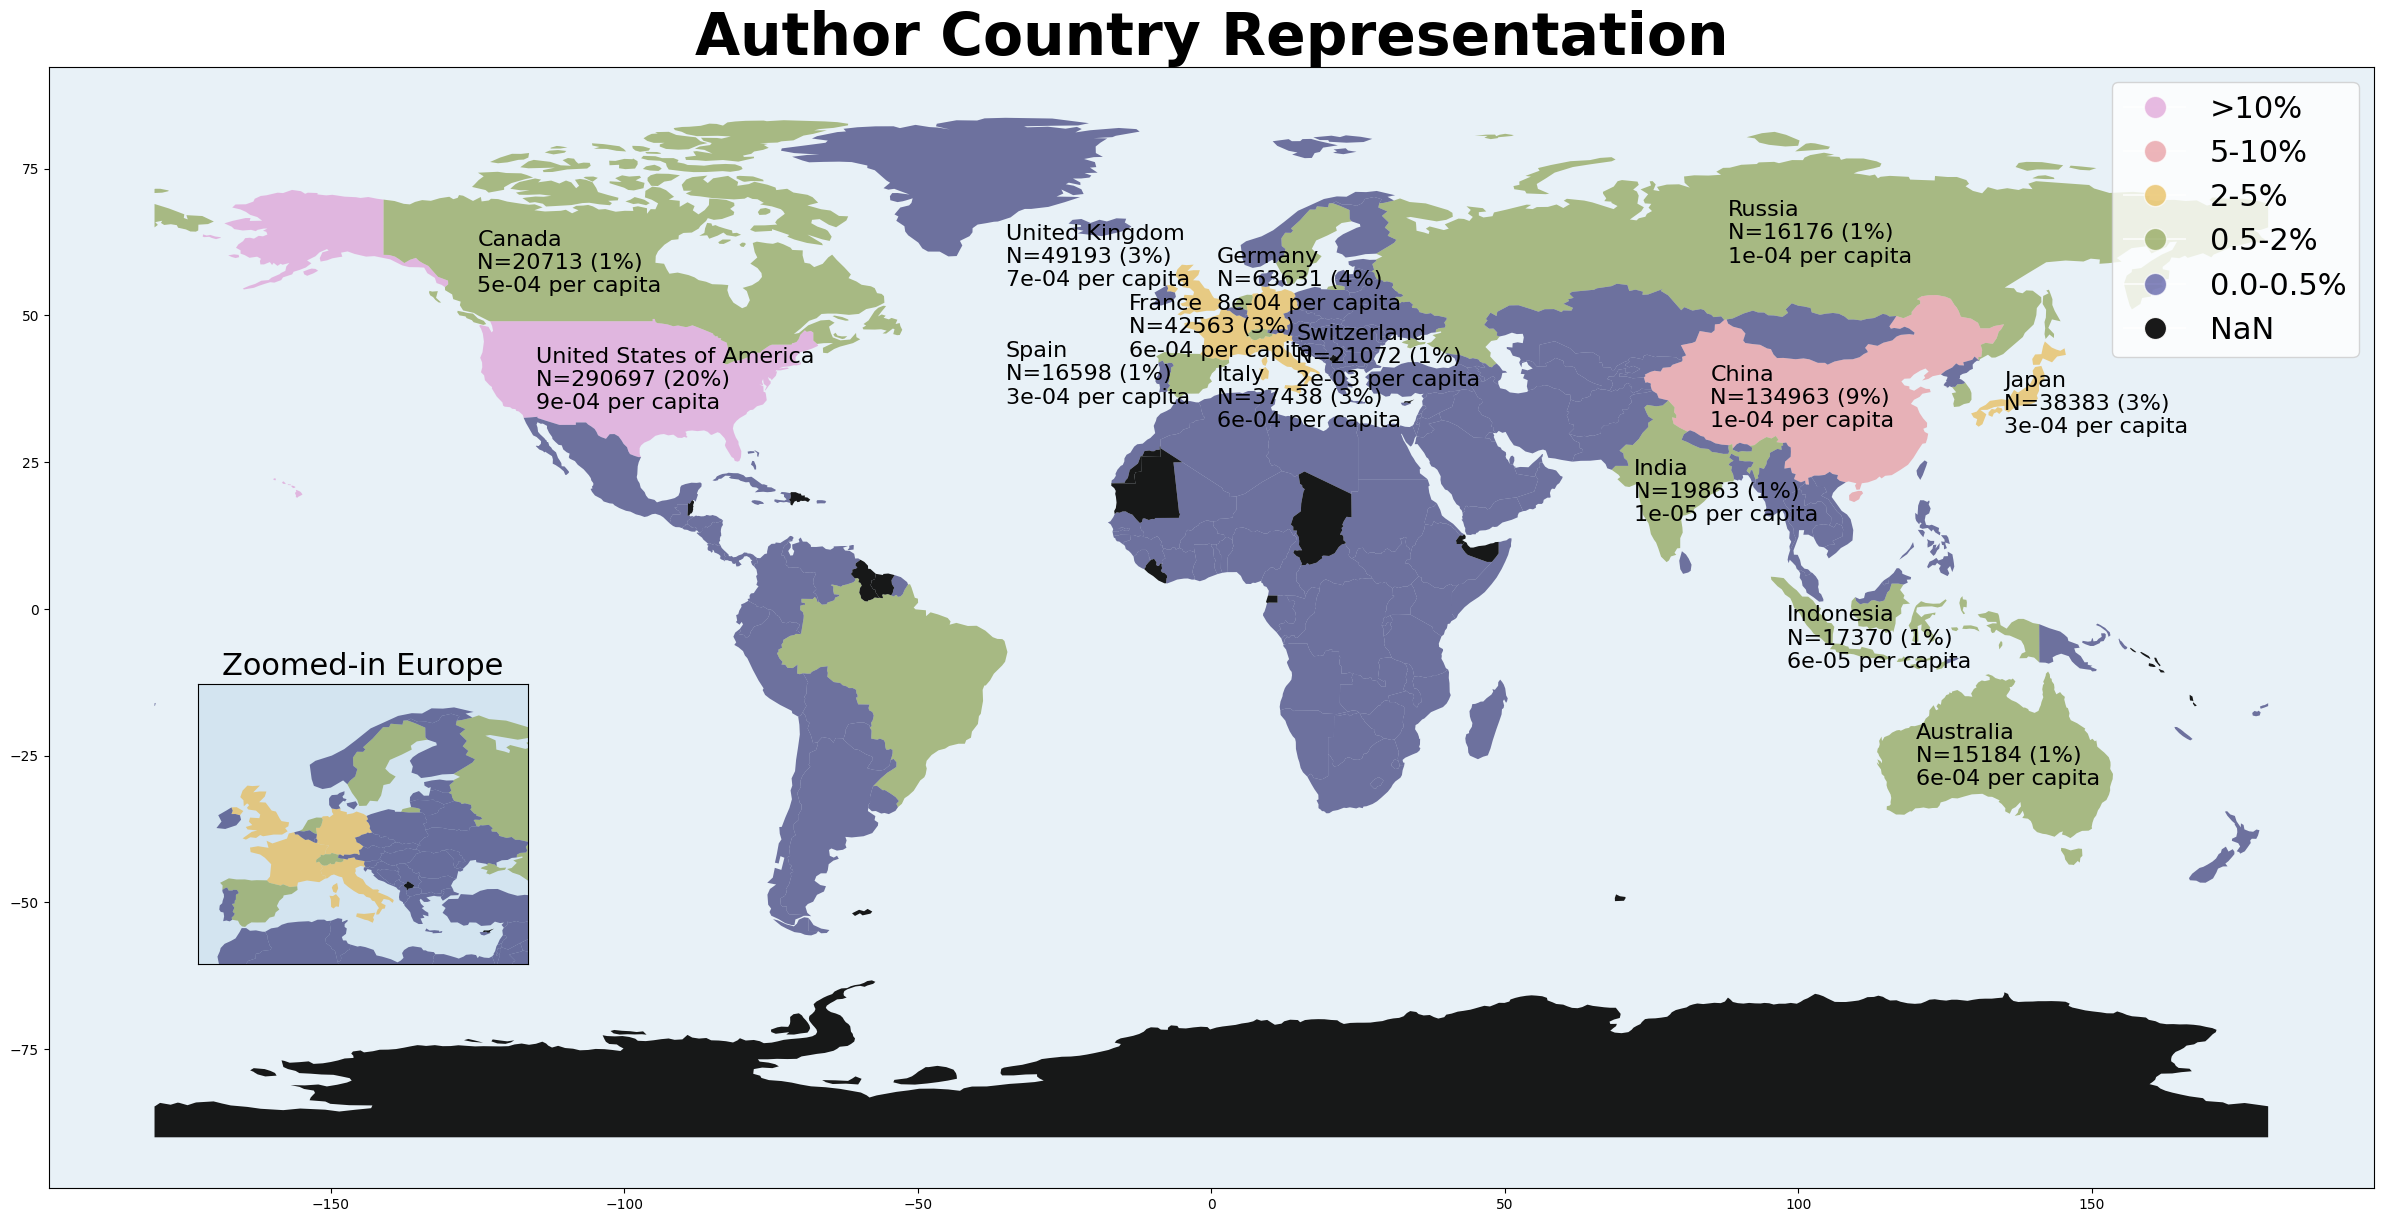

In [116]:

# Create a grid for the subplots
fig, (ax_main) = plt.subplots(figsize=(30, 25))

# Main plot
mergeworld_update.plot(column='proportion',
                scheme='natural_breaks',
                cmap='tab20b', 
                alpha=0.7,
                ax=ax_main,
                missing_kwds={'color': 'k', 'alpha':0.9}, 
                legend=False)

ax_main.set_title('Author Country Representation', fontsize=42, weight='bold')
ax_main.legend(handles=legend_elements, loc='upper right', fontsize=22)

# Add countries names and numbers for most appearing countries 
for i in range(len(mergeworld_update[mergeworld_update['proportion'] >= 1])):
    text_to_display = "{}\n{}\n{}".format(
        mergeworld_update.map_name[i],
        f'N={round(mergeworld_update.proportion_count[i])} ({round(mergeworld_update.proportion[i])}%)',
        f'{mergeworld_update.per_capita[i]:.0e} per capita'
    )
    
    ax_main.text(
        float(mergeworld_update.longitude[i]),
        float(mergeworld_update.latitude[i]),
        text_to_display,
        size=16,
        #color=purd_colors[8]
    )



# Europe subplot
#divider = make_axes_locatable(ax_main)
ax_europe = ax_main.inset_axes([0.01,0.2, 0.25, 0.25])
#cax = divider.append_axes("right", size="5%", pad=0.1)
mergeworld_update.plot(column='proportion',
                                                      scheme='natural_breaks',
                                                      cmap='tab20b',
                                                      alpha=0.7,
                                                      ax=ax_europe,
                                                      #cax=None,
                                                      missing_kwds={'color': 'k', 'alpha': 0.9},
                                                      legend=False)

# Set custom limits for the axes in the ax_europe subplot
ax_europe.set_xlim(-13, 40)
ax_europe.set_ylim(30, 75)
ax_main.set_facecolor('tab:blue')
ax_main.patch.set_alpha(0.1)
ax_europe.set_facecolor('tab:blue')
ax_europe.patch.set_alpha(0.1)
ax_europe.set_title('Zoomed-in Europe', fontsize=22) #, weight='bold')
ax_europe.set_xticks([])
ax_europe.set_yticks([])

save_name = 'article_author_data_final_worldmap'
save_path = f'Plots/{date.today()}/{save_name}'
plt.savefig(save_path)

plt.show()


In [113]:
mergeworld_update.groupby('continent')['proportion_count'].sum()

continent
Africa                       8418.0
Antarctica                      0.0
Asia                       261494.0
Europe                     333440.0
North America              315979.0
Oceania                     16749.0
Seven seas (open ocean)         0.0
South America               16065.0
Name: proportion_count, dtype: float64

In [115]:
mergeworld_update.groupby('continent')['proportion'].sum()

continent
Africa                      0.571913
Antarctica                  0.000000
Asia                       17.765709
Europe                     22.653667
North America              21.467379
Oceania                     1.137915
Seven seas (open ocean)     0.000000
South America               1.091444
Name: proportion, dtype: float64

# Topic Model 

In [1355]:
text_data=article_author_data_final.drop_duplicates(subset=['article_id'], keep='first')[['article_id', 'journal_name', 'title', 'abstract']]

KeyboardInterrupt: 

## Text preparation

In [ ]:
#create new column to clean abstract text 
text_data['abstract_clean']=text_data['abstract']

### Links

In [ ]:
#let's first check the cases of links in the abstract
links_abstract=[]

for abstract in text_data['abstract_clean']:
    if 'https' in abstract:
        links_abstract.append(abstract)
        

In [ ]:
len(links_abstract)

In [ ]:
def remove_links(text):
    # Define a pattern to match URLs
    url_pattern = re.compile(r'https?://\S+')

    # Use the pattern to find all URLs in the text
    matches = re.findall(url_pattern, text)

    # Replace each URL with an empty string
    for match in matches:
        text = text.replace(match, '')

    return text


In [ ]:
text_data['abstract_clean'] = text_data['abstract_clean'].apply(remove_links)


In [ ]:
#let's check number of links after the update 
links_abstract_updated=[]

for abstract in text_data['abstract_clean']:
    if 'https' in abstract:
        links_abstract_updated.append(abstract)
        

In [ ]:
len(links_abstract_updated)

### Copyright

In [ ]:
#let's check for copyright
copyright_abstract=[]

for abstract in text_data['abstract_clean']:
    if '©' in abstract:
        copyright_abstract.append(abstract)
        

In [ ]:
len(copyright_abstract)

In [ ]:
copyright_text_data=text_data['abstract_clean'][text_data['abstract_clean'].isin(copyright_abstract)]

In [ ]:
#we can now clean all abstract that include copyright but not at first few words
def clean_abstract_from_copyright(text):
    # Case-insensitive search for the first occurrence of "references"
    match = re.search(r'(?i)©', text)
    
    if match and match.start() > 20:
        # If a match is found and it's not the first word, remove everything from that point onward
        return text[:match.start()].strip()
    else:
        # If no match is found or it's the first word, return the original text
        return text

In [ ]:
text_data['abstract_clean'][text_data['abstract_clean'].isin(copyright_abstract)] = text_data['abstract_clean'][text_data['abstract_clean'].isin(copyright_abstract)].apply(clean_abstract_from_copyright)


In [ ]:
#let's check for copyright
copyright_abstract_clean=[]

for abstract in text_data['abstract_clean']:
    if '©' in abstract:
        copyright_abstract_clean.append(abstract)
        

In [ ]:
len(copyright_abstract_clean) #for the remaining we remove the introductory text

In [ ]:
#we remove the introductory text including copyright after investegating the above
def remove_introductory_text(text):
    # Check for the first occurrence of words (case-sensitive)
    match = re.search(r'\b(?:The|This|Many|String|Peter|We|There|Childbirth|Low|With|Improvements|It|NA62|GeN-FOAM|Prismatic|Refuges)\b', text)
    
    if match:
        # If there is a match, remove the part up to the match
        return text[match.start():].strip()
    else:
        # If no match, return an empty string
        return ''

In [ ]:
text_data['abstract_clean'][text_data['abstract_clean'].isin(copyright_abstract_clean)] = text_data['abstract_clean'][text_data['abstract_clean'].isin(copyright_abstract_clean)].apply(remove_introductory_text)


In [ ]:
#let's check for copyright final
copyright_abstract_final=[]

for abstract in text_data['abstract_clean']:
    if '©' in abstract:
        copyright_abstract_final.append(abstract)
        

In [ ]:
len(copyright_abstract_final)

### Latex

In [ ]:

def find_latex_matches(text):
    # Find $$ and their content
    matches = re.search(r'\$\$.*?\$\$', text) or re.search(r'\$.*?\$', text)

    # Find LaTeX commands like \text or \text{}
    matches = matches or re.search(r'\\[a-zA-Z]+\*?(\{.*?\})?', text)

    # Find references like [210]
    matches = matches or re.search(r'\[.*?\]', text)

    return bool(matches)



In [ ]:
# Apply the function to filter rows
latex_abstract = text_data[text_data['abstract_clean'].apply(find_latex_matches)]


In [ ]:
len(latex_abstract)

In [ ]:
#strip text for latex commands and special characters 
def strip_latex(text):
    # Remove $$ and their content
    text = re.sub(r'\$\$.*?\$\$', '', text)
    text = re.sub(r'\$.*?\$', '', text)


    # Remove LaTeX commands like \text or \text{}
    text = re.sub(r'\\[a-zA-Z]+\*?(\{.*?\})?', '', text)

    # Remove leftover $ (if any)
    text = text.replace('$', '')

    # remove refrencee e.g. [210]
    text = re.sub(r'\[.*?\]', '', text)

    return text


In [ ]:
text_data['abstract_clean'][text_data['abstract_clean'].isin(latex_abstract['abstract_clean'])]=text_data['abstract_clean'][text_data['abstract_clean'].isin(latex_abstract['abstract_clean'])].apply(strip_latex)


### Chinese text

In [ ]:

def find_chinese_text(text):
    # Define a regular expression pattern to match Chinese characters
    chinese_pattern = re.compile(r'[\u4e00-\u9fff]+')

    # Find all occurrences of Chinese text
    matches = re.findall(chinese_pattern, text)

    return bool(matches)


In [ ]:
chinese_examples = text_data['abstract_clean'].apply(find_chinese_text)

In [ ]:
len(chinese_examples)

In [ ]:

def strip_chinese(text):
    # Define a regular expression pattern to match Chinese characters
    chinese_pattern = re.compile(r'[\u4e00-\u9fff]+')

    # Replace all occurrences of Chinese text with an empty string
    stripped_text = re.sub(chinese_pattern, '', text)

    return stripped_text


In [ ]:
text_data['abstract_clean'][chinese_examples==True]=text_data['abstract_clean'][chinese_examples==True].apply(strip_chinese) 
#should we just apply to all?

## Costum stopwords

In [ ]:
institution_names=article_author_data_final.institution_name.unique().tolist()
institution_names.remove('unknown')

In [ ]:
split_inst_name=institution_names.copy()
#split list into each name element separated by - , . or space 
split_pattern = re.compile(r'[-\,\.\s]+')
split_inst_name = [name for split_inst_name in map(split_pattern.split, split_inst_name) for name in split_inst_name]
#remove names that are less than 2 characters 
places = [name for name in split_inst_name if len(name) >= 2]

In [ ]:
#get geogrphaic references from institution name places and use those as stopwords as well 

def extract_geographic_entities(data):
    entities = set()
    for text in data:
        places_geotext = GeoText(text)
        entities.update(map(str.lower, places_geotext.cities))
        entities.update(map(str.lower, places_geotext.countries))
    return list(set(entities))

# Extract geographic entities
geographic_places = extract_geographic_entities(places)


In [ ]:
author_name_list1=article_author_data_final['author.display_name'].dropna().unique().tolist() 
author_name_list2=article_author_data_final.raw_author_name.dropna().unique().tolist() 


In [ ]:
#conc list 1 and 2 and then remove duplicates to have each name ones 
author_name_list=author_name_list1 + author_name_list2
author_name_list = set(author_name_list)
#get lowercase value of names 
author_name_list = [name.lower() for name in author_name_list]
#split list into each name element separated by , . or space 
split_pattern = re.compile(r'[,\.\s]+')
split_names = [name for name_set in map(split_pattern.split, author_name_list) for name in name_set]
#remove names that are less than 2 characters 
author_names = [name for name in split_names if len(name) >= 2]



In [ ]:
months= ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]


In [ ]:
custom_stopwords = set(["article", "paper", "articles", "papers", "abstract", "vol" "iss", "Volume", "issue", "issn",
                        "introduction", "objective", "aim", "method", "methodology", "results", "conclusion", "discussion",
                       "views", "icon", "review", "share", "twitter", "facebook", "reddit", "linkedin", "reprints", "cite", 
                        "citation", "citations", "citing", "cite", "previews", "next", "https", "url", "isbn", "doi", "author", "authors",
                        "department", "research", "physics", "contents", "figures", "tables", "video", "audio", "supplementary", "peer", 
                        "tools", "icon", "download", "manager", "easybib", "bookends", "mendeley", "papers", "endnote", "refworks", 
                        "bibtex", "latex", "toolbar", "dropdown","menu", "auto", "suggest", "content", "AIP", "publishing", "portfoliothe",
                        "published", "portfolio", "journal", "pages", "reprint", "permission", "reference", "references", "contentaip",
                       "accepted", "bookend", "permission", "permissions", "crossreference", "crossref", "crossrefs", "text",
                       "british", "american", "canadian", "glasgowsearch", "aboutpdf", "toolsrequest", "citationadd", "favoritestrack",
                       "accessplease", "access", "accessshare", "pdfpdf", "shareshar", "share", "authorref", "authorrefs", 
                        "term", "condition", "useshare", "linkus", "version", "friend", "colleague", "linkshare", "school", "college",
                       "inredditwechat", "literature", "note", "ottawasearch", "favoritestrack", "give", "onlin", "publish", "published",
                       "annals", "academy", "sciencesvolume", "read", "accept", "useshareable", "linkuse", "link", "share", #added from first result
                       "friends", "colleagues", "copy", "conference", "symposium", "contentamerican", "contentamericans", "zotero",
                       "scholar", "google", "href", "xmln", "xlink", "penelitian", "pembelajaran", "belajar", "dalam", "menggunakan",
                       "adalah", "analisi","peserta", "email", "providedcopi", "providedcopy", "addressthe", "addressth", "preprint",
                       "preprints", "submit", "accessy", "preprintopen", "duchess", "gloucest", "cockcroft", "slash", "linkop",
                       "lwfa", "tion", "msub", "msup", "xmln", "cdata", "msubsup", "inline", "mtext", "mathvari", "punjab", "dinfo",
                       "epub", "inredditemail", "fareast", "tstyle", "bidi", "citationstracking", "citationstrack", "citationstracker", "citationstracked",
                        "toolsadd", "shareshare", "lwfa", "tute", "ture", "shanxi", "banara", "providedcopy", "addressthe", "adalah", "menggunakan",
                       "peserta", "bahwa", "cdata", "xlink", #added from second result 
                       "calibri", "ascii", "pagin", "msonormalt", "noshow", "rowband", "colband", "xmln", "italic", "contentphysics", "contentphys",
                       "texatom", "today", "terhadap", "digunakan", "metod", "methode", "metode", "dapat", "submit", "accessy", "esse", "universityid",
                       "preliminary", "preliminari", "ensino", "estudiant", "trabajo", "sobre", "est", "aprendizaj", "esta", "resultado", "ensenanza",
                     #third
                        "entre", "olarak", "anahtar", "kelimel", "onemli", "ogrencilerin", "calismada", "ozet", "icin", "arastirma", "eld",
                       "untuk", "yaitu", "menunjukkan", "sebesar", "bertujuan", "eksperiment", "pengembangan", "estudiante", "alttext",
                       "script", "mathvariant", "mathvari", "overflow", "scroll", "submit", "submitted", "portfolioaip", "also",
                       "ffmt", "amtx", "aofi", "akev", "xref", "url_ctx_fmt", "plusful", "citationtrack", "citationtracks", "citationtracking",
                       "articlenext"]) 




custom_stopwords.update(institution_names)
custom_stopwords.update(geographic_places)
custom_stopwords.update(author_names)
custom_stopwords.update(months)

## Text preprocessing 

In [ ]:
#save and load clean abstracts 
text_data.to_csv(f'Data backup/text_data{str(date.today())}') #2024-04-02

In [ ]:
text_data=pd.read_csv(f'Data backup/April/text_data2024-04-02') #2024-04-02

In [ ]:
len(article_author_data_final.drop_duplicates(subset=['article_id'], keep='first'))

In [ ]:
len(text_data)

In [ ]:
# Load NLTK's WordNet Lemmatizer
wn_lemmatizer = WordNetLemmatizer()

# Update NLTK's English stopwords with your custom stopwords
nltk_stopwords = set(stopwords.words('english'))
nltk_stopwords.update(custom_stopwords)

# Initialize the Porter stemmer
porter_stemmer = PorterStemmer()

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        lowercase_token = token.lower()
        if lowercase_token not in nltk_stopwords and len(lowercase_token) > 3:
            # Lemmatize the token
            lemma_token = wn_lemmatizer.lemmatize(lowercase_token)
            # Stem the lemma token
            stemmed_token = porter_stemmer.stem(lemma_token)
            result.append(stemmed_token)
    return result


In [ ]:
text_abstract=text_data['abstract_clean'].reset_index() #do we have to reset index? 

In [ ]:
documents=text_abstract

In [ ]:
%%time
#apply preprocessing function on to all documents to get lemmatized docs 
processed_docs = documents['abstract_clean'].dropna().map(preprocess)

In [ ]:
#check if there are any processed docs that are empty or less than 3 words 
any_empty = processed_docs.apply(lambda x: len(x) <= 3)
print("Empty documents:", len(any_empty[any_empty==True]))



In [ ]:
#remove the empty documents 
processed_docs=processed_docs[~any_empty==True] #don't know if we should reset index though 


In [ ]:
#check if there are any processed docs that are empty 
any_empty = processed_docs.apply(lambda x: len(x) <= 3)
print("Empty documents:", len(any_empty[any_empty==True]))

In [ ]:
#save and load clean abstracts 
processed_docs.to_csv(f'Data backup/processed_docs{str(date.today())}') #2024-04-02

In [ ]:
processed_docs=pd.read_csv(f'Data backup/April/processed_docs2024-04-02') #2024-04-02

In [ ]:
#create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.
dictionary = gensim.corpora.Dictionary(processed_docs)

In [ ]:
#Filter out tokens that appear in less than 15 documents (absolute number) or 
#more than 0.5 documents (fraction of total corpus size, not absolute number).
dictionary.filter_extremes(no_below=15, no_above=0.5) # maybe we wont to tune this part as well? 

In [ ]:
dictionary.save(f'Data backup/dictionary{str(date.today())}') 


In [ ]:
dictionary = corpora.Dictionary.load(f'Data backup/April/dictionary2024-04-02') #2024-04-02

In [ ]:
#create bow corpus 
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
#use TfidfModel
tfidf = models.TfidfModel(bow_corpus)

In [ ]:
#create final tfidf corpus for model training 
corpus_tfidf = tfidf[bow_corpus]

In [ ]:
#save and load corpus 
corpora.MmCorpus.serialize(f'Data backup/corpus_tfidf{str(date.today())}.mm', corpus_tfidf) #2024-04-02

In [ ]:
#loading the saved corpus
corpus_tfidf = corpora.MmCorpus(f'Data backup/April/corpus_tfidf2024-04-02.mm') #2024-04-02

## Run model 

In [ ]:
num_topics=20
random_seed=42
alpha=0.01
beta=1.00
workers=2
passes=5

In [ ]:
%%time

#Running LDA using TF-IDF
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, 
                                               alpha=alpha, eta=beta, random_state=random_seed, 
                                               passes=passes, workers=workers)


In [ ]:
# save model to disk
lda_model_tfidf.save(f'Data backup/lda_model_tfidf{str(date.today())}.model') #2024-04-02

In [ ]:
# later on, load trained model from file
lda_model_tfidf =  models.LdaModel.load(f'Data backup/April/lda_model_tfidf2024-04-02.model') #2024-04-02

In [ ]:
#show topic and its words 
for idx_abstract, topic_abstract in lda_model_tfidf.print_topics():
    print('Topic: {} Word: {}'.format(idx_abstract, topic_abstract))

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.save_html(vis, f'Plots/{date.today()}/topic_abstract_{num_topics}_topics_{passes}_passes.html')
vis


In [ ]:
topics = [
    "Undefined Topic 1", #Topic 0
    "Agricultural Physics", #Topic 1
    "Undefined Topic 2", #Topic 2
    "Undefined Topic 3", #Topic 3
    "Reactor Physics", #Topic 4
    "Particle Physics", #Topic 5
    "Fluid Dynamics", #Topic 6 
    "Electro Physics", #Topic 7
    "Undefined Topic 4", #Topic 8
    "Geophysics", #Topic 9
    "Astrophysics", #Topic 10
    "Materials Science", #Topic 11
    "Undefined Topic 5", #Topic 12
    "Medical Physics", #Topic 13
    "Quantum Physics", #Topic 14
    "Machine Learning and Neural Networks", #Topic 15
    "Undefined Topic 6", #Topic 16 
    "Mathematical Physics", #Topic 17 
    "Undefined Topic 7", #Topic 18 
    "Learning and Teaching" #Topic 19 
]

topics_tfidf['topic_label'] = topics

In [ ]:
topics_tfidf=topics_tfidf.rename(columns={0: "topic_index", 1: "topic_words"})
topics_tfidf

In [ ]:
#save and load clean abstracts 
topics_tfidf.to_csv(f'Data backup/topics_tfidf{str(date.today())}') #2024-04-13

## Topic Assignment 

In [ ]:
#create a function that calculates and returns the max score of each article per possible topic
def max_topic_score(corpus_tfidf, lda_model_tfidf, modelname=None):
    
    max_scores = {}

    for doc_index, doc in enumerate(corpus_tfidf):
        max_score = None
        max_index = None

        for index, score in sorted(lda_model_tfidf[doc], key=lambda tup: -1 * tup[1]):
            if max_score is None or score > max_score:
                max_score = score
                max_index = index

        # Store both the max score and its topic index in the dictionary 
        max_scores[doc_index] = {f'topic_max_score': max_score, f'topic_index': max_index}

    # Move the return statement outside the loop
    max_scores_df = pd.DataFrame(max_scores).T
    return max_scores_df


In [ ]:
max_scores=max_topic_score(corpus_tfidf, lda_model_tfidf)

In [ ]:
max_scores

In [ ]:
#define text dataset and reset index to match our corpus tfidf index
text_dataset=text_data.reset_index()
#take the same index of our text data as is in the processed docs (which the corpus is created from) to ensure we merge back on the matching article 
#when merging with max scores 
text_dataset=text_dataset.loc[text_dataset.index.isin(processed_docs.index)] #this is what we need 
#drop the old "index" column
text_dataset=text_dataset.drop(columns={'index'})

In [ ]:
len(text_dataset)-len(max_scores) #check that they are now the same length 
#they match in length so now we just need to match and merge on their index

In [ ]:
#reset index on text_dataset AGAIN to make it match with index of match score 
text_dataset=text_dataset.reset_index()
#drop the old "index" column AGAIN
text_dataset=text_dataset.drop(columns={'index'})

In [ ]:
#finally join our max scores and text data 
text_dataset=text_dataset.join(max_scores)

In [ ]:
#then merge with topic labels for max score per article 
text_dataset=pd.merge(text_dataset, topics_tfidf, on='topic_index')

In [ ]:
#save and load clean abstracts 
text_dataset.to_csv(f'Data backup/text_dataset{str(date.today())}') #2024-04-13

# Topics

In [ ]:
#HERTIL

Import topic model results from Analysis 3

In [1196]:
#save and load clean abstracts 
topics_tfidf=pd.read_csv(f'Data backup/topics_tfidf2024-04-13') #2024-04-13

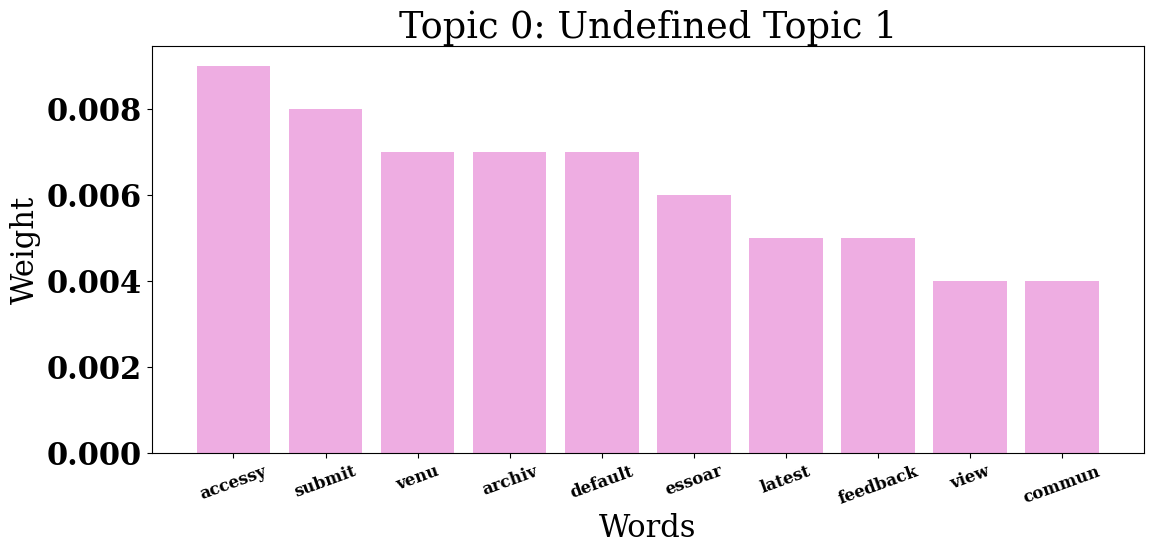

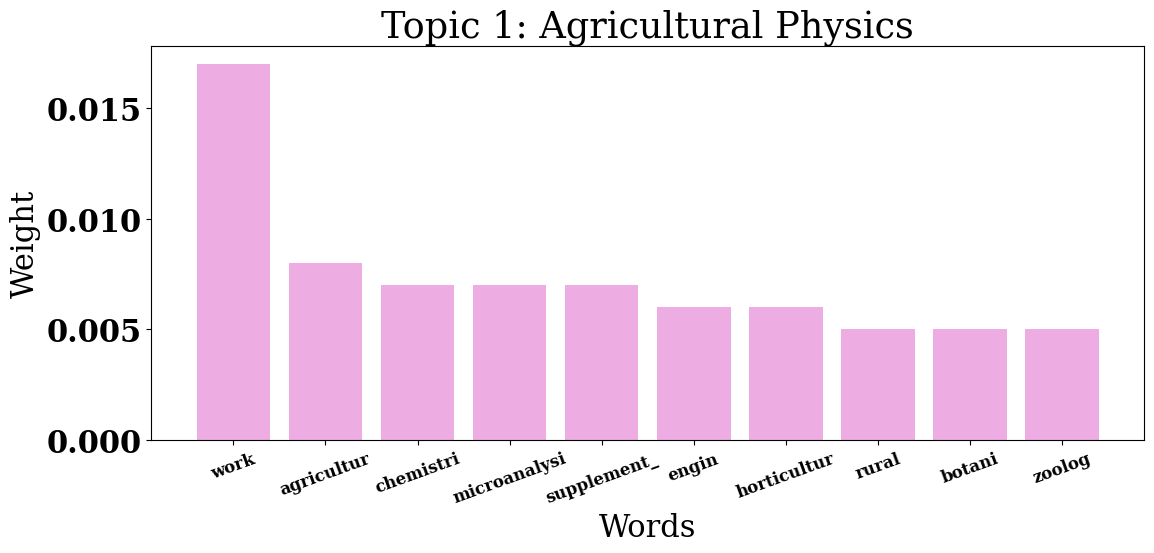

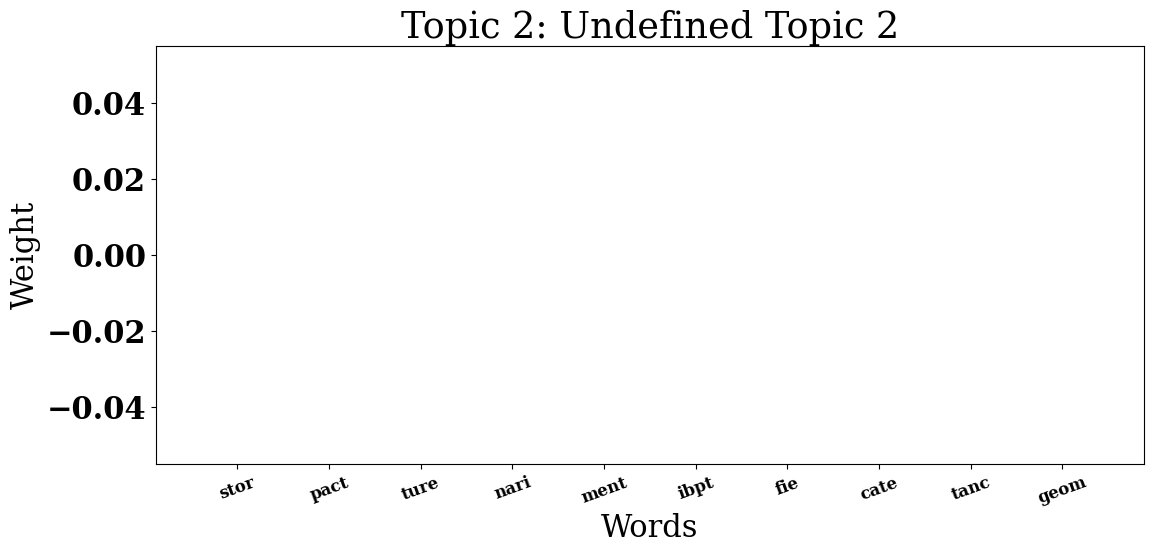

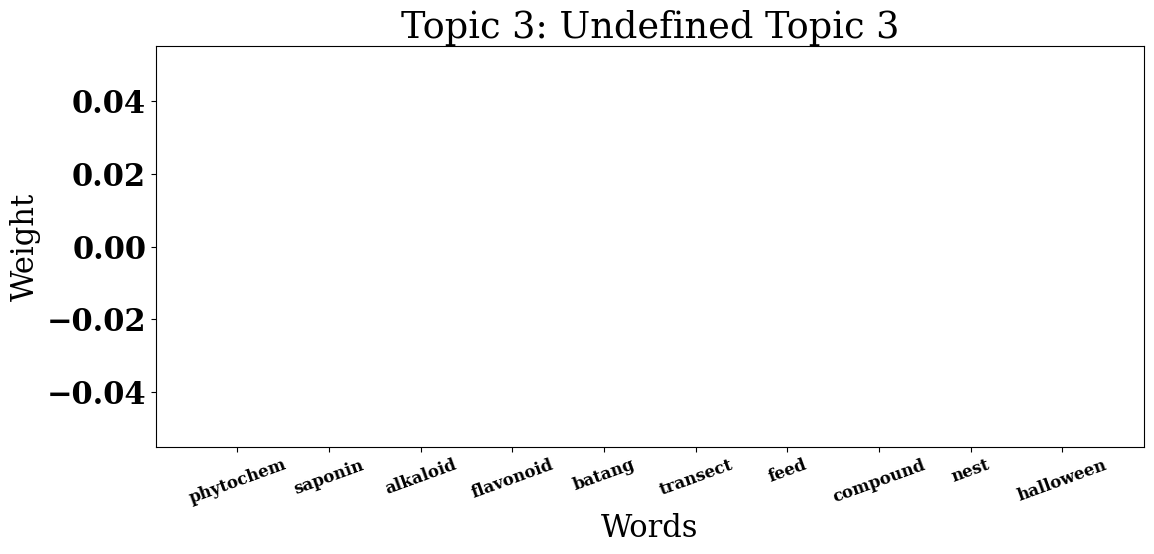

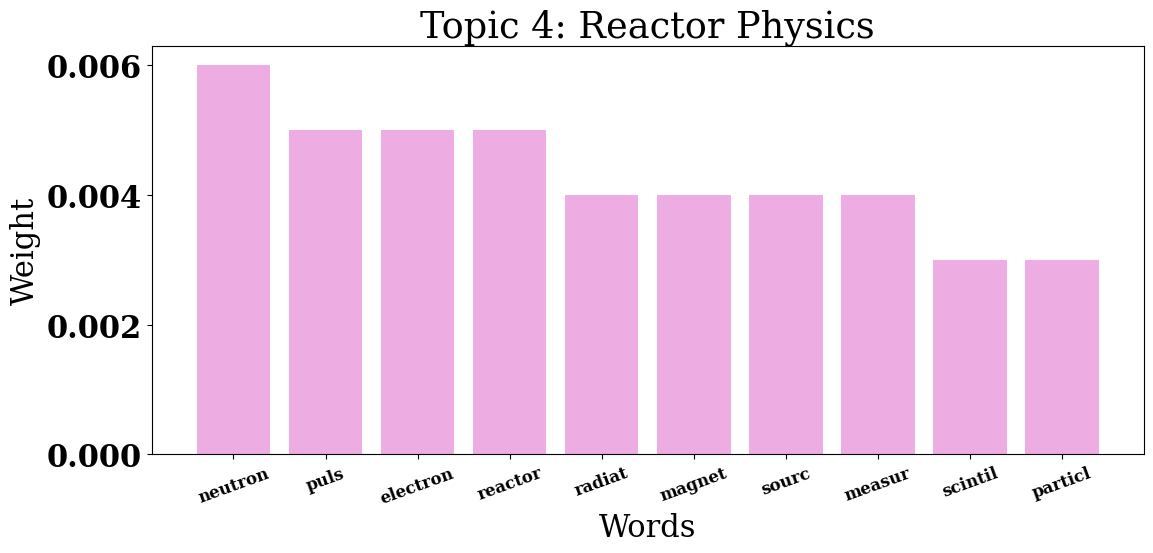

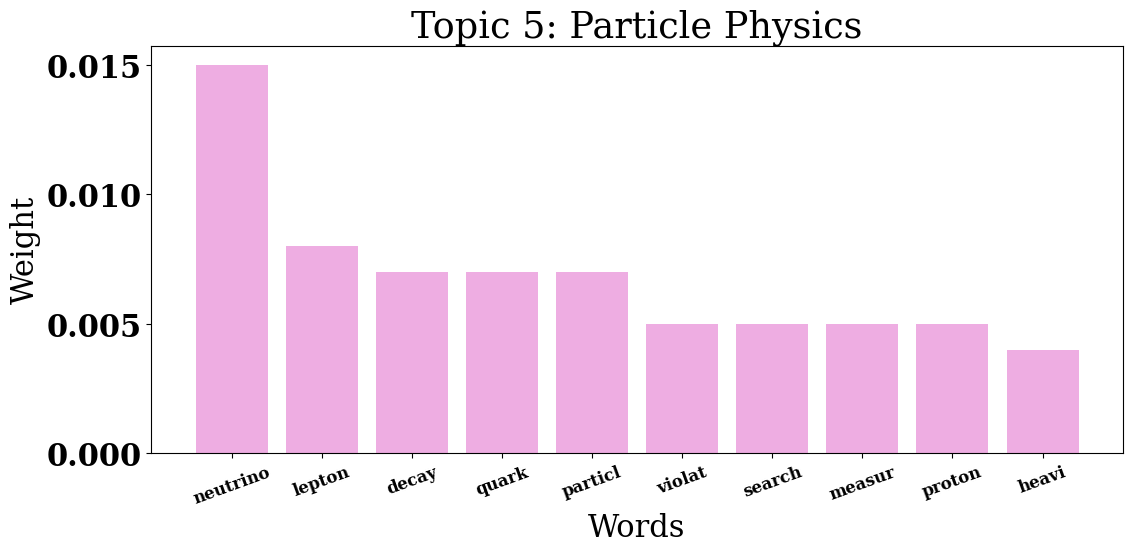

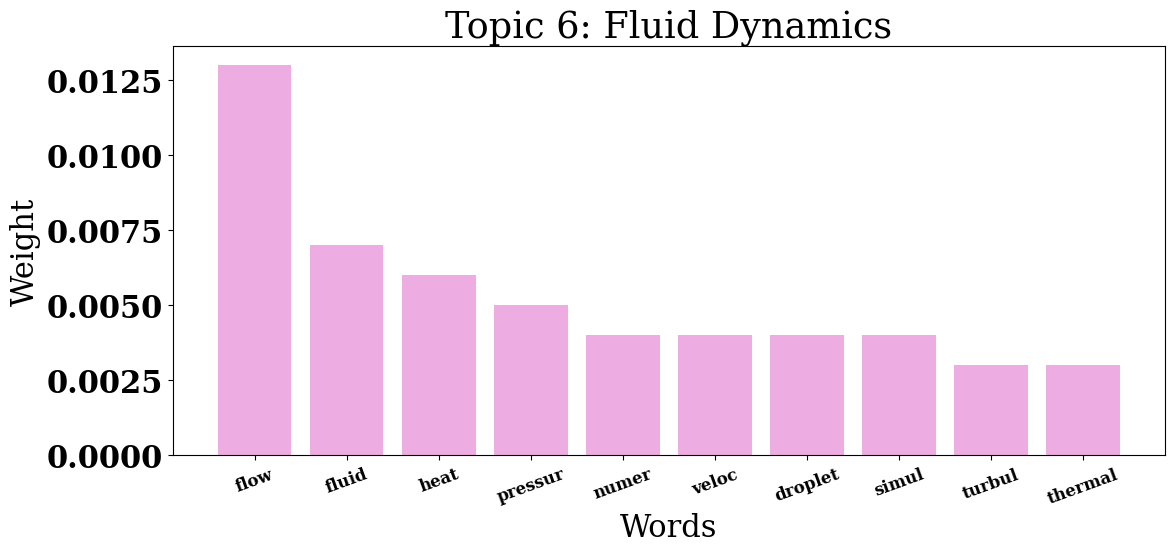

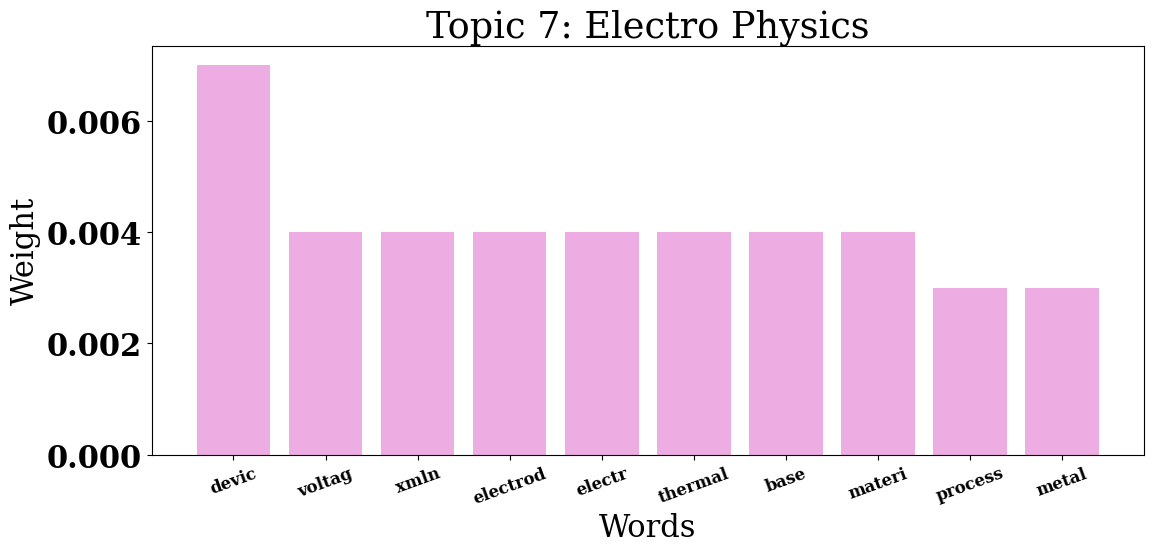

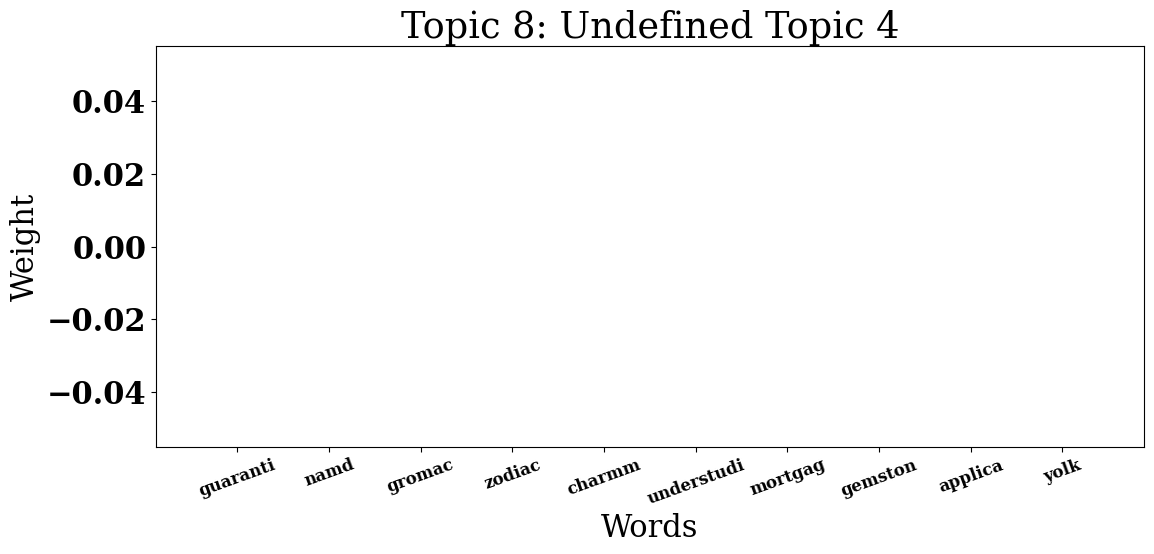

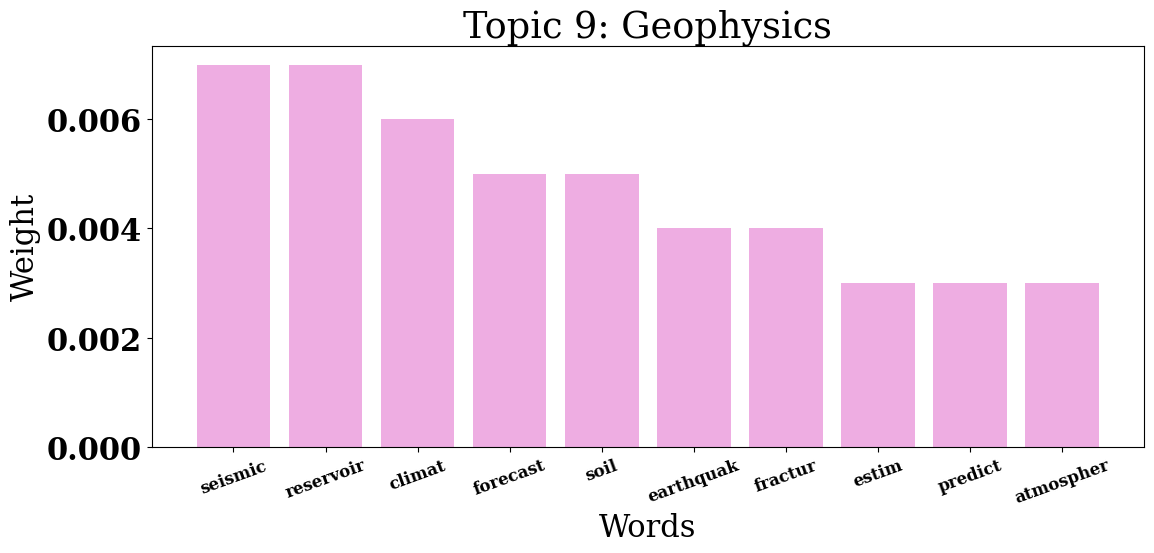

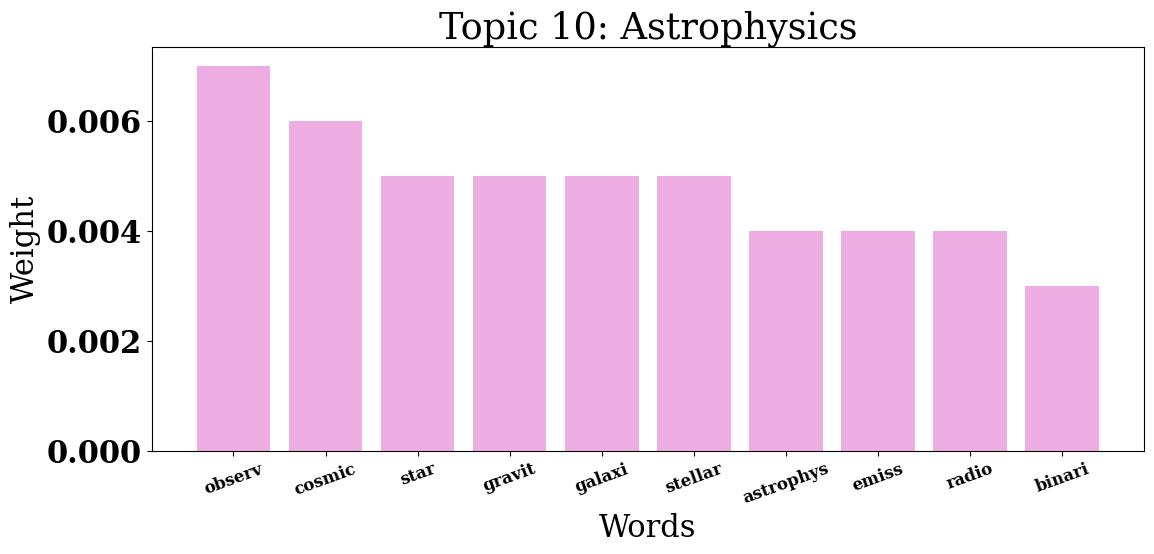

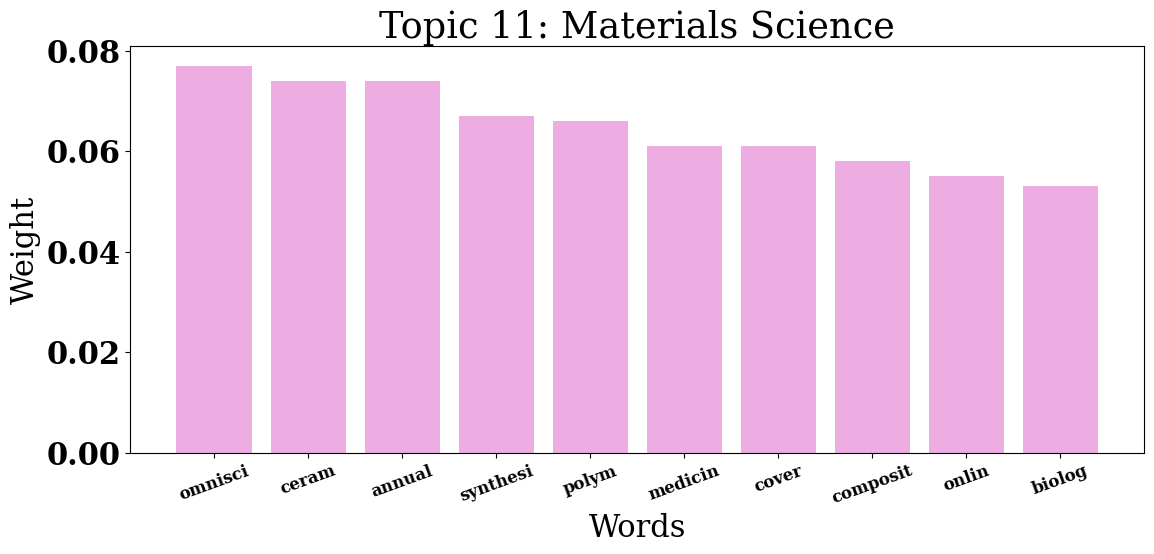

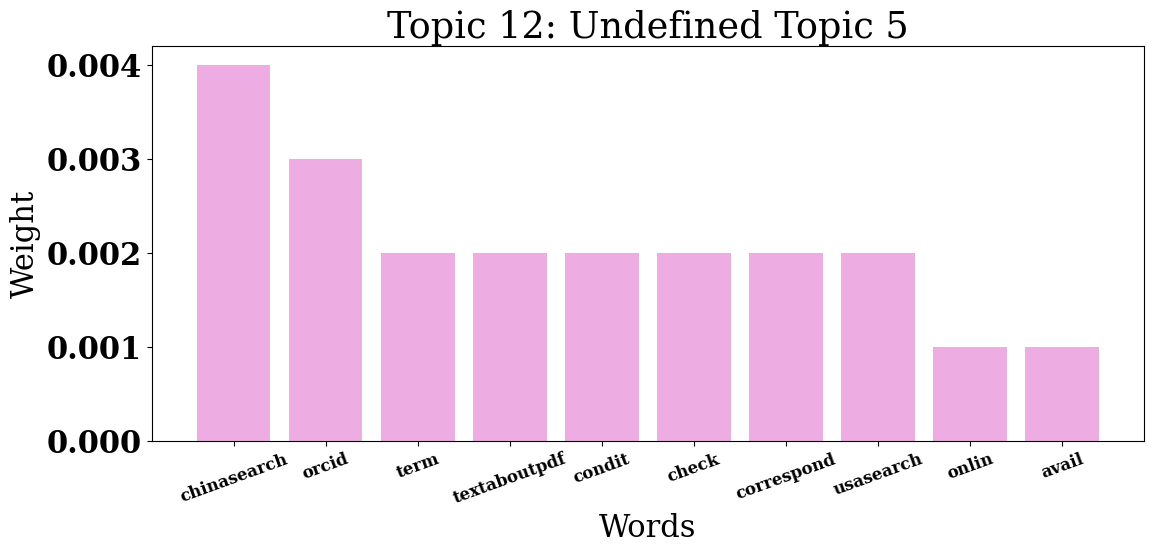

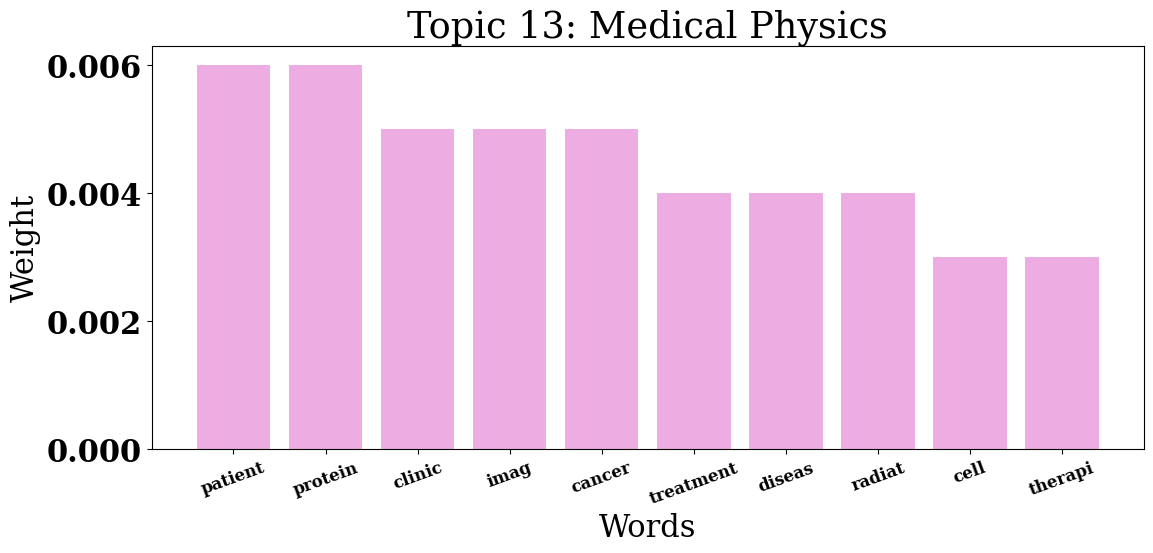

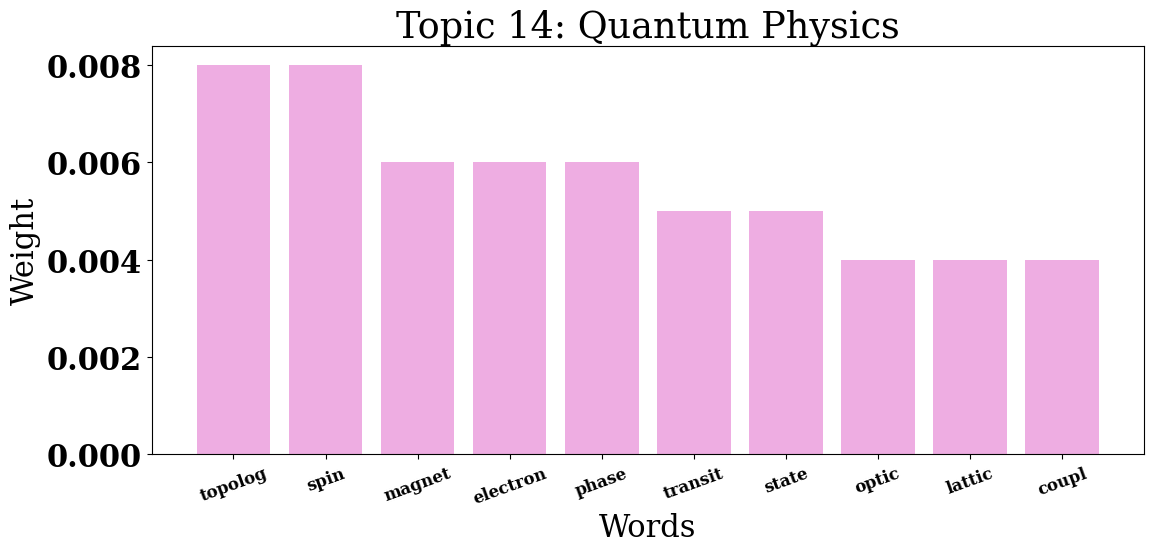

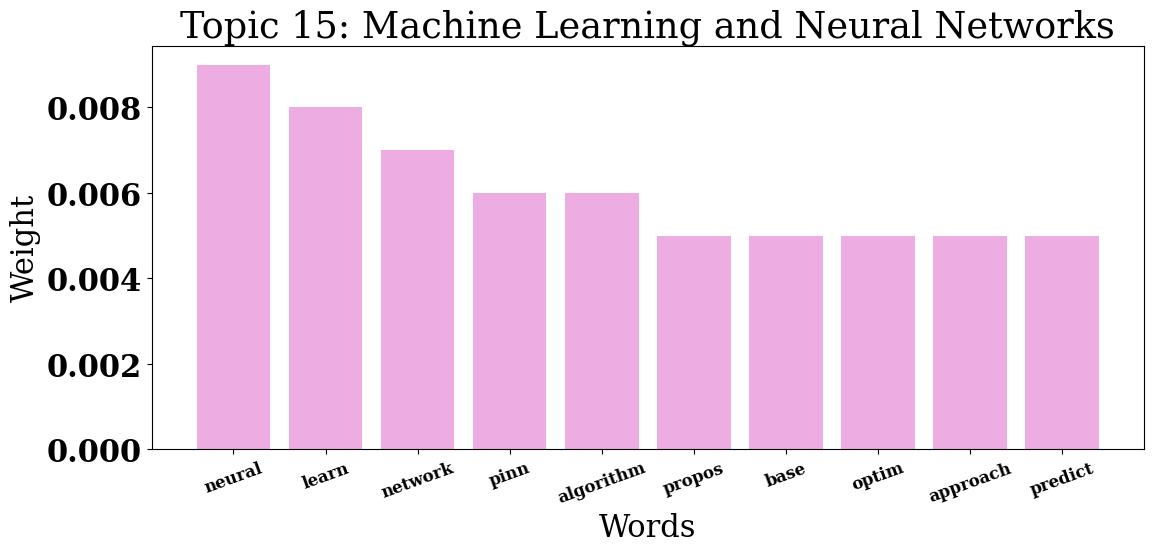

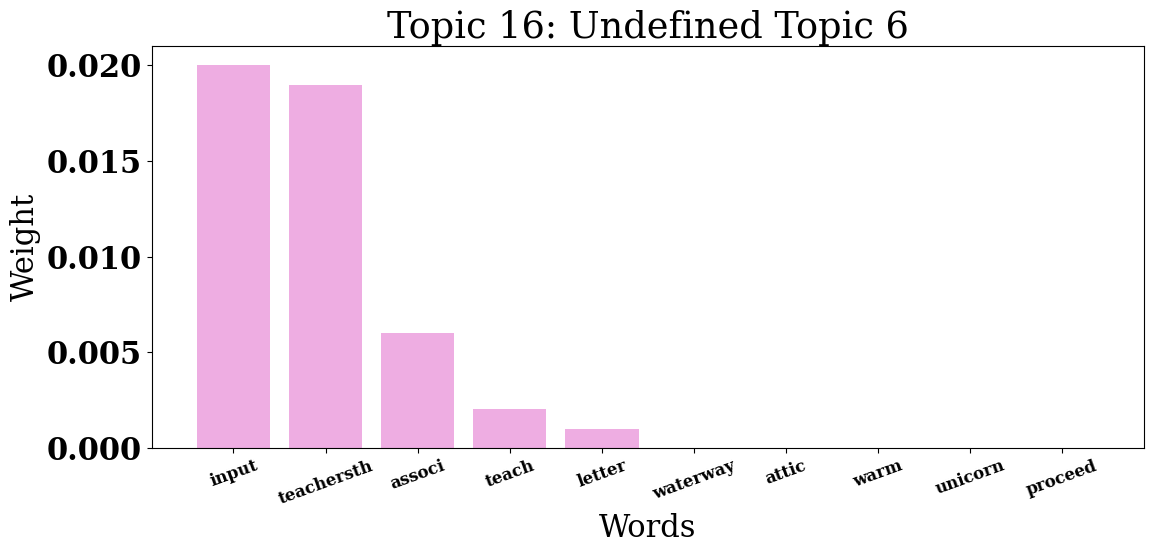

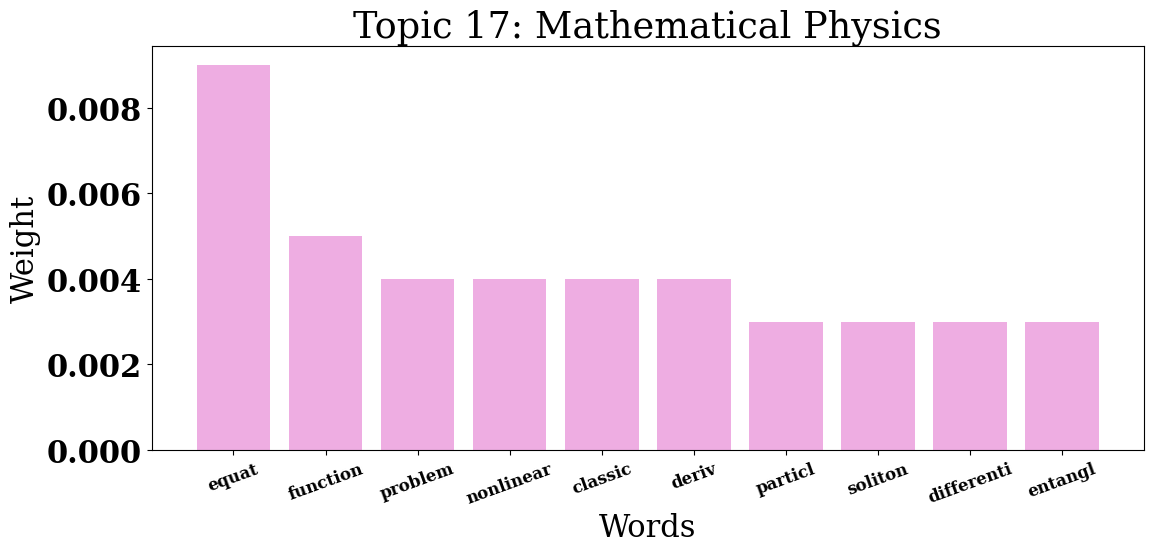

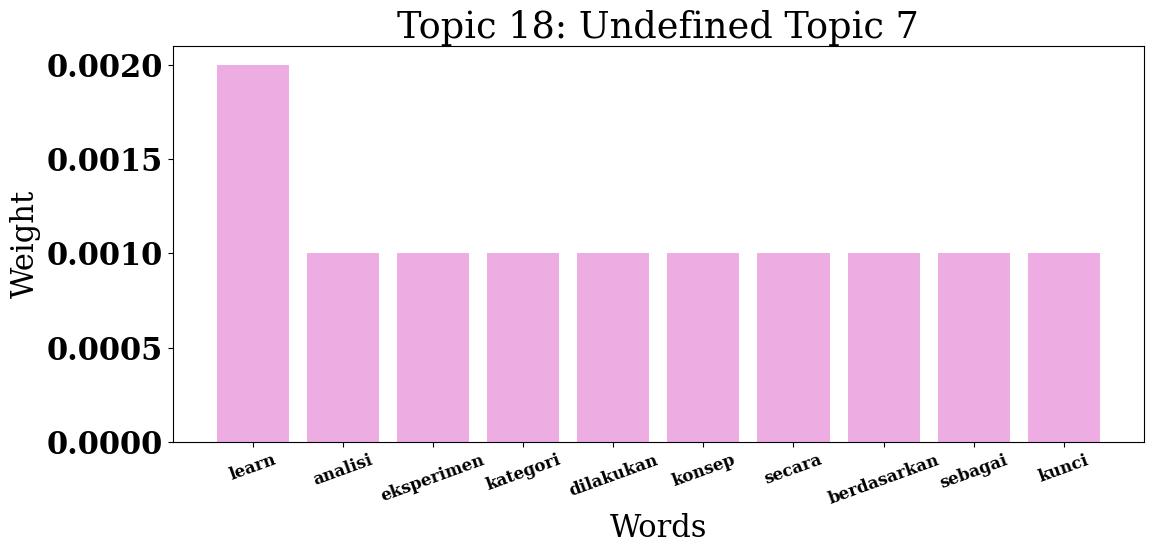

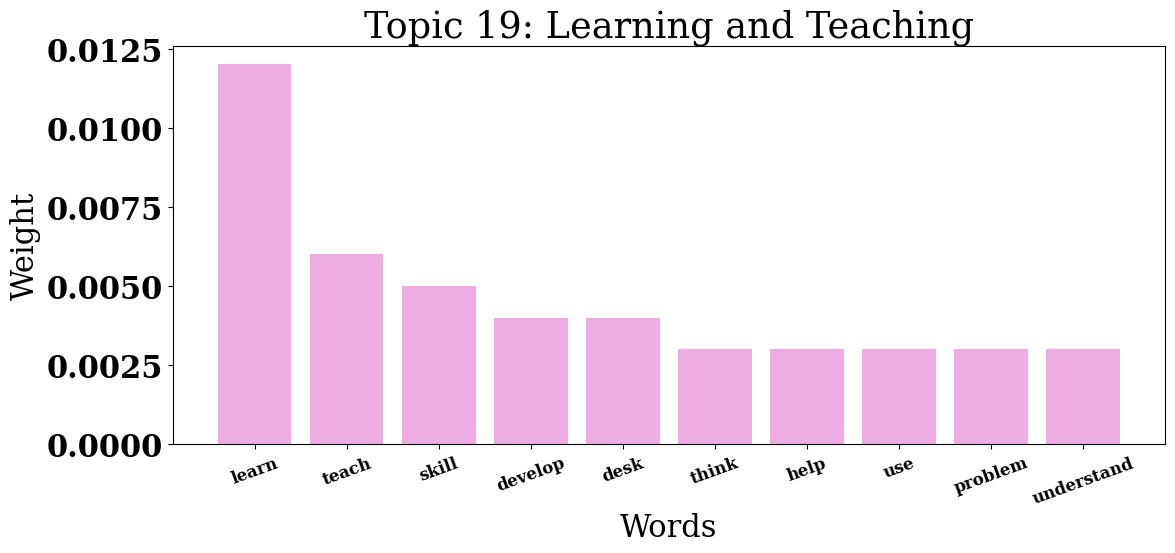

In [1200]:
#plot topic labels and their respective words and weight 
plot_topic_weights(topics_tfidf)

In [1201]:
#save and load clean abstracts 
text_dataset=pd.read_csv(f'Data backup/text_dataset2024-04-13') #2024-04-13

In [1224]:
#import fresh data 
with open('Data backup/April/topics_data_clean2024-04-02.pkl', 'rb') as f:
    topics_data_old = pickle.load(f)

In [1225]:
topics_article_id=list(topics_data_old.article_id.unique())

In [1226]:
text_dataset.head(5)

Unnamed: 0.1  Unnamed: 0                        article_id  \
0             0           0  https://openalex.org/W2149166552   
1             1          47  https://openalex.org/W1978654291   
2             2          57  https://openalex.org/W2033825842   
3             3          67  https://openalex.org/W2050336866   
4             4          85  https://openalex.org/W1985175865   

                          journal_name  \
0           The philosophical magazine   
1  Atomic Data and Nuclear Data Tables   
2      Journal of Mathematical Physics   
3     Review of Scientific Instruments   
4          Journal of Chemical Physics   

                                               title  \
0  Electrical resistance of disordered one-dimens...   
1  Spin–Lattice Relaxation in High-Resolution NMR...   
2  The energy gap law for non-radiative decay in ...   
3  Mixed crystal infrared study of chain segregat...   
4  A Spectroscopic Interpretation of Crystalline ...   

                                            abstract  \
0  (1970). Electrical resistance of disordered on...   
1  Views Icon Views Article contents Figures & ta...   
2  A general theory of non-radiative intramolecul...   
3  Journal of Polymer Science Part B: Polymer Let...   
4  physica status solidi (b)Volume 41, Issue 1 p....   

                                      abstract_clean  topic_max_score  \
0  (1970). Electrical resistance of disordered on...         0.563328   
1  Views Icon Views Article contents Figures & ta...         0.681445   
2  A general theory of non-radiative intramolecul...         0.969689   
3  Journal of Polymer Science Part B: Polymer Let...         0.947955   
4  physica status solidi (b)Volume 41, Issue 1 p....         0.495338   

   topic_index                                        topic_words  \
0         14.0  0.008*"topolog" + 0.008*"spin" + 0.006*"magnet...   
1         14.0  0.008*"topolog" + 0.008*"spin" + 0.006*"magnet...   
2         14.0  0.008*"topolog" + 0.008*"spin" + 0.006*"magnet...   
3         14.0  0.008*"topolog" + 0.008*"spin" + 0.006*"magnet...   
4         14.0  0.008*"topolog" + 0.008*"spin" + 0.006*"magnet...   

       topic_label  
0  Quantum Physics  
1  Quantum Physics  
2  Quantum Physics  
3  Quantum Physics  
4  Quantum Physics

In [1227]:
len(text_dataset)

467583

In [1228]:
#merge text_dataset with full dataset 
topics_data=pd.merge(article_author_data_final, text_dataset, on ='article_id', how='inner') 

In [1229]:
len(article_author_data_final)

1085099

In [1235]:
len(topics_data)-len(topics_data_old)

-370914

1448667

In [1204]:
short_names=topics_data.topic_index.value_counts().reset_index().topic_index.astype(str).tolist()

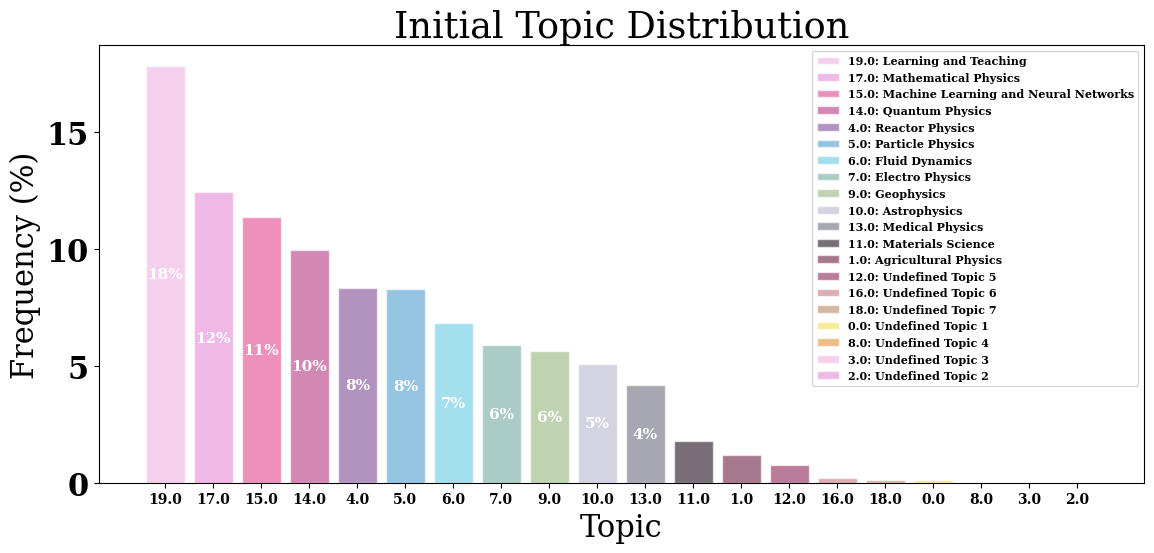

In [1206]:
cat_plot_short_names(topics_data.topic_label, title='Initial Topic Distribution', xlabel='Topic', ylabel='Frequency (%)', norm=True, multiply=100, font=None, rot=0, xmargins=None, save_name='initialtopicdist', legend_labels=None, short_names=short_names)



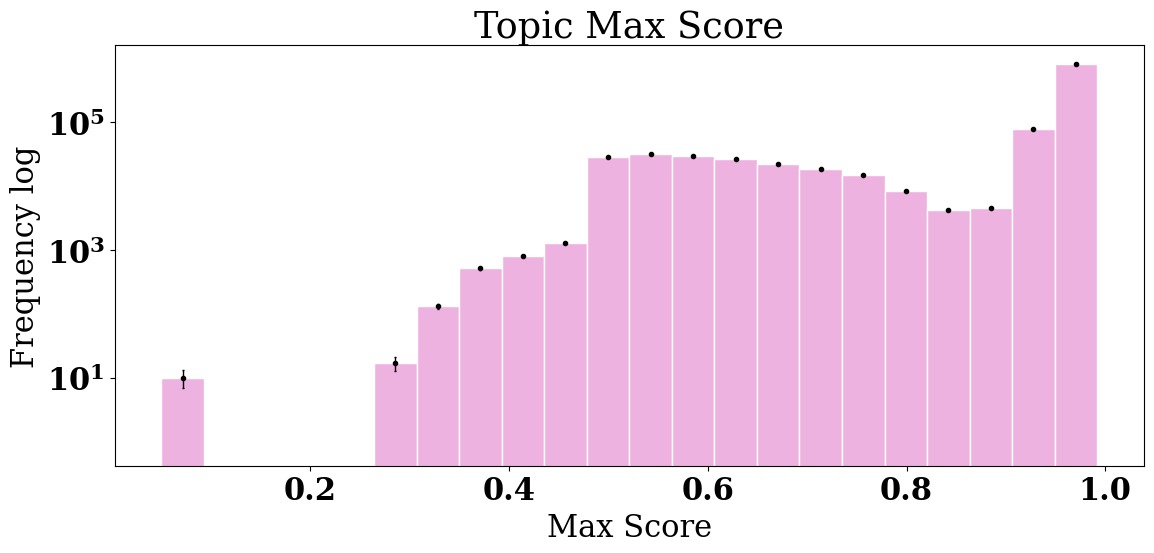

In [1207]:
#plot topic score distribution 
hist_plot([topics_data.topic_max_score], N_bins=None, log=True, title='Topic Max Score', xlabel='Max Score', ylabel='Frequency log', xmargins=None, save_name='topic_max_score', legend_labels=None, disp_legend=False)


## Clean Topics Data 

In [1210]:
topics_data_clean=topics_data.drop(topics_data.loc[topics_data['topic_label'].str.contains("Undefined")].index)


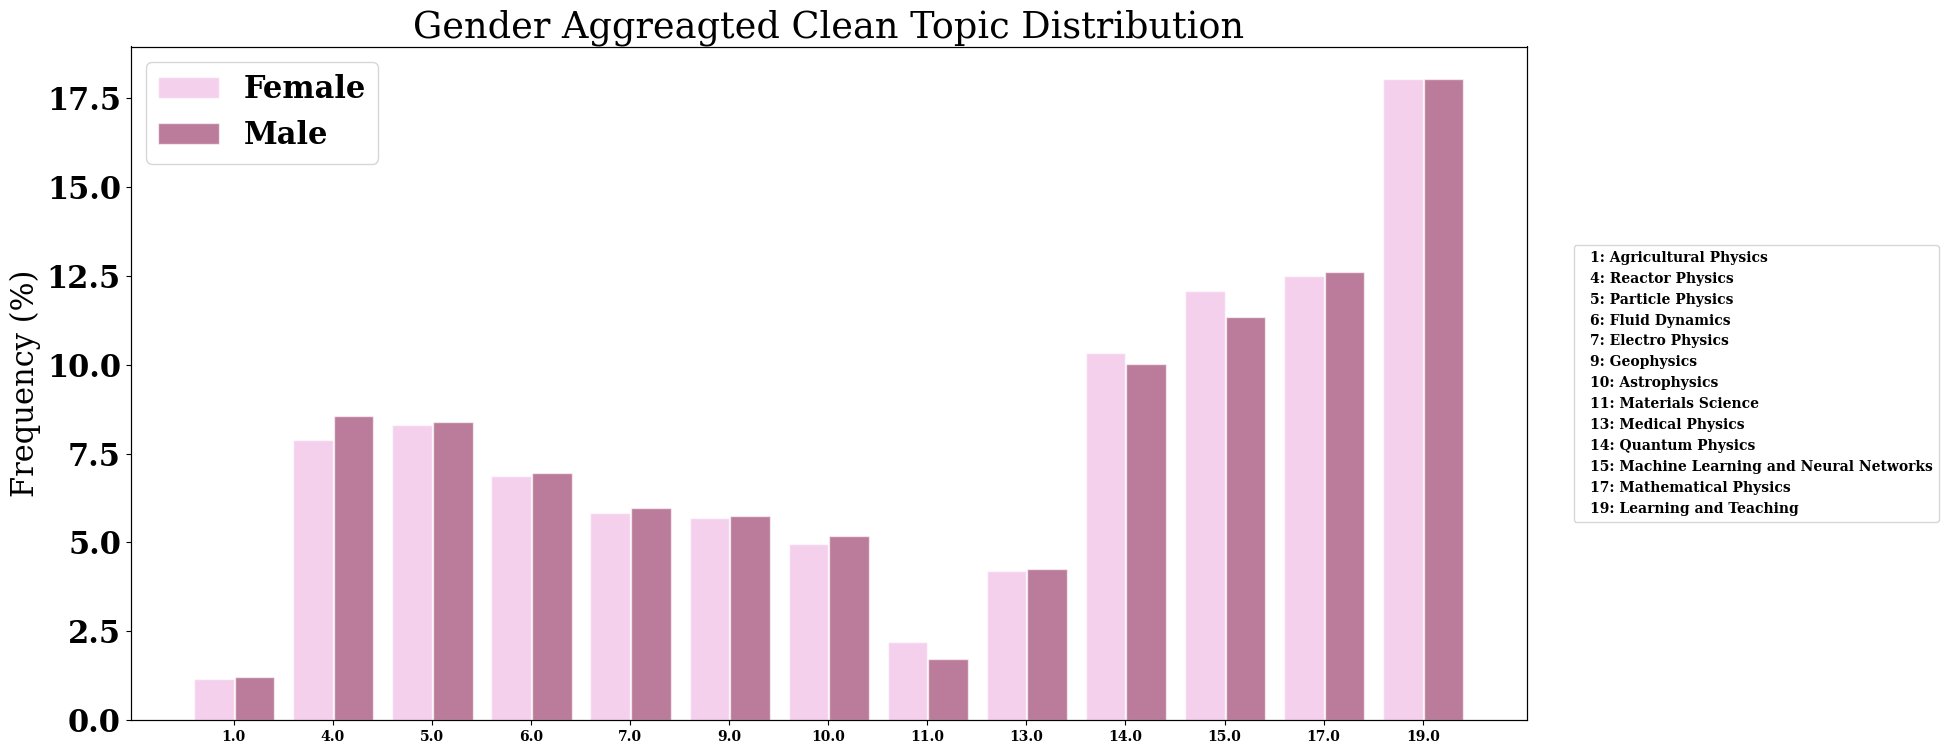

In [1216]:
cat_plot_compare_short_names(topics_data_clean['topic_index'][topics_data_clean.binary_gender=='female'], topics_data_clean['topic_index'][topics_data_clean.binary_gender=='male'], 
                             topics_tfidf[['topic_index', 'topic_label']], title='Gender Aggreagted Clean Topic Distribution', 
                             color1=color1, color2=color14, xlabel=None, ylabel='Frequency (%)', norm=True, multiply=100, 
                             font=None, rot=0, xmargins=None, ymargins=None, save_name='CleanTopicsGender', label1='Female', label2='Male')


In [1242]:
topics_data_clean['topic_index'].value_counts()

topic_index
19.0    192127
17.0    133915
15.0    122392
14.0    107344
4.0      89729
5.0      89267
6.0      73895
7.0      63306
9.0      60926
10.0     54659
13.0     45176
11.0     19335
1.0      12709
Name: count, dtype: int64

In [1249]:
len(topics_data_clean)

1064780

In [1247]:
37018/192127*100

19.267463708900884

In [1251]:
37018/1064780*100

3.476586712748173

In [1248]:
155109/192127*100

80.73253629109912

In [1244]:
topics_data_clean['topic_index'][topics_data_clean.binary_gender=='male'].value_counts()

topic_index
19.0    155109
17.0    108303
15.0     97599
14.0     86122
4.0      73544
5.0      72207
6.0      59817
7.0      51355
9.0      49270
10.0     44470
13.0     36558
11.0     14842
1.0      10355
Name: count, dtype: int64

In [1254]:
len(topics_data_clean[topics_data_clean.binary_gender=='female'])

205229

In [1256]:
len(topics_data_clean[topics_data_clean.binary_gender=='male'])

859551

In [1243]:
topics_data_clean['topic_index'][topics_data_clean.binary_gender=='female'].value_counts()

topic_index
19.0    37018
17.0    25612
15.0    24793
14.0    21222
5.0     17060
4.0     16185
6.0     14078
7.0     11951
9.0     11656
10.0    10189
13.0     8618
11.0     4493
1.0      2354
Name: count, dtype: int64

In [1222]:
topics_data_clean.binary_gender.value_counts(normalize=True).mul(100)

binary_gender
male      80.72569
female    19.27431
Name: proportion, dtype: float64

In [1236]:
topics_data_old['topic_index'][topics_data_old.binary_gender=='female'].value_counts(normalize=True).mul(100)

topic_index
19.0    21.398821
15.0    10.339682
14.0    10.277885
4.0      9.397656
13.0     7.826104
9.0      7.742704
10.0     7.488985
5.0      7.284502
17.0     5.869704
7.0      5.767714
6.0      4.707118
1.0      1.857425
11.0     0.041700
Name: proportion, dtype: float64

In [1238]:
topics_data_old.binary_gender.isna().sum()

413696

In [1239]:
topics_data_old_clean=topics_data_old[~topics_data_old.binary_gender.isna()]

In [1240]:
topics_data_old_clean['topic_index'][topics_data_old_clean.binary_gender=='female'].value_counts(normalize=True).mul(100)

topic_index
19.0    21.398821
15.0    10.339682
14.0    10.277885
4.0      9.397656
13.0     7.826104
9.0      7.742704
10.0     7.488985
5.0      7.284502
17.0     5.869704
7.0      5.767714
6.0      4.707118
1.0      1.857425
11.0     0.041700
Name: proportion, dtype: float64

In [1241]:
topics_data_old_clean['topic_index'][topics_data_old_clean.binary_gender=='male'].value_counts(normalize=True).mul(100)

topic_index
15.0    12.600188
4.0     12.141418
19.0    11.867233
14.0    11.520913
17.0     9.120479
5.0      8.795093
10.0     7.582674
6.0      6.764187
9.0      6.707603
7.0      5.962327
13.0     5.303781
1.0      1.613648
11.0     0.020456
Name: proportion, dtype: float64

In [1237]:
topics_data_old['topic_index'][topics_data_old.binary_gender=='male'].value_counts(normalize=True).mul(100)

topic_index
15.0    12.600188
4.0     12.141418
19.0    11.867233
14.0    11.520913
17.0     9.120479
5.0      8.795093
10.0     7.582674
6.0      6.764187
9.0      6.707603
7.0      5.962327
13.0     5.303781
1.0      1.613648
11.0     0.020456
Name: proportion, dtype: float64

In [1219]:
topics_data_clean['topic_index'][topics_data_clean.binary_gender=='female'].value_counts(normalize=True).mul(100)

topic_index
19.0    18.037412
17.0    12.479718
15.0    12.080651
14.0    10.340644
5.0      8.312665
4.0      7.886312
6.0      6.859654
7.0      5.823251
9.0      5.679509
10.0     4.964698
13.0     4.199212
11.0     2.189262
1.0      1.147011
Name: proportion, dtype: float64

In [1220]:
topics_data_clean['topic_index'][topics_data_clean.binary_gender=='male'].value_counts(normalize=True).mul(100)

topic_index
19.0    18.045352
17.0    12.599950
15.0    11.354649
14.0    10.019417
4.0      8.556095
5.0      8.400549
6.0      6.959098
7.0      5.974631
9.0      5.732062
10.0     5.173631
13.0     4.253151
11.0     1.726715
1.0      1.204699
Name: proportion, dtype: float64

In [1260]:
old_author_id=list(topics_data_old_clean.author_id.unique())

In [1275]:
test_missing=topics_data_clean[topics_data_clean.author_id.isin(old_author_id)]

In [1276]:
len(test_missing)

1028990

In [1270]:
test_missing[["article_id", "author_id", "extracted_first_name", "binary_gender"]] #let's use this to get our gender 

article_id                         author_id  \
2        https://openalex.org/W3187596537  https://openalex.org/A5004324272   
75       https://openalex.org/W1966528878  https://openalex.org/A5060264049   
109      https://openalex.org/W2108852398  https://openalex.org/A5003198104   
110      https://openalex.org/W2108852398  https://openalex.org/A5052026782   
173      https://openalex.org/W2051443096  https://openalex.org/A5060041982   
...                                   ...                               ...   
1077648  https://openalex.org/W4384502070  https://openalex.org/A5026288125   
1077654  https://openalex.org/W4384695381  https://openalex.org/A5038805650   
1077655  https://openalex.org/W4384695381  https://openalex.org/A5034393070   
1077668  https://openalex.org/W4384817810  https://openalex.org/A5005348308   
1077702  https://openalex.org/W4385194941  https://openalex.org/A5017853064   

        extracted_first_name binary_gender  
2                         ya          male  
75                   richard          male  
109                   edward          male  
110                    susan        female  
173                     john          male  
...                      ...           ...  
1077648                  cui          male  
1077654                  pan          male  
1077655                 gong        female  
1077668               xiaoyu        female  
1077702                  xun          male  

[35790 rows x 4 columns]

In [1278]:
topics_data_clean[["article_id", "author_id", "extracted_first_name", "binary_gender"]][topics_data_clean.author_id=='https://openalex.org/A5004324272']

article_id                         author_id  \
2      https://openalex.org/W3187596537  https://openalex.org/A5004324272   
13423  https://openalex.org/W2061147052  https://openalex.org/A5004324272   

      extracted_first_name binary_gender  
2                       ya          male  
13423                   ya          male

In [1262]:
test_missing.binary_gender.value_counts()

binary_gender
male      28455
female     7335
Name: count, dtype: int64

In [1265]:
test_missing['topic_index'][test_missing.binary_gender=='female'].value_counts(normalize=True).mul(100)

topic_index
19.0    17.327880
15.0    13.605999
17.0    12.856169
14.0    10.006817
5.0      8.261759
4.0      7.089298
6.0      6.380368
10.0     5.889571
9.0      5.794138
7.0      5.194274
13.0     3.626449
11.0     2.862986
1.0      1.104294
Name: proportion, dtype: float64

In [1266]:
test_missing['topic_index'][test_missing.binary_gender=='male'].value_counts(normalize=True).mul(100)

topic_index
19.0    17.842207
15.0    13.059216
17.0    12.166579
14.0    10.704621
5.0      8.132138
4.0      7.534704
6.0      6.339835
9.0      5.651028
7.0      5.517484
10.0     5.412054
13.0     4.104727
11.0     2.428396
1.0      1.107011
Name: proportion, dtype: float64